In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from SupervisedAD_methods import *
from kdd import *

# Data Preprocessing

In [2]:
df = get_df('data/KDDTrain+.txt', columns=columns, drop=False)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
test_df = get_df('data/KDDTest+.txt', columns=columns, drop=False)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [4]:
#  https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# map normal to 1, all attacks to 0
is_normal = df.attack.map(lambda a: 1 if a == 'normal' else 0)
test_normal = test_df.attack.map(lambda a: 1 if a == 'normal' else 0)

df['normal_flag'] = is_normal
test_df['normal_flag'] = test_normal

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0

    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# categorical features
features_to_encode = ['protocol_type', 'service', 'flag']

# get numeric features, we won't worry about encoding these at this point
# numeric_features = ['duration', 'src_bytes', 'dst_bytes']
# Use all features
numeric_features = list(set(df.columns[:-5]) - set(features_to_encode))


def feat_eng(df, test_df, features_to_encode=features_to_encode, numeric_features=numeric_features):
#     https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

    # get the intial set of encoded features and encode them
    encoded = pd.get_dummies(df[features_to_encode])
    test_encoded_base = pd.get_dummies(test_df[features_to_encode])

    # not all of the features are in the test set, so we need to account for diffs
    test_index = np.arange(len(test_df.index))
    column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

    diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

    # we'll also need to reorder the columns to match, so let's get those
    column_order = encoded.columns.to_list()

    # append the new columns
    test_encoded_temp = test_encoded_base.join(diff_df)

    # reorder the columns
    test_final = test_encoded_temp[column_order].fillna(0)

    # model to fit/test
    to_fit = encoded.join(df[numeric_features])
    test_set = test_final.join(test_df[numeric_features])
    
    return to_fit, test_set

In [5]:
data_train, data_test = feat_eng(df, test_df)
data_train

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,root_shell,wrong_fragment,num_root,dst_host_serror_rate,hot,rerror_rate,dst_host_rerror_rate,count,dst_host_same_src_port_rate,dst_bytes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.00,0,0.0,0.05,2,0.17,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.00,0,0.0,0.00,13,0.88,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1.00,0,0.0,0.00,123,0.00,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.03,0,0.0,0.00,5,0.03,8153
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.00,0,0.0,0.00,30,0.00,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1.00,0,0.0,0.00,184,0.00,0
125969,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.00,0,0.0,0.00,2,0.01,145
125970,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.72,0,0.0,0.01,1,0.00,384
125971,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1.00,0,0.0,0.00,144,0.00,0


In [6]:
df['attack_map'].value_counts()

0    67352
1    45927
2    11656
4      995
3       43
Name: attack_map, dtype: int64

In [7]:
test_df['attack_map'].value_counts()

0    9855
1    7460
4    2743
2    2421
3      65
Name: attack_map, dtype: int64

In [8]:
scaler = StandardScaler()


x_train, y = get_x_y(df, data_train)
X = scaler.fit_transform(x_train)

np.random.seed(0)
np.random.shuffle(X)
np.random.seed(0)
np.random.shuffle(y)

x_testing, y_test = get_x_y(test_df, data_test, classes=test_classes)
x_test = scaler.transform(x_testing)

In [9]:
num_normal = np.sum(y)
print("Baseline train AUPR: ", 1 - num_normal/len(y))

num_normal = np.sum(y_test)
print("Baseline overall AUPR: ", 1 - num_normal/len(y_test))

val_counts = test_df['attack_map'].value_counts()[1:]

for att in new_attacks:
    num_att = val_counts[att]
    print(f"Baseline AUPR {att}: ", num_att/(num_normal + num_att))

Baseline train AUPR:  0.405512054308389
Baseline overall AUPR:  0.5692423704755145
Baseline AUPR 1:  0.43445343893774385
Baseline AUPR 2:  0.19955489614243324
Baseline AUPR 3:  0.006648936170212766
Baseline AUPR 4:  0.22025052192066805


# Modelling

## Neural Networks

In [10]:
# Build Models

def build_layer(activation, input_layer, sigma=0.5, train=False, layer_number=1,
                seed=0, neurons=5, batchnorm=False, regulariser=None):
    
    initialiser = tf.keras.initializers.GlorotUniform(seed=seed)
    
    if activation == "r":
        layer = RBFLayer(neurons, gamma=1.0, initializer=initialiser)(input_layer)
        
        if batchnorm:
            layer = tf.keras.layers.BatchNormalization()(layer)
            
    else:
        hidden = tf.keras.layers.Dense(neurons,
                      kernel_initializer=initialiser, kernel_regularizer=regulariser)(input_layer)
        
        if batchnorm:
            hidden = tf.keras.layers.BatchNormalization()(hidden)
            
        if activation == "b":
            layer = Bump(sigma=sigma, trainable=train,
                              name=f"bump{layer_number}")(hidden)
        elif activation == "s":
            layer = tf.math.sigmoid(hidden)
        else:
            layer = tf.nn.leaky_relu(hidden, alpha=0.01)
    
    return layer


def create_model(separation, activation, hidden_layers, num_inputs,
                 hidden_neurons=[40, 20, 10, 5], dropout=[0.0, 0.0, 0.0, 0.0], lr=0.001,
                 regularisation=[None, None, None, None],
                 sigma=0.5, train=False, loss='binary_crossentropy', batchnorm=False,
                 seed=0, name_suffix=""):
    
    sep = {"RBF": "r", "ES": "b", "HS": "s"}
    
    tf.keras.utils.set_random_seed(seed)

    input_layer = tf.keras.Input(shape=(num_inputs,))
    
    if len(hidden_neurons) != 0:
        
        hidden_layers = len(hidden_neurons)
        hidden = input_layer
    
        for i, n in enumerate(hidden_neurons):
            hidden = build_layer(activation, hidden, sigma=sigma, train=train,
                                 layer_number=1+i, seed=seed+42*i, neurons=n,
                                 batchnorm=batchnorm, regulariser=regularisation[i])
            if dropout[i] > 0.:
                hidden = tf.keras.layers.Dropout(dropout[i])(hidden)
            
        out = build_layer(sep[separation], hidden, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)
        
    else:
        hidden1 = build_layer(activation, input_layer, sigma=sigma, train=train, layer_number=1, seed=seed+42)
        hidden2 = build_layer(activation, hidden1, sigma=sigma, train=train, layer_number=2, seed=seed+123)

        if hidden_layers == 2:

            out = build_layer(sep[separation], hidden2, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)

        elif hidden_layers == 3:

            hidden3 = build_layer(activation, hidden2, sigma=sigma, train=train, layer_number=3, seed=seed+1234)   
            out = build_layer(sep[separation], hidden3, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)

    model = tf.keras.Model(inputs=input_layer, outputs=out, name=f'{separation}{hidden_layers}{activation}{name_suffix}')

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                            loss=loss)
    
    return model

In [11]:
# Train and Evaluate Models

def train_eval(model, X, y, x_test, y_test, epochs=1000, train=False, hidden_layers=2,
               verbose=0, shuffle=False, plot=False,
               val_split=0.1, callbacks=[early_stopping], seed=0, diff=True, writer=False,
               indiv=new_attacks, 
#                att_labels=df_test_att['attack'], 
              att_labels=test_df['attack_map'], pos_label=0):
    
    # Train the model
    tf.keras.utils.set_random_seed(seed)
    cbs = callbacks.copy()
    if train:
        # learnable sigma
        get_weights = GetWeights(layer_names=[f"bump{i}" for i in range(1, hidden_layers+1)])
        cbs.append(get_weights)
        model.fit(X, y, epochs=epochs, verbose=verbose, shuffle=shuffle,
                  validation_split=val_split, callbacks=cbs)
        viz_sigma(get_weights)
        
    else:
        model.fit(X, y, epochs=epochs, verbose=verbose, shuffle=shuffle,
                  validation_split=val_split, callbacks=cbs)

        
    # Evaluation
#     viz_boundary(data_viz, model, grid=grid, writer=writer)

    y_train = model.predict(X)
    aupr_train = get_metrics(y_train, y, model.name, plot=plot, pos_label=pos_label)
    
    y_pred = model.predict(x_test)
    aupr_test = get_metrics(y_pred, y_test, model.name, plot=plot, pos_label=pos_label)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attacks = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attacks.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model.name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
        return aupr_train, aupr_test, aupr_attacks
    
    if diff:
        y_pos = np.mean(y_pred_pos)
        y_neg = np.mean(y_pred_neg)
        diff_mean = y_pos - y_neg
        print(f"Average Difference between Positive and Negative Class: {diff_mean}")
        
        return aupr_train, aupr_test, diff_mean
    
    return aupr_train, aupr_test


strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [12]:
num_inputs = X.shape[-1]

verbose = 1      # can change this to 0 to suppress verbosity during training
plot = False
shuffle = False
val_split = 0.1
repeats = 5
epochs = 500
batchnorm = True

lr = 3e-4


# lr = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.005,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                                  restore_best_weights=True)
callbacks = [early_stopping]
# callbacks = []

neurons = [60]
# neurons = [40, 20, 10, 5]
# neurons = [150, 150, 80, 50, 30]
# dropout = [0.2, 0.5, 0.3, 0.05]
dropout = [0.0 for n in neurons]

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

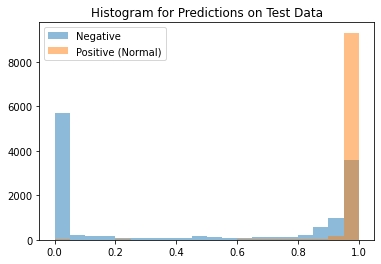

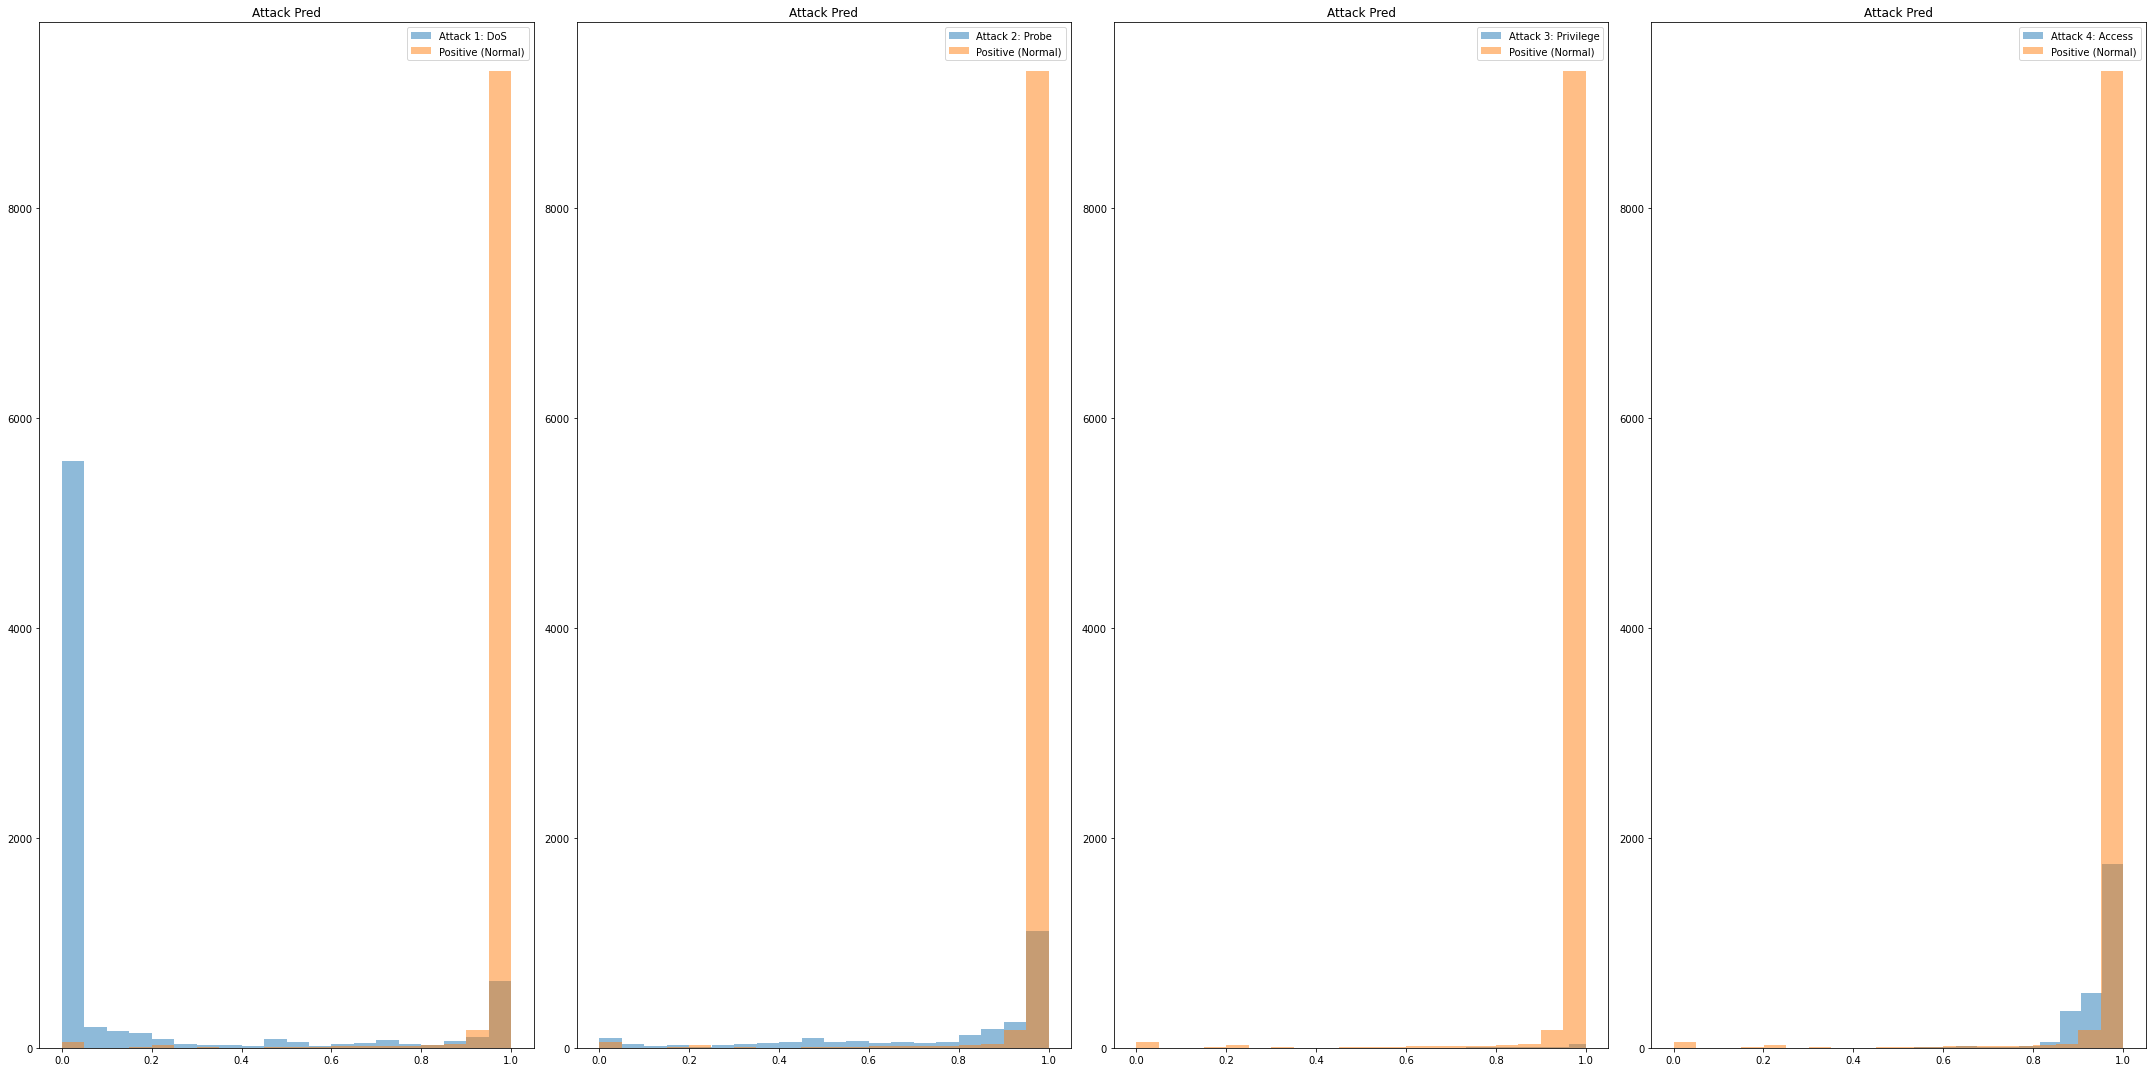

AUPR Train Run 1: 0.9999098341363857
AUPR Test Run 1: 0.9273143574243219
AUPR Indiv Test Run 1: [0.9736800123555445, 0.5666419226585182, 0.04186946207902625, 0.53530573338621]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
3186/3186 [==============================] - 21s 5ms/step - loss: 0.0426 - val_loss: 0.0034
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0105 - val_loss: 0.0020
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0065 - val_loss: 0.0018
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0049 - val_loss: 0.0016
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 7/500
3186/3186 [=======

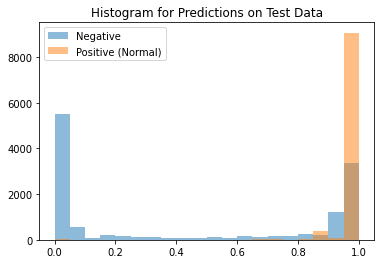

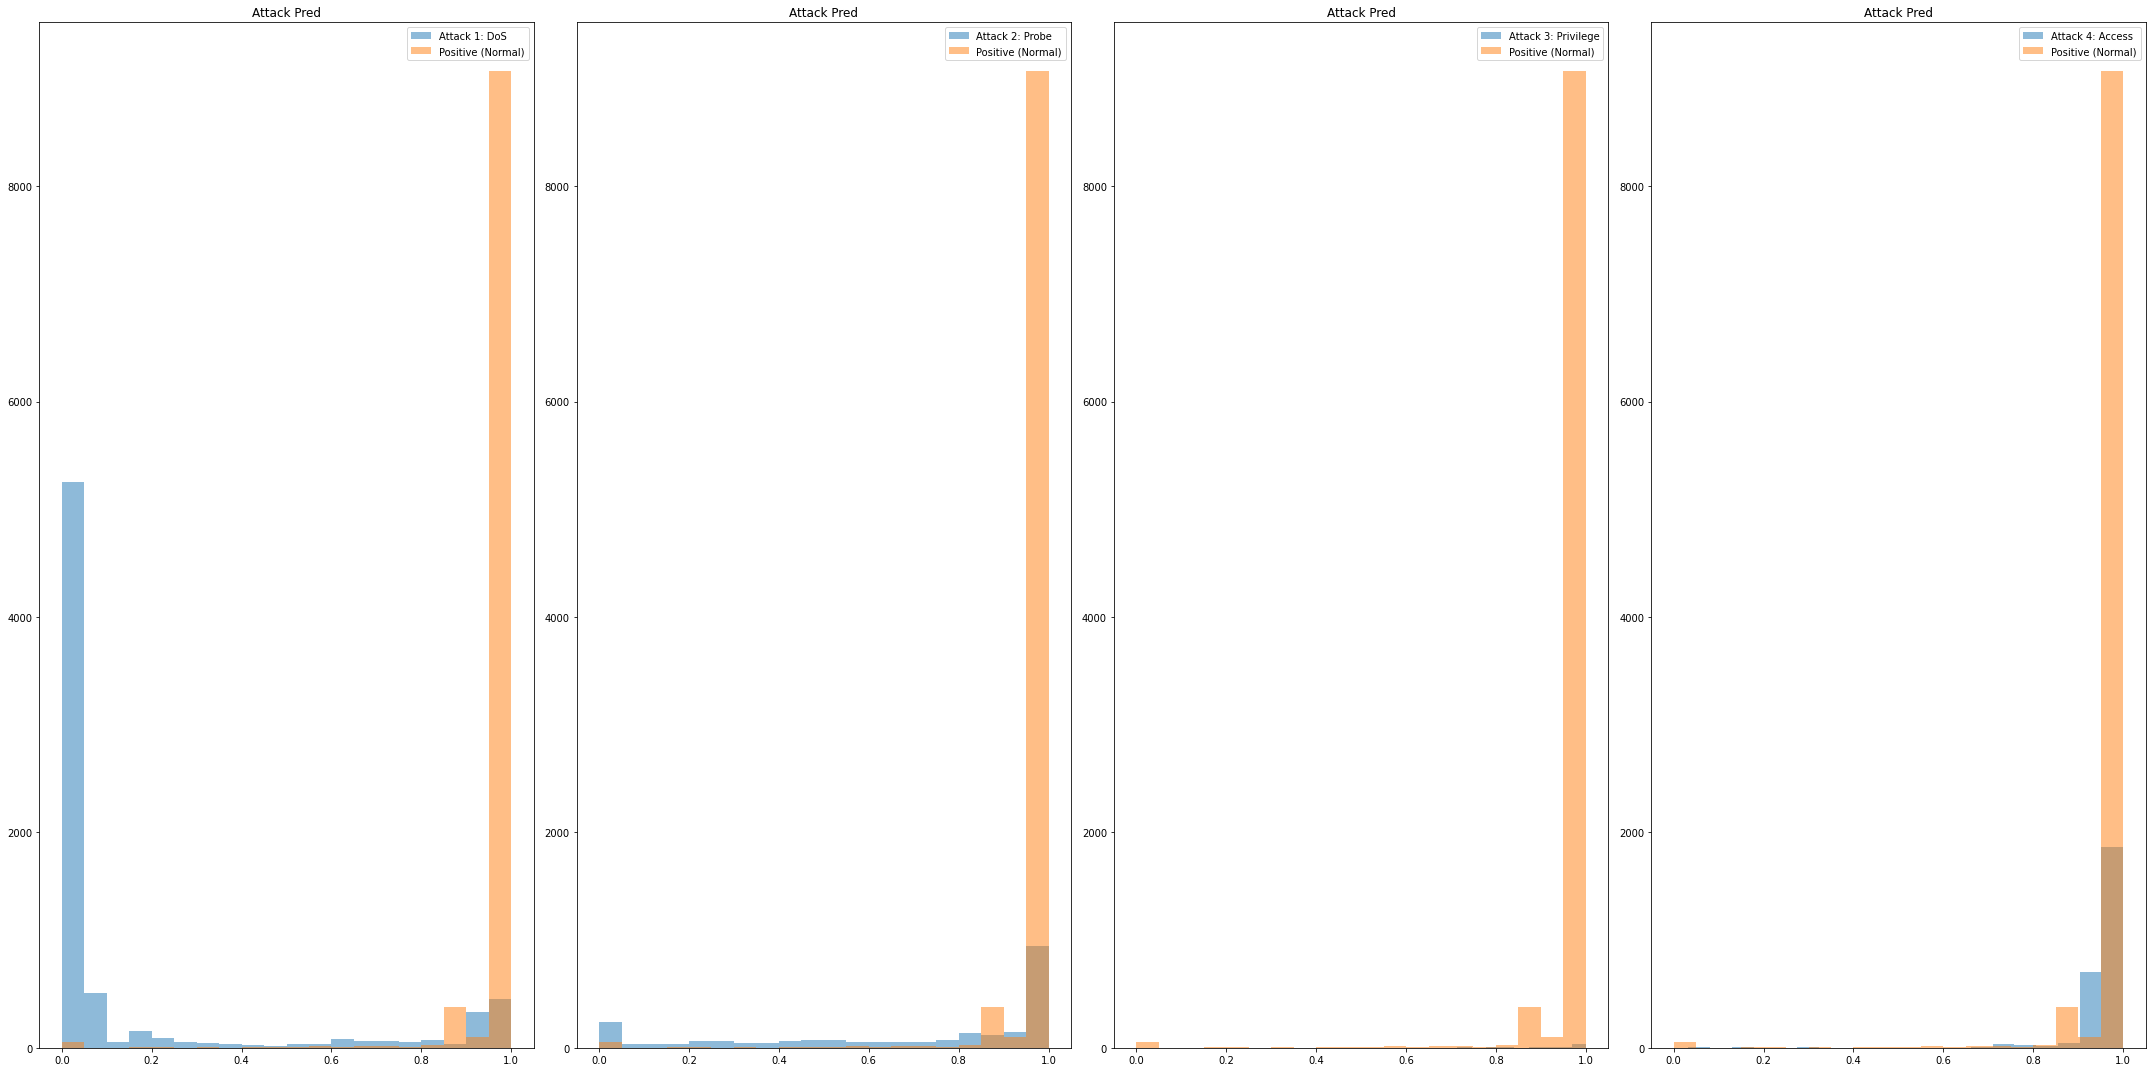

AUPR Train Run 2: 0.999976309973301
AUPR Test Run 2: 0.9225951843104498
AUPR Indiv Test Run 2: [0.9764374289702316, 0.6638744752808127, 0.03440858101453745, 0.3536326713386537]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
3186/3186 [==============================] - 22s 6ms/step - loss: 0.0477 - val_loss: 0.0043
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0110 - val_loss: 0.0023
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0066 - val_loss: 0.0018
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 7/500
3186/3186 [======

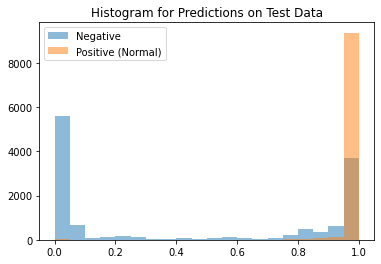

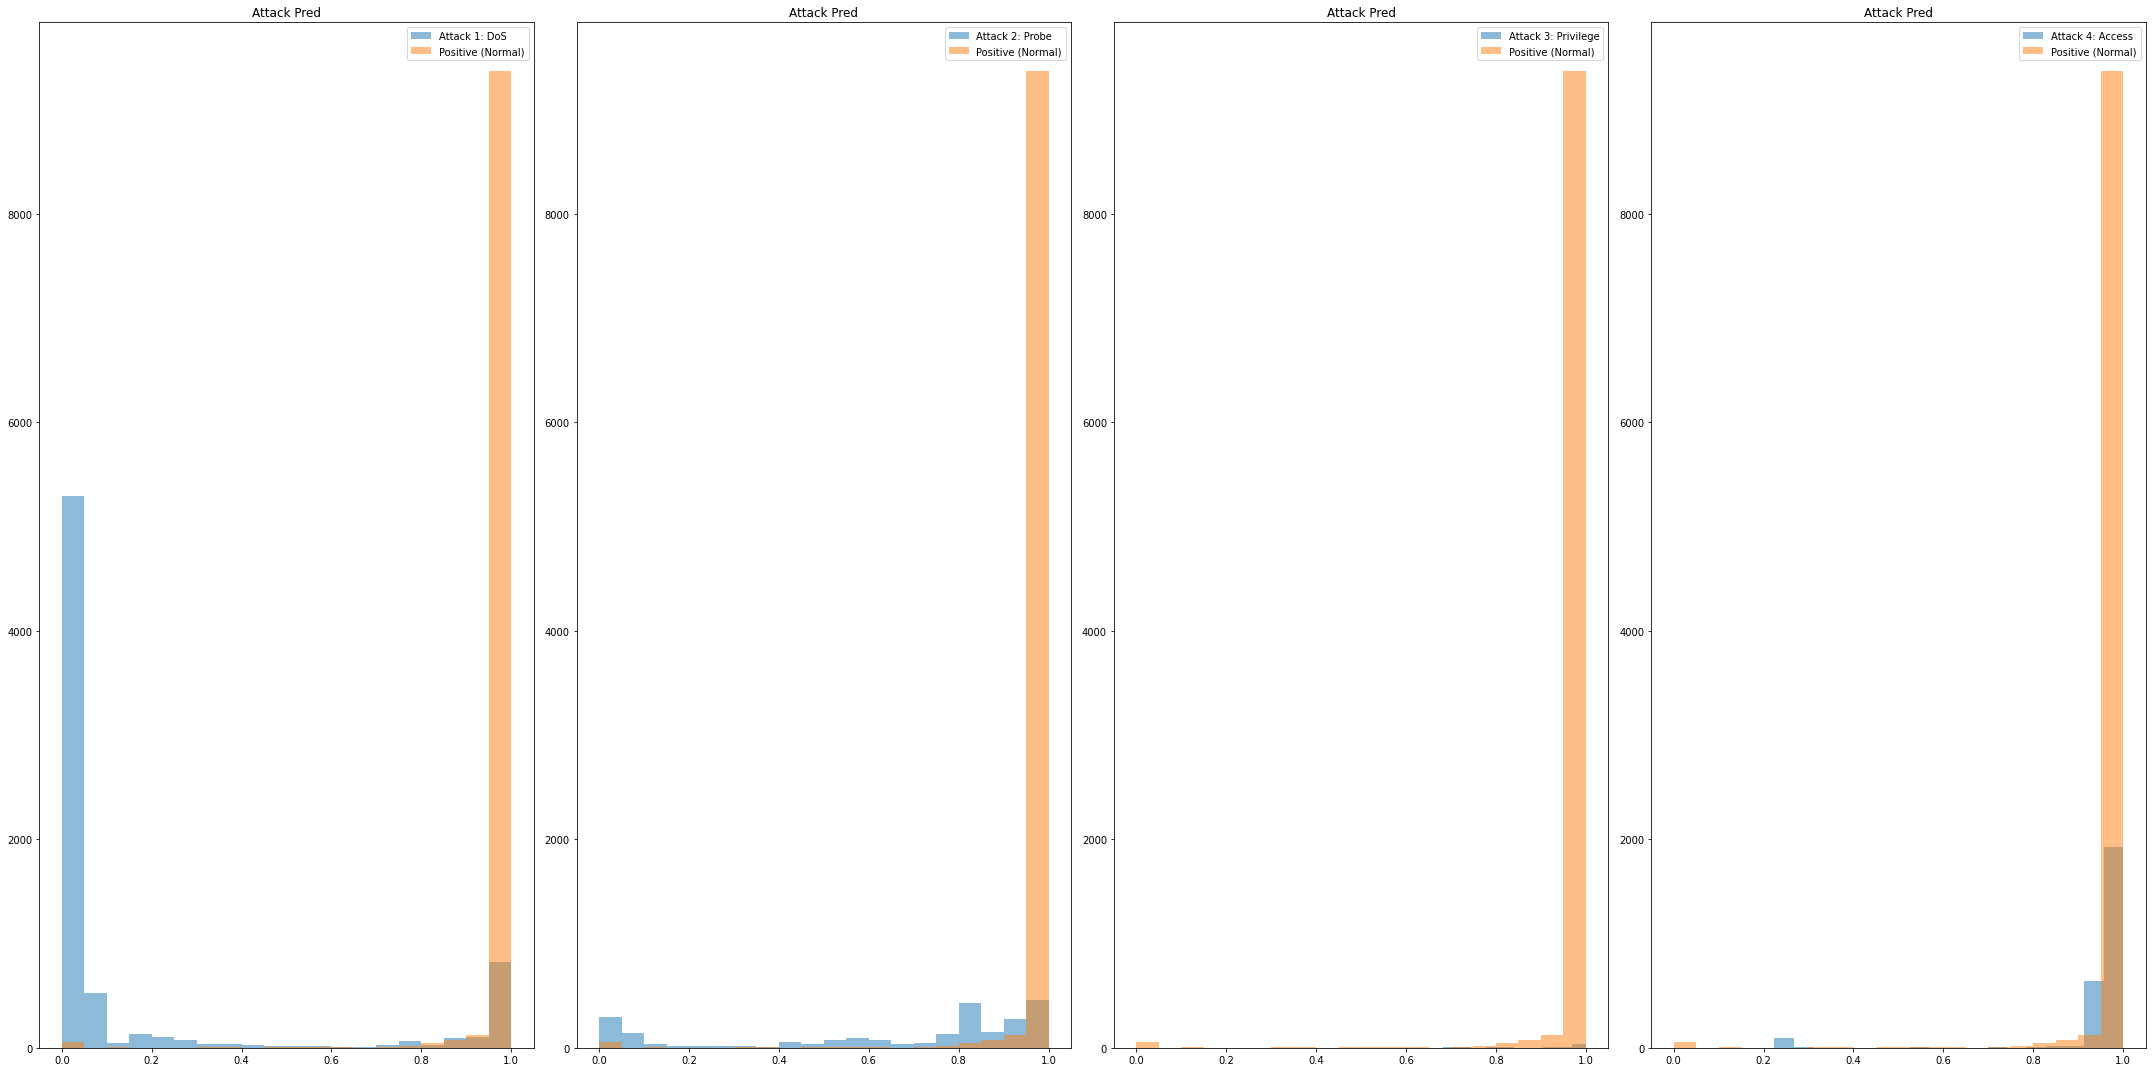

AUPR Train Run 3: 0.9999667368561331
AUPR Test Run 3: 0.954292463713235
AUPR Indiv Test Run 3: [0.9748962087702749, 0.8296055833746372, 0.06694973589219616, 0.5051913978951285]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
3186/3186 [==============================] - 21s 5ms/step - loss: 0.0437 - val_loss: 0.0036
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0076 - val_loss: 0.0023
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 7/500
3186/3186 [======

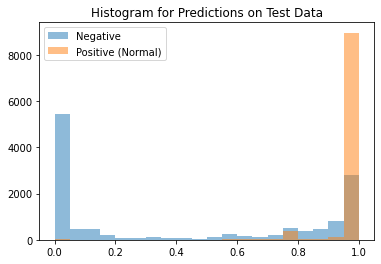

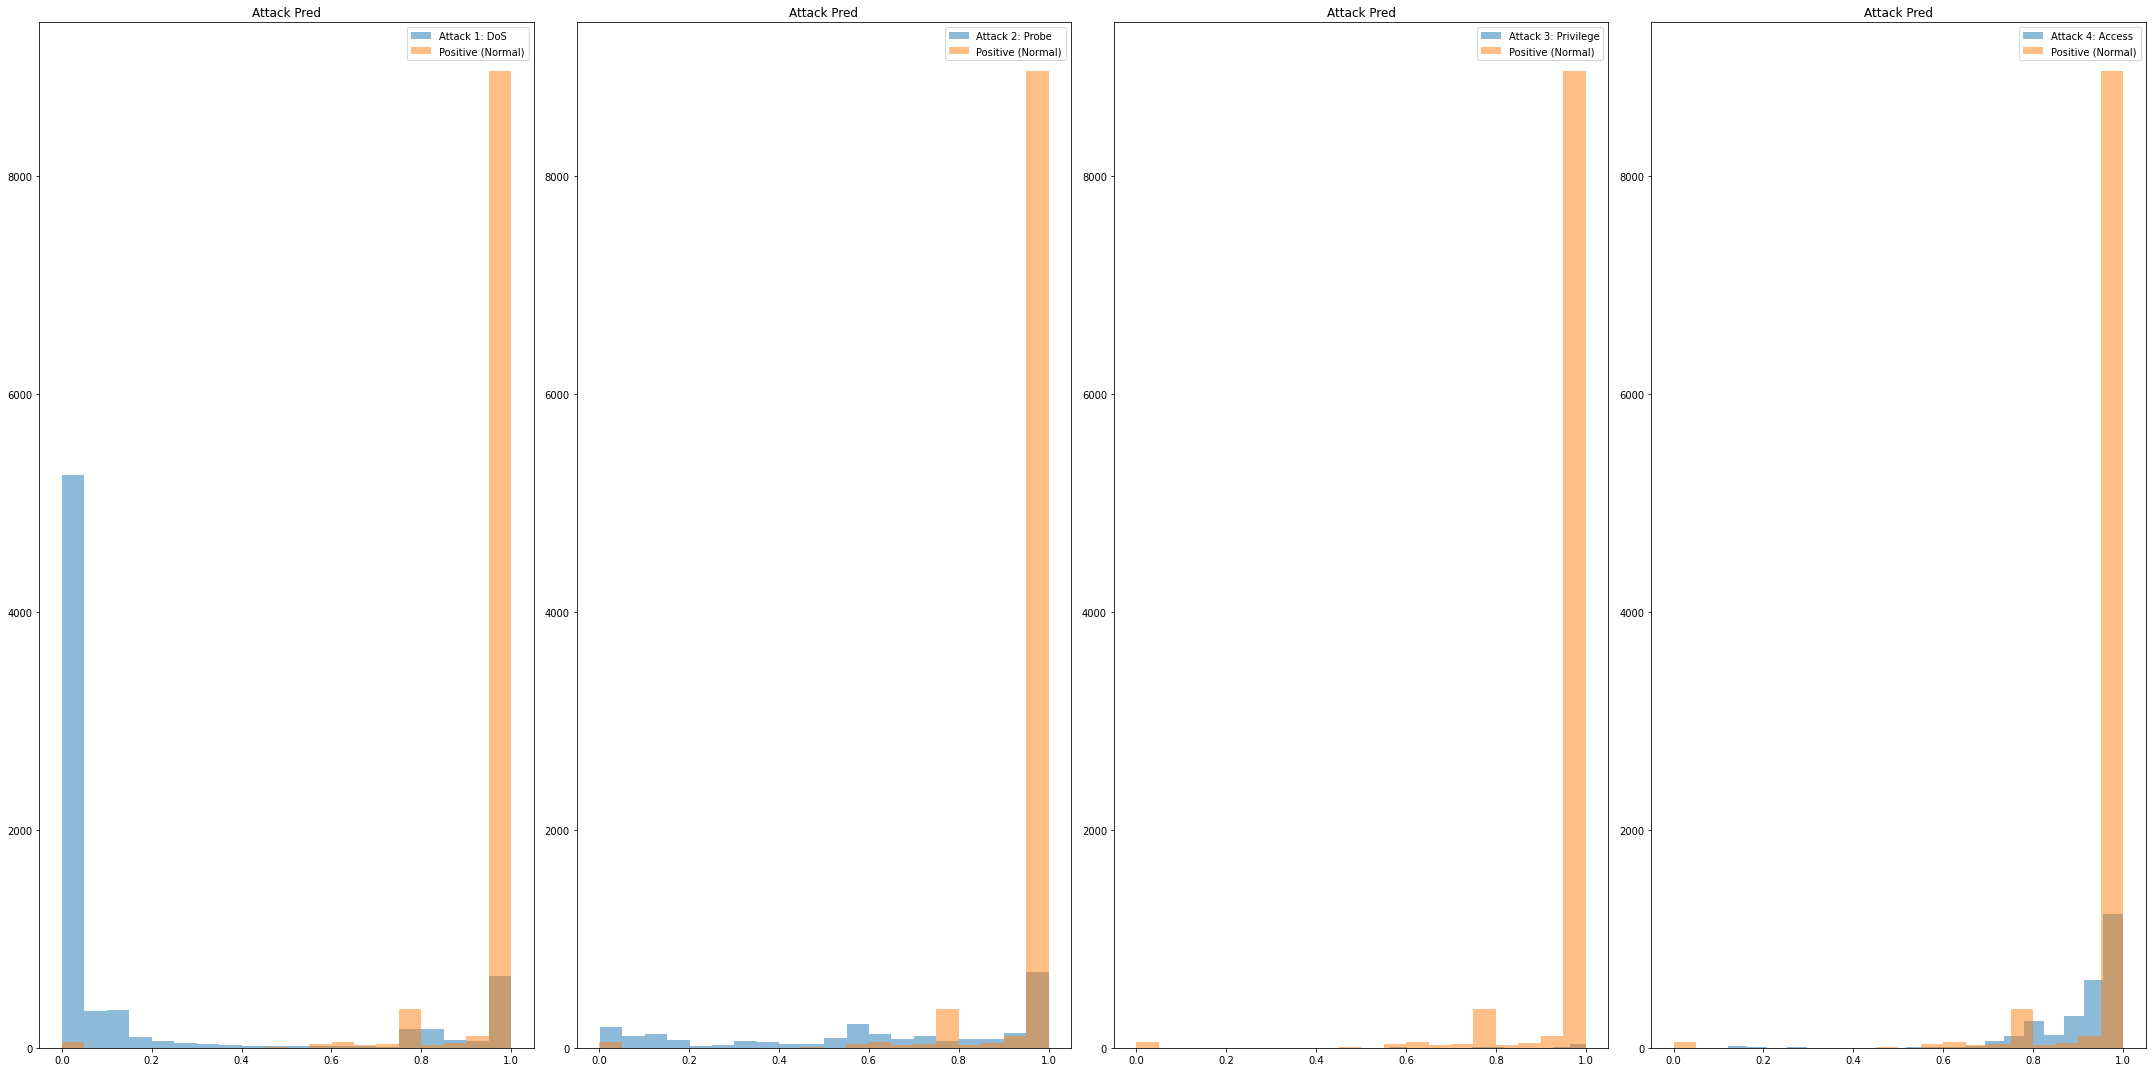

AUPR Train Run 4: 0.9999767704538086
AUPR Test Run 4: 0.94492776232924
AUPR Indiv Test Run 4: [0.973157516068182, 0.7198362787433302, 0.030628188279111762, 0.4871759389104456]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
3186/3186 [==============================] - 22s 6ms/step - loss: 0.0446 - val_loss: 0.0084
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0117 - val_loss: 0.0023
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0065 - val_loss: 0.0018
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0047 - val_loss: 0.0016
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 7/500
3186/3186 [=======

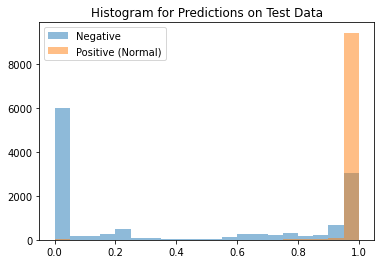

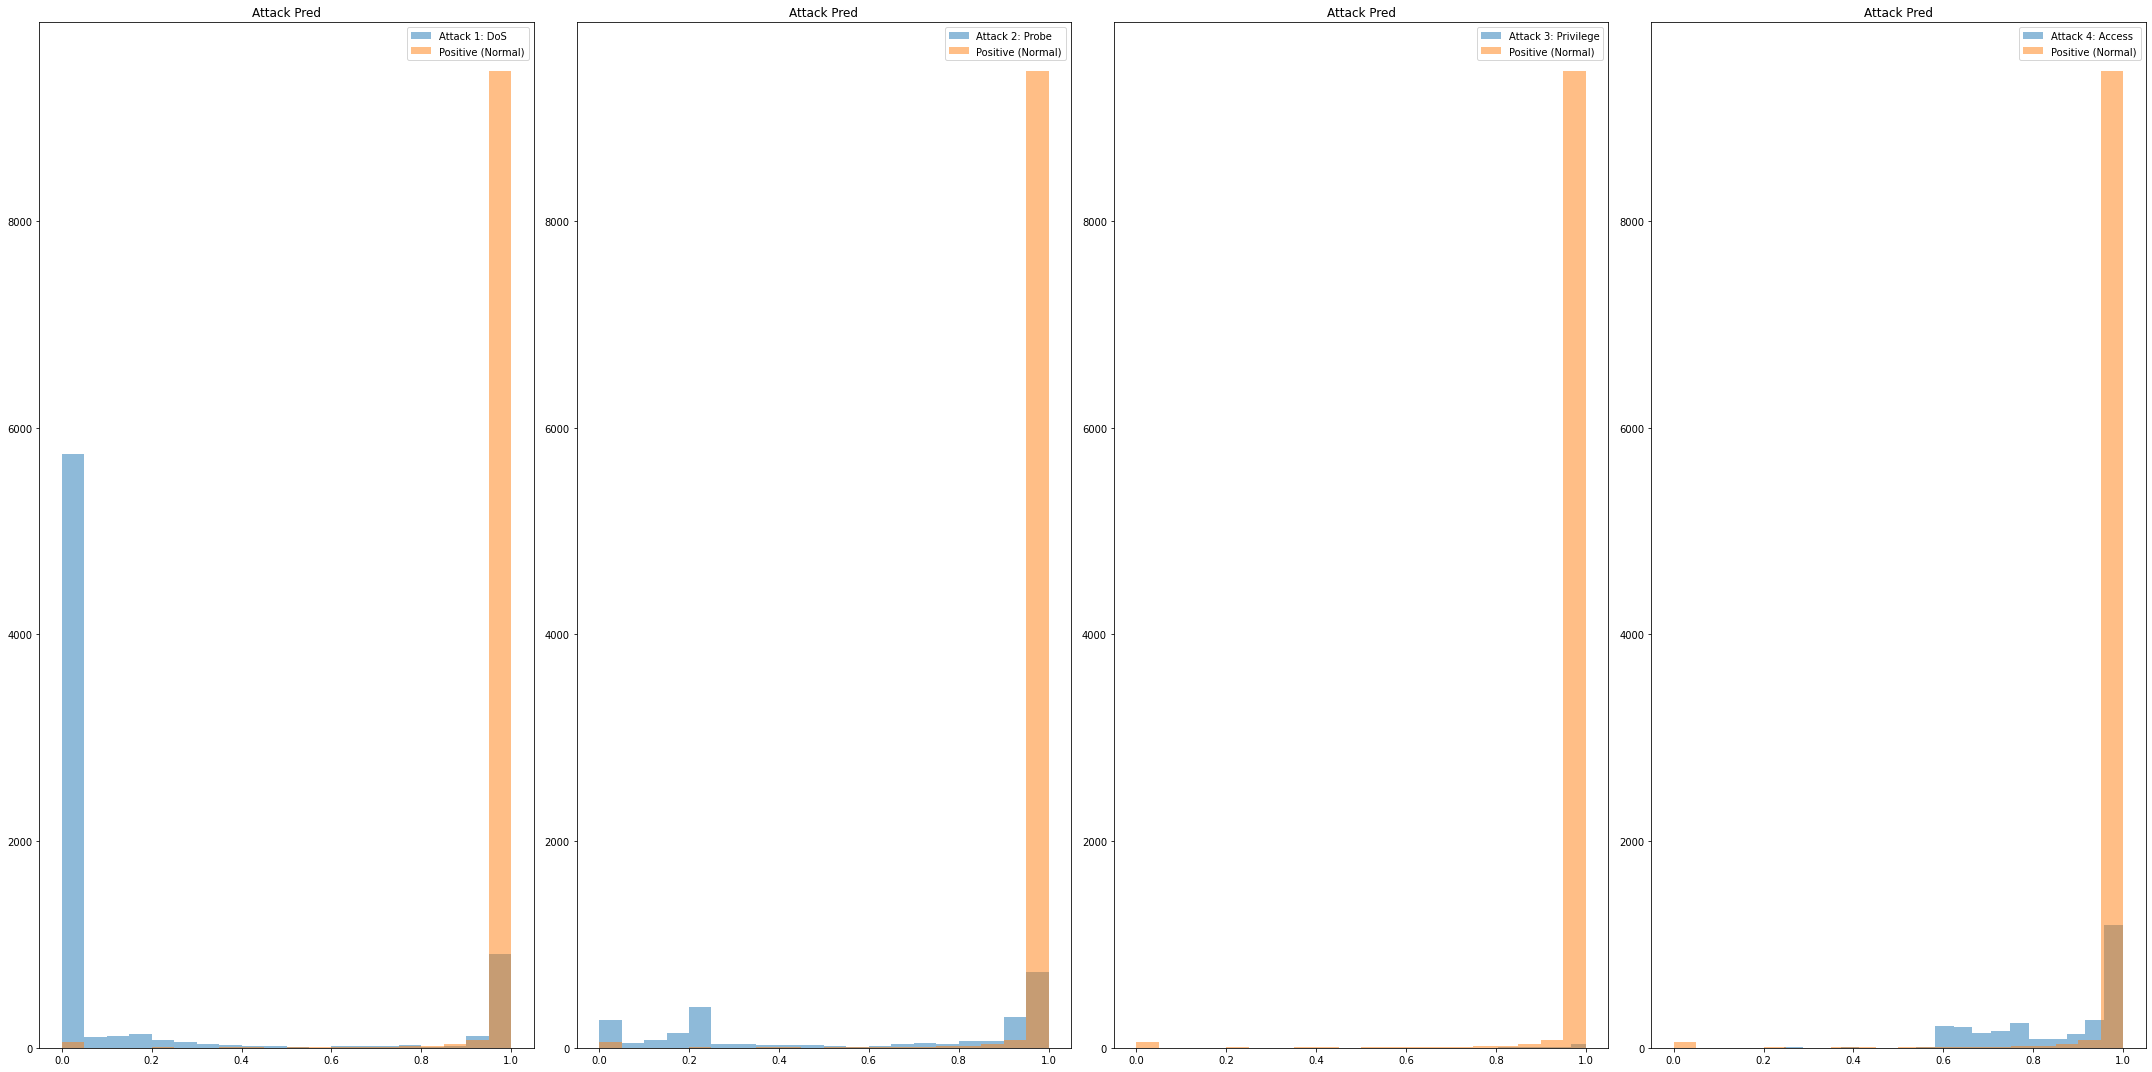

AUPR Train Run 5: 0.9999925392695074
AUPR Test Run 5: 0.9573960621981723
AUPR Indiv Test Run 5: [0.9727368138779784, 0.802856733893621, 0.05053831919779746, 0.6698775552255087]
AUPR (Train): 0.9999644381378271+-2.8529217220123058e-05
AUPR (Test): 0.9413051659950838+-0.014046467071415126


,0,1,2,3,4,AUPR Mean,AUPR Std
1,0.973680,0.976437,0.974896,0.973158,0.972737,0.974182,0.001499
2,0.566642,0.663874,0.829606,0.719836,0.802857,0.716563,0.106640
3,0.041869,0.034409,0.066950,0.030628,0.050538,0.044879,0.014499
4,0.535306,0.353633,0.505191,0.487176,0.669878,0.510237,0.113132


([0.9999098341363857,
  0.999976309973301,
  0.9999667368561331,
  0.9999767704538086,
  0.9999925392695074],
 [0.9273143574243219,
  0.9225951843104498,
  0.954292463713235,
  0.94492776232924,
  0.9573960621981723],
 {0: [0.9736800123555445,
   0.5666419226585182,
   0.04186946207902625,
   0.53530573338621],
  1: [0.9764374289702316,
   0.6638744752808127,
   0.03440858101453745,
   0.3536326713386537],
  2: [0.9748962087702749,
   0.8296055833746372,
   0.06694973589219616,
   0.5051913978951285],
  3: [0.973157516068182,
   0.7198362787433302,
   0.030628188279111762,
   0.4871759389104456],
  4: [0.9727368138779784,
   0.802856733893621,
   0.05053831919779746,
   0.6698775552255087]})

In [13]:
# ESb mse
separation = "ES"
bumped = "b"
sigma = 0.5
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_es = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='mse', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    models_es.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "ES1b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 122)]             0         
                                                                 
 dense_78 (Dense)            (None, 60)                7380      
                                                                 
 batch_normalization_49 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 bump1 (Bump)                (None, 60)                1         
                                                                 
 dense_79 (Dense)            (None, 1)                 61        
                                                                 
 bumplast (Bump)             (None, 1)                 1         
                                                              

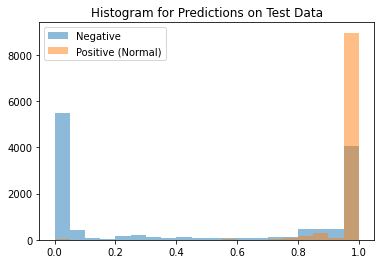

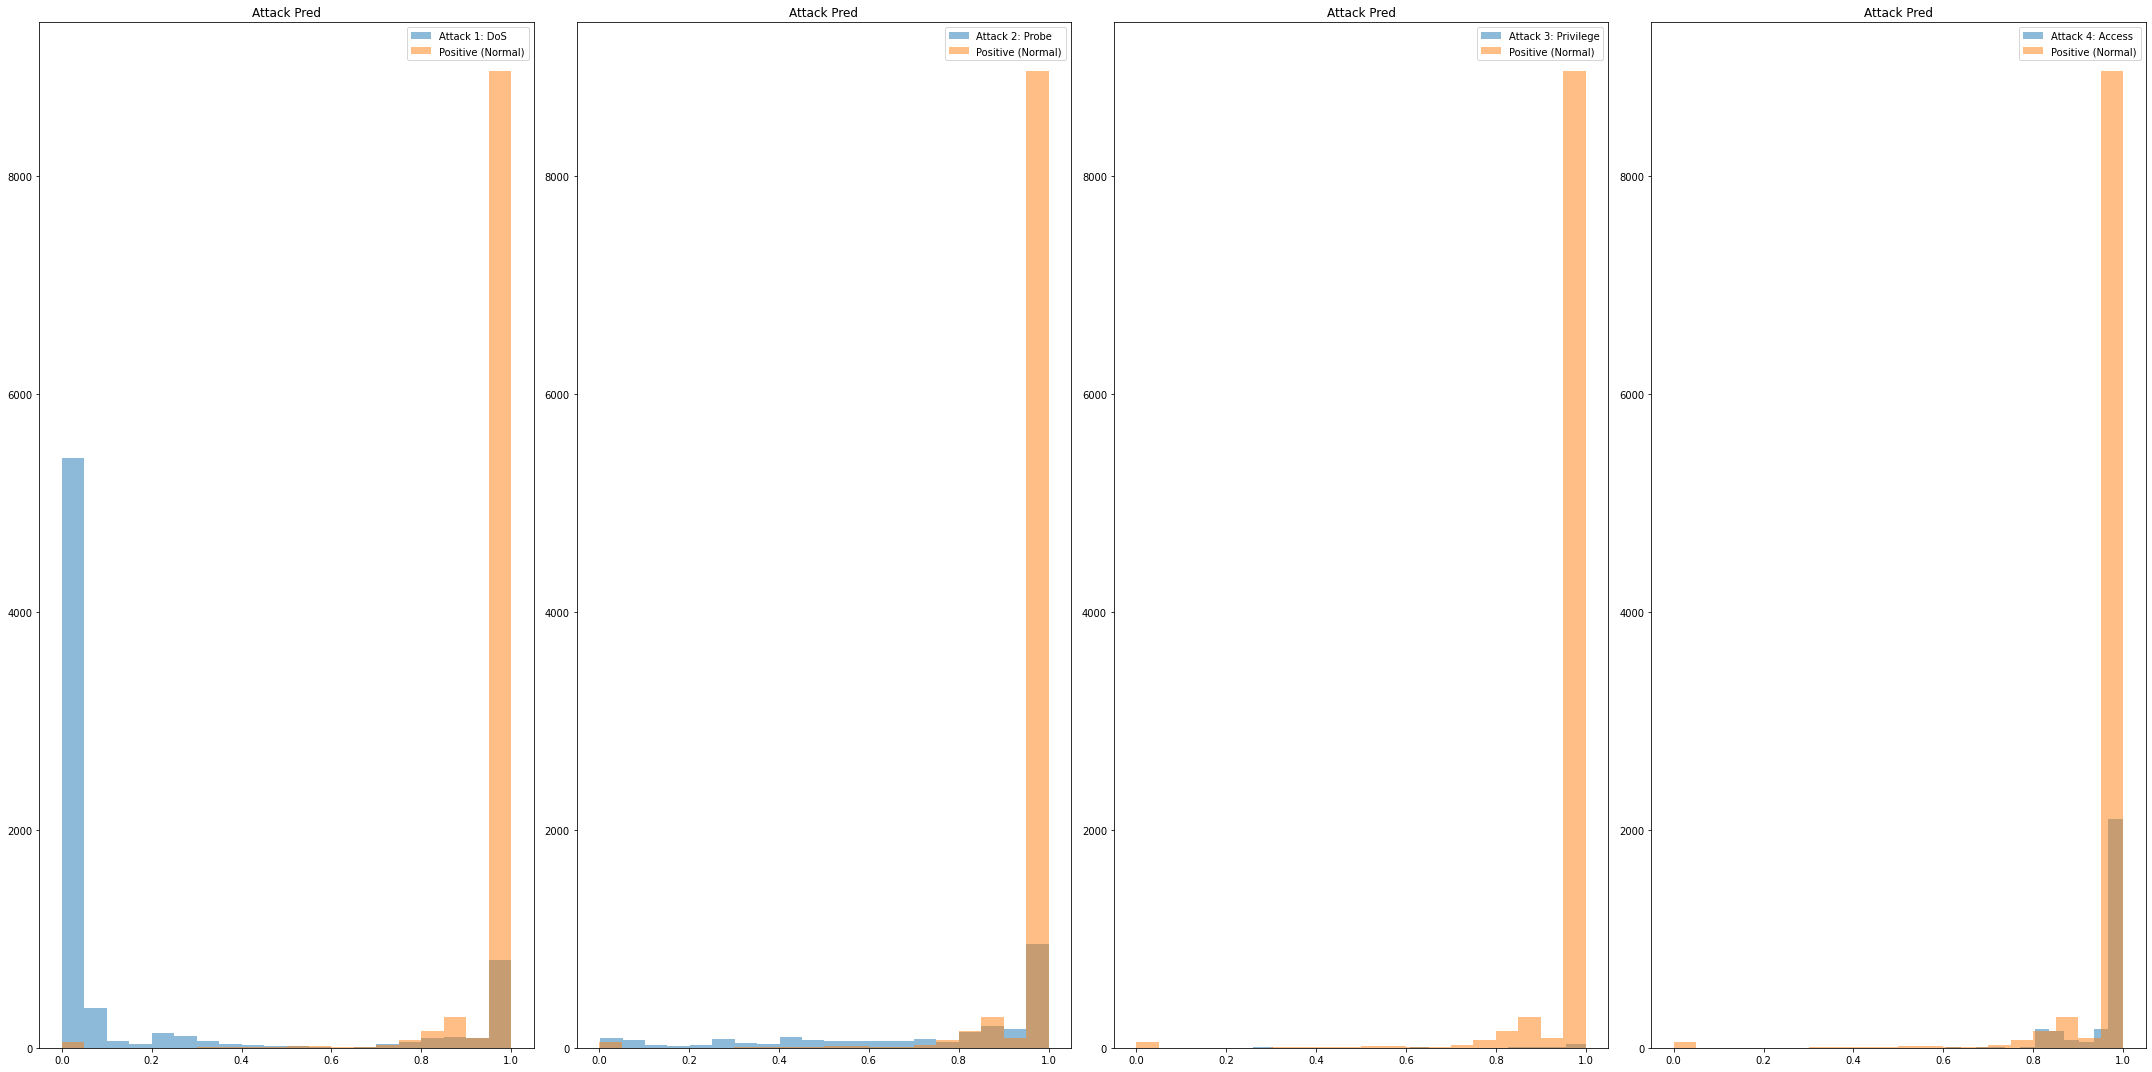

AUPR Train Run 1: 0.9999481674869011
AUPR Test Run 1: 0.9128942987710372
AUPR Indiv Test Run 1: [0.9621309656321153, 0.590533215900017, 0.056643403892494726, 0.3536849422410864]
Epoch 1/500
3186/3186 [==============================] - 23s 6ms/step - loss: 0.4530 - val_loss: 0.1131
Epoch 2/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.1997 - val_loss: 0.0710
Epoch 3/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.1425 - val_loss: 0.0582
Epoch 4/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.1097 - val_loss: 0.0527
Epoch 5/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0776 - val_loss: 0.0234
Epoch 6/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0646 - val_loss: 0.0174
Epoch 7/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0470 - val_loss: 0.0153
Epoch 8/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0399 - val_los

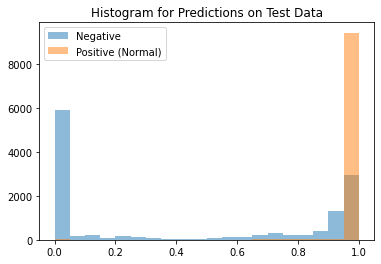

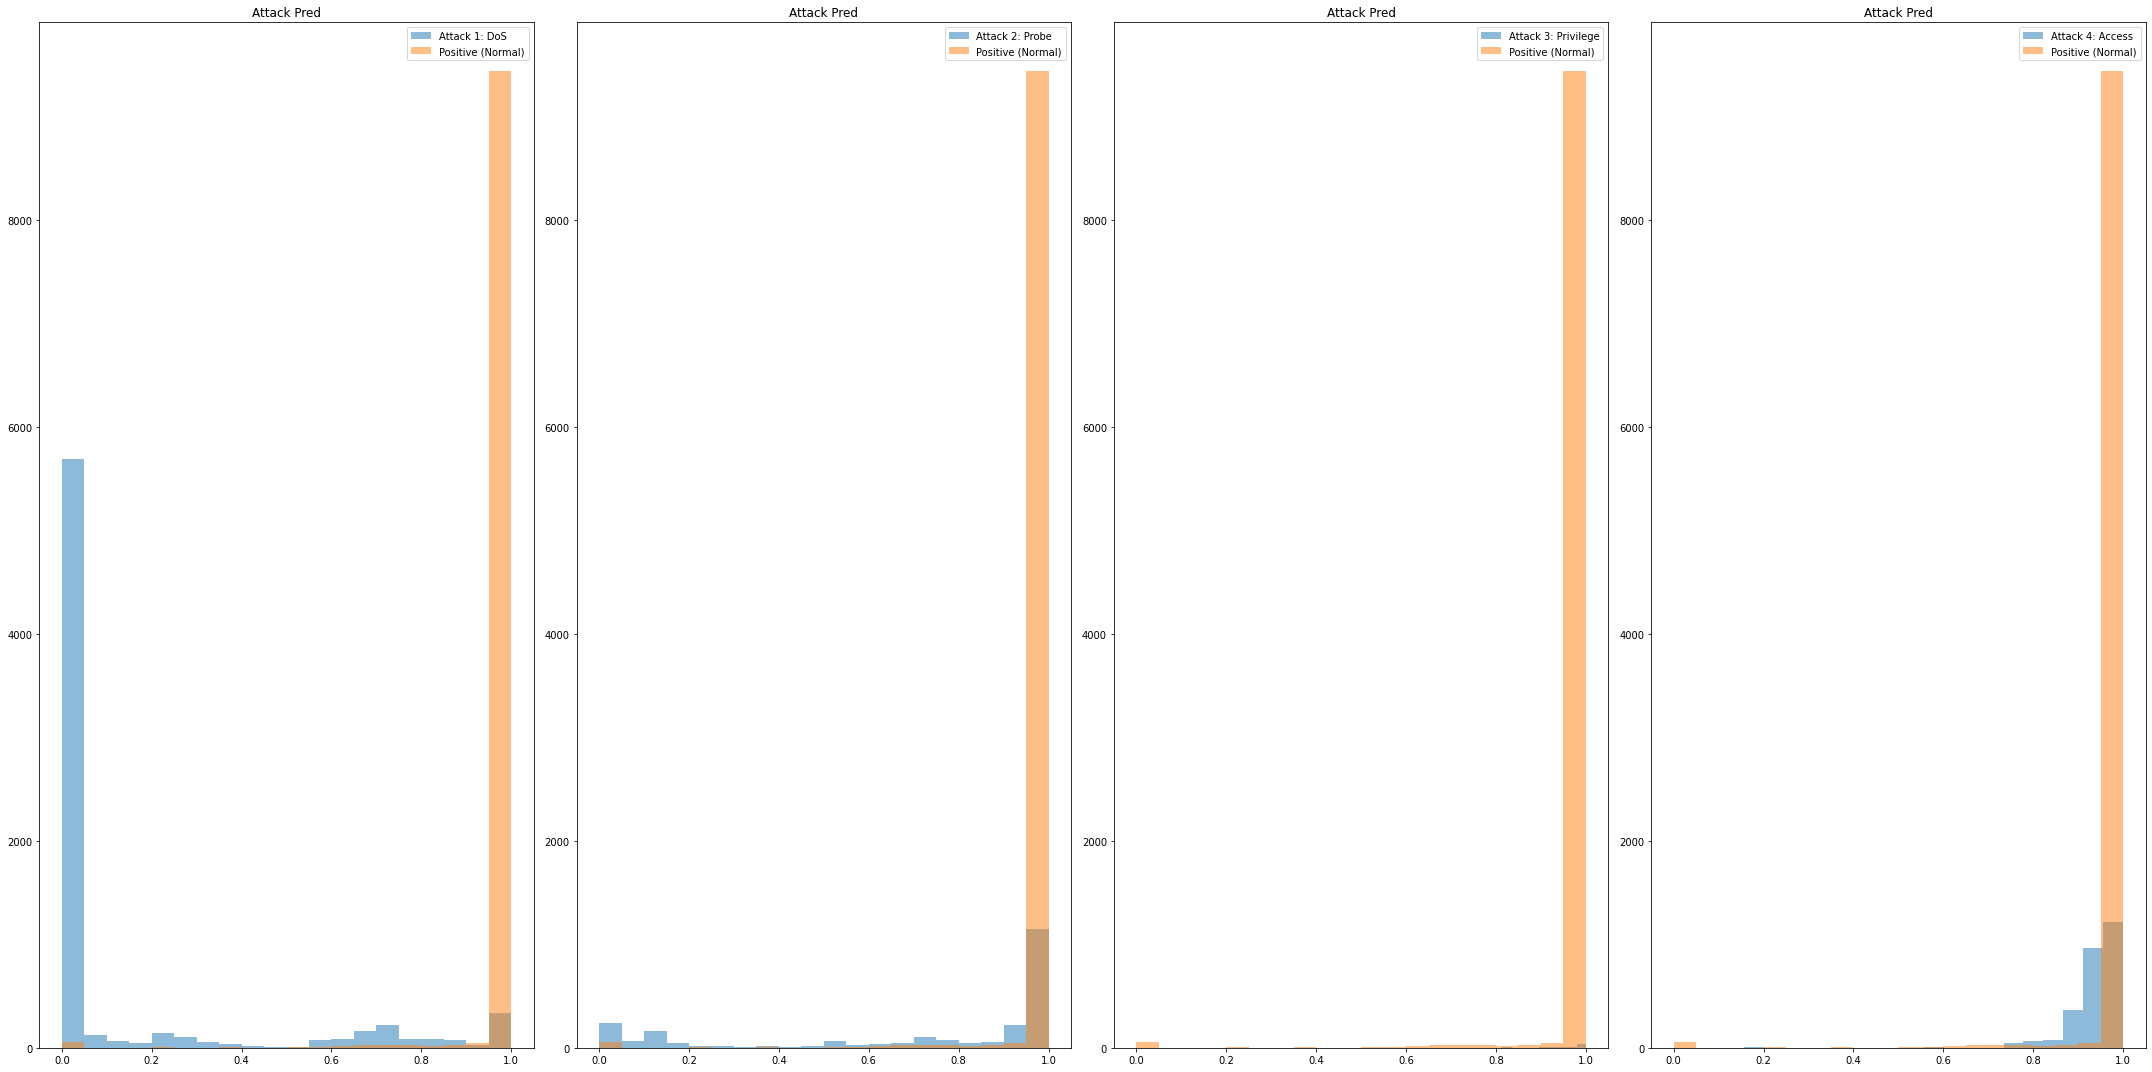

AUPR Train Run 2: 0.9999476753927705
AUPR Test Run 2: 0.9534310592595423
AUPR Indiv Test Run 2: [0.9729662825772811, 0.7057396756563628, 0.039905574659407986, 0.6400924116727154]
Epoch 1/500
3186/3186 [==============================] - 22s 6ms/step - loss: 0.3256 - val_loss: 0.0680
Epoch 2/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.1440 - val_loss: 0.0306
Epoch 3/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0878 - val_loss: 0.0207
Epoch 4/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0629 - val_loss: 0.0164
Epoch 5/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0452 - val_loss: 0.0136
Epoch 6/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0363 - val_loss: 0.0137
Epoch 7/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0298 - val_loss: 0.0127
Epoch 8/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0266 - val_lo

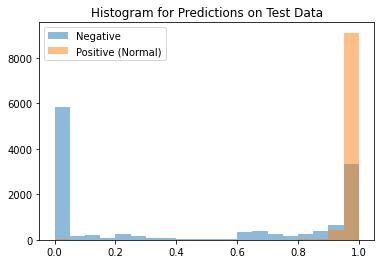

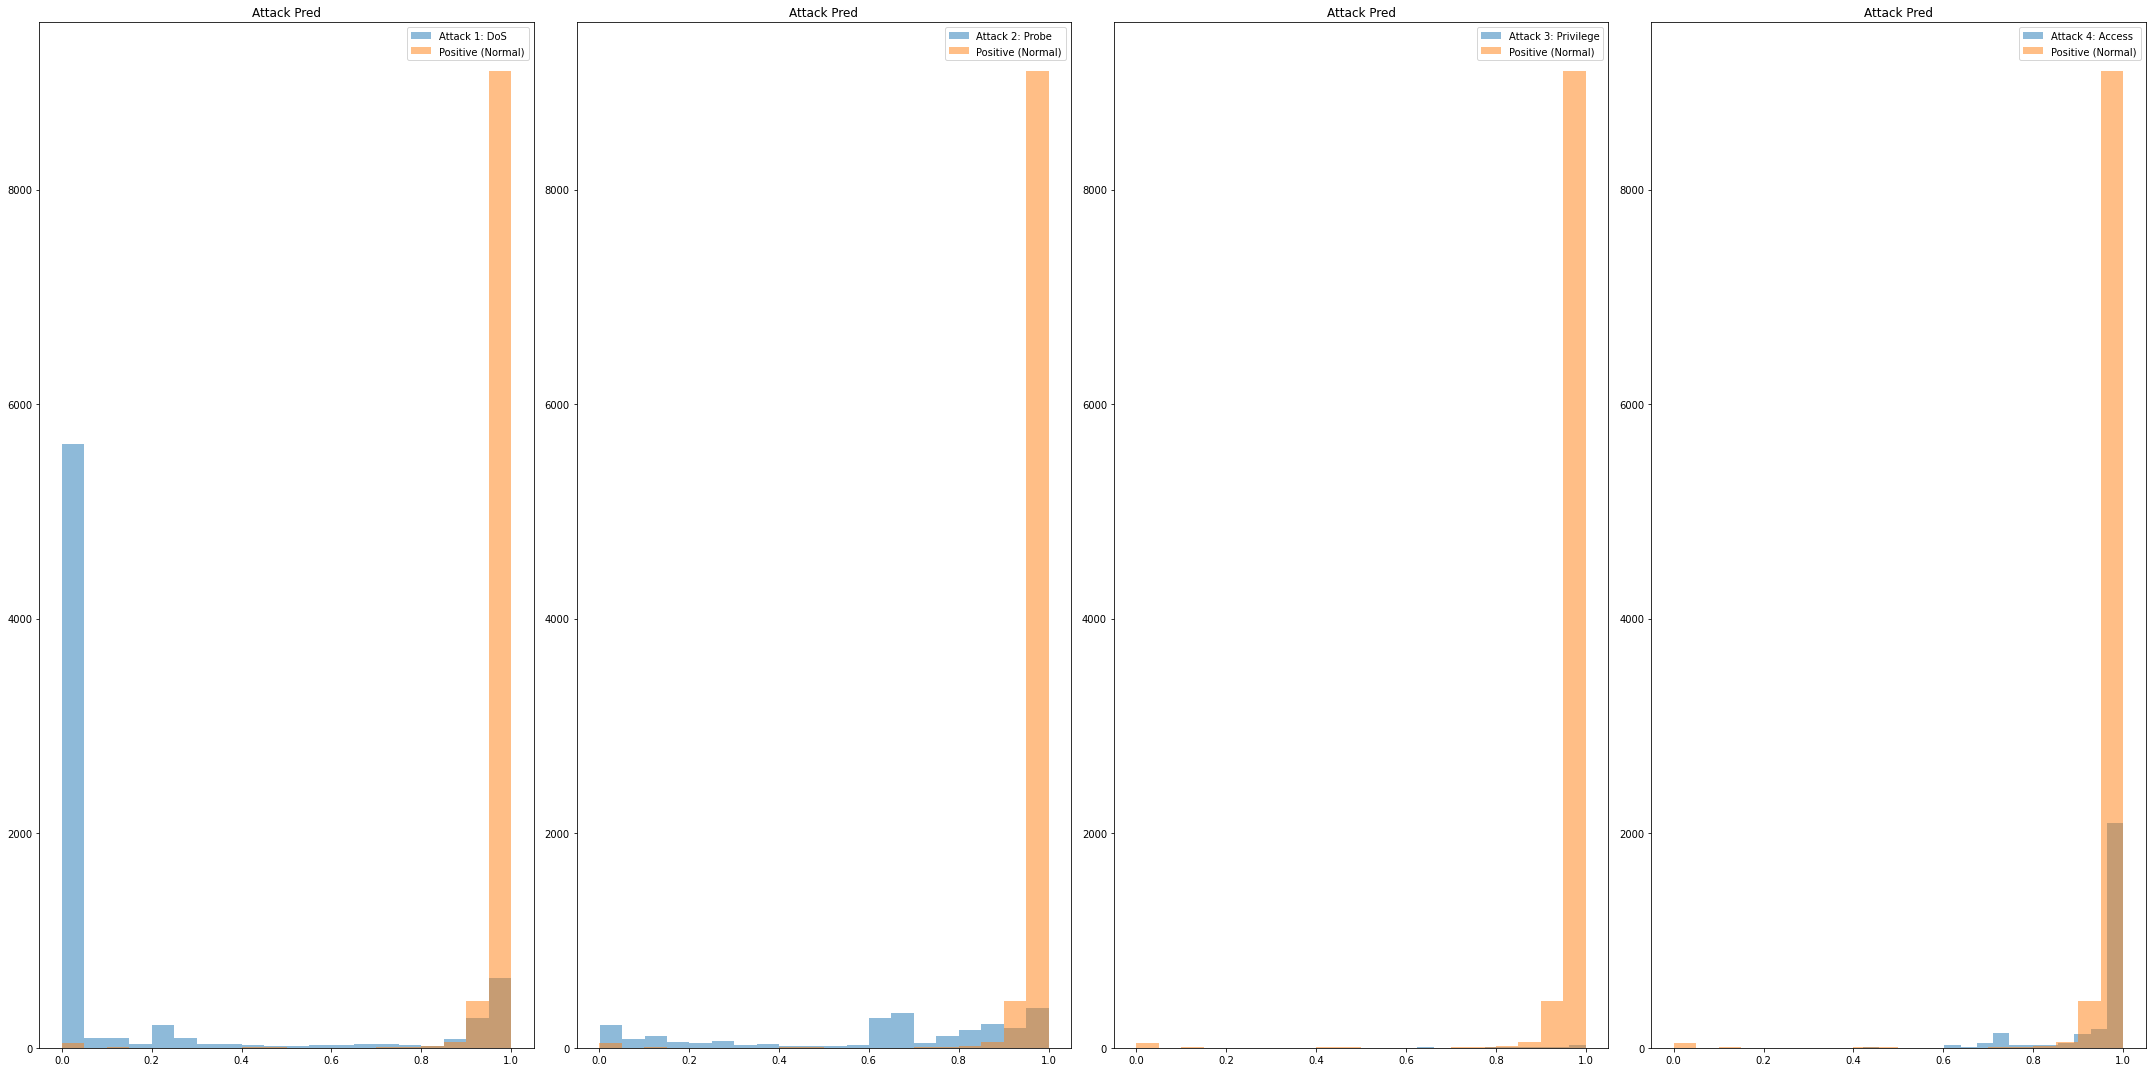

AUPR Train Run 3: 0.9999017961923586
AUPR Test Run 3: 0.9507859979941777
AUPR Indiv Test Run 3: [0.966019472500726, 0.8486978904117143, 0.07090102069000423, 0.4986662112138402]
Epoch 1/500
3186/3186 [==============================] - 23s 6ms/step - loss: 0.2718 - val_loss: 0.0545
Epoch 2/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0964 - val_loss: 0.0286
Epoch 3/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0648 - val_loss: 0.0189
Epoch 4/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0473 - val_loss: 0.0157
Epoch 5/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0376 - val_loss: 0.0116
Epoch 6/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0298 - val_loss: 0.0107
Epoch 7/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0265 - val_loss: 0.0118
Epoch 8/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0231 - val_loss

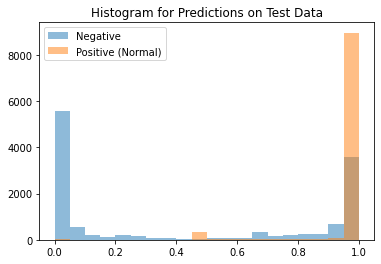

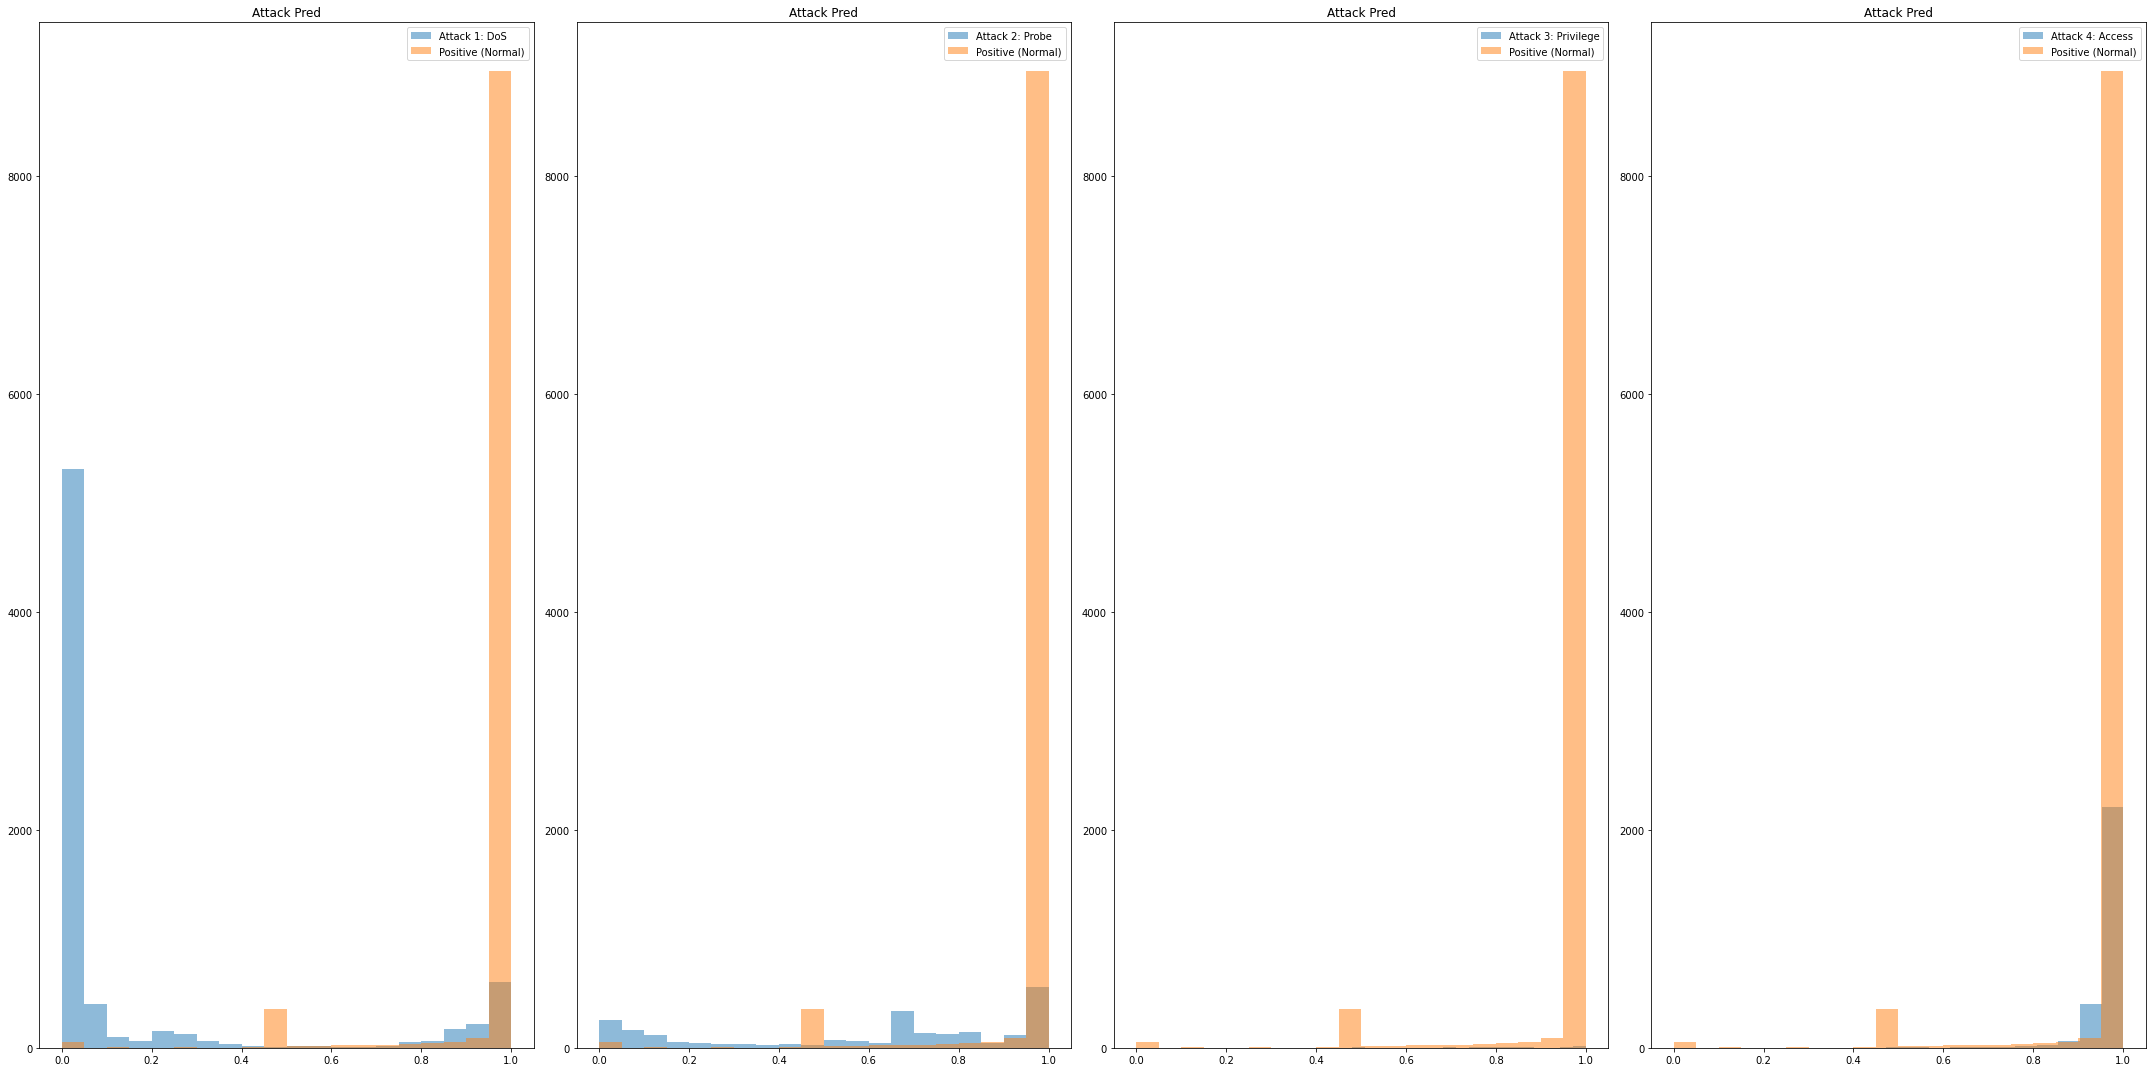

AUPR Train Run 4: 0.9999537194670804
AUPR Test Run 4: 0.9381400175515916
AUPR Indiv Test Run 4: [0.9693490534018581, 0.7318195140384127, 0.032786759776656474, 0.3869505406639562]
Epoch 1/500
3186/3186 [==============================] - 23s 6ms/step - loss: 0.3814 - val_loss: 0.0857
Epoch 2/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.1547 - val_loss: 0.0503
Epoch 3/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.1072 - val_loss: 0.0322
Epoch 4/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0712 - val_loss: 0.0222
Epoch 5/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0524 - val_loss: 0.0176
Epoch 6/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0388 - val_loss: 0.0150
Epoch 7/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0314 - val_loss: 0.0135
Epoch 8/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.0265 - val_lo

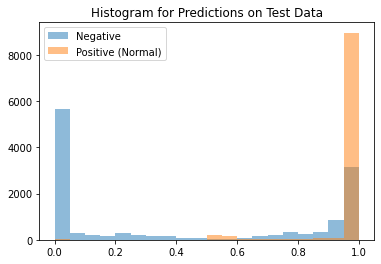

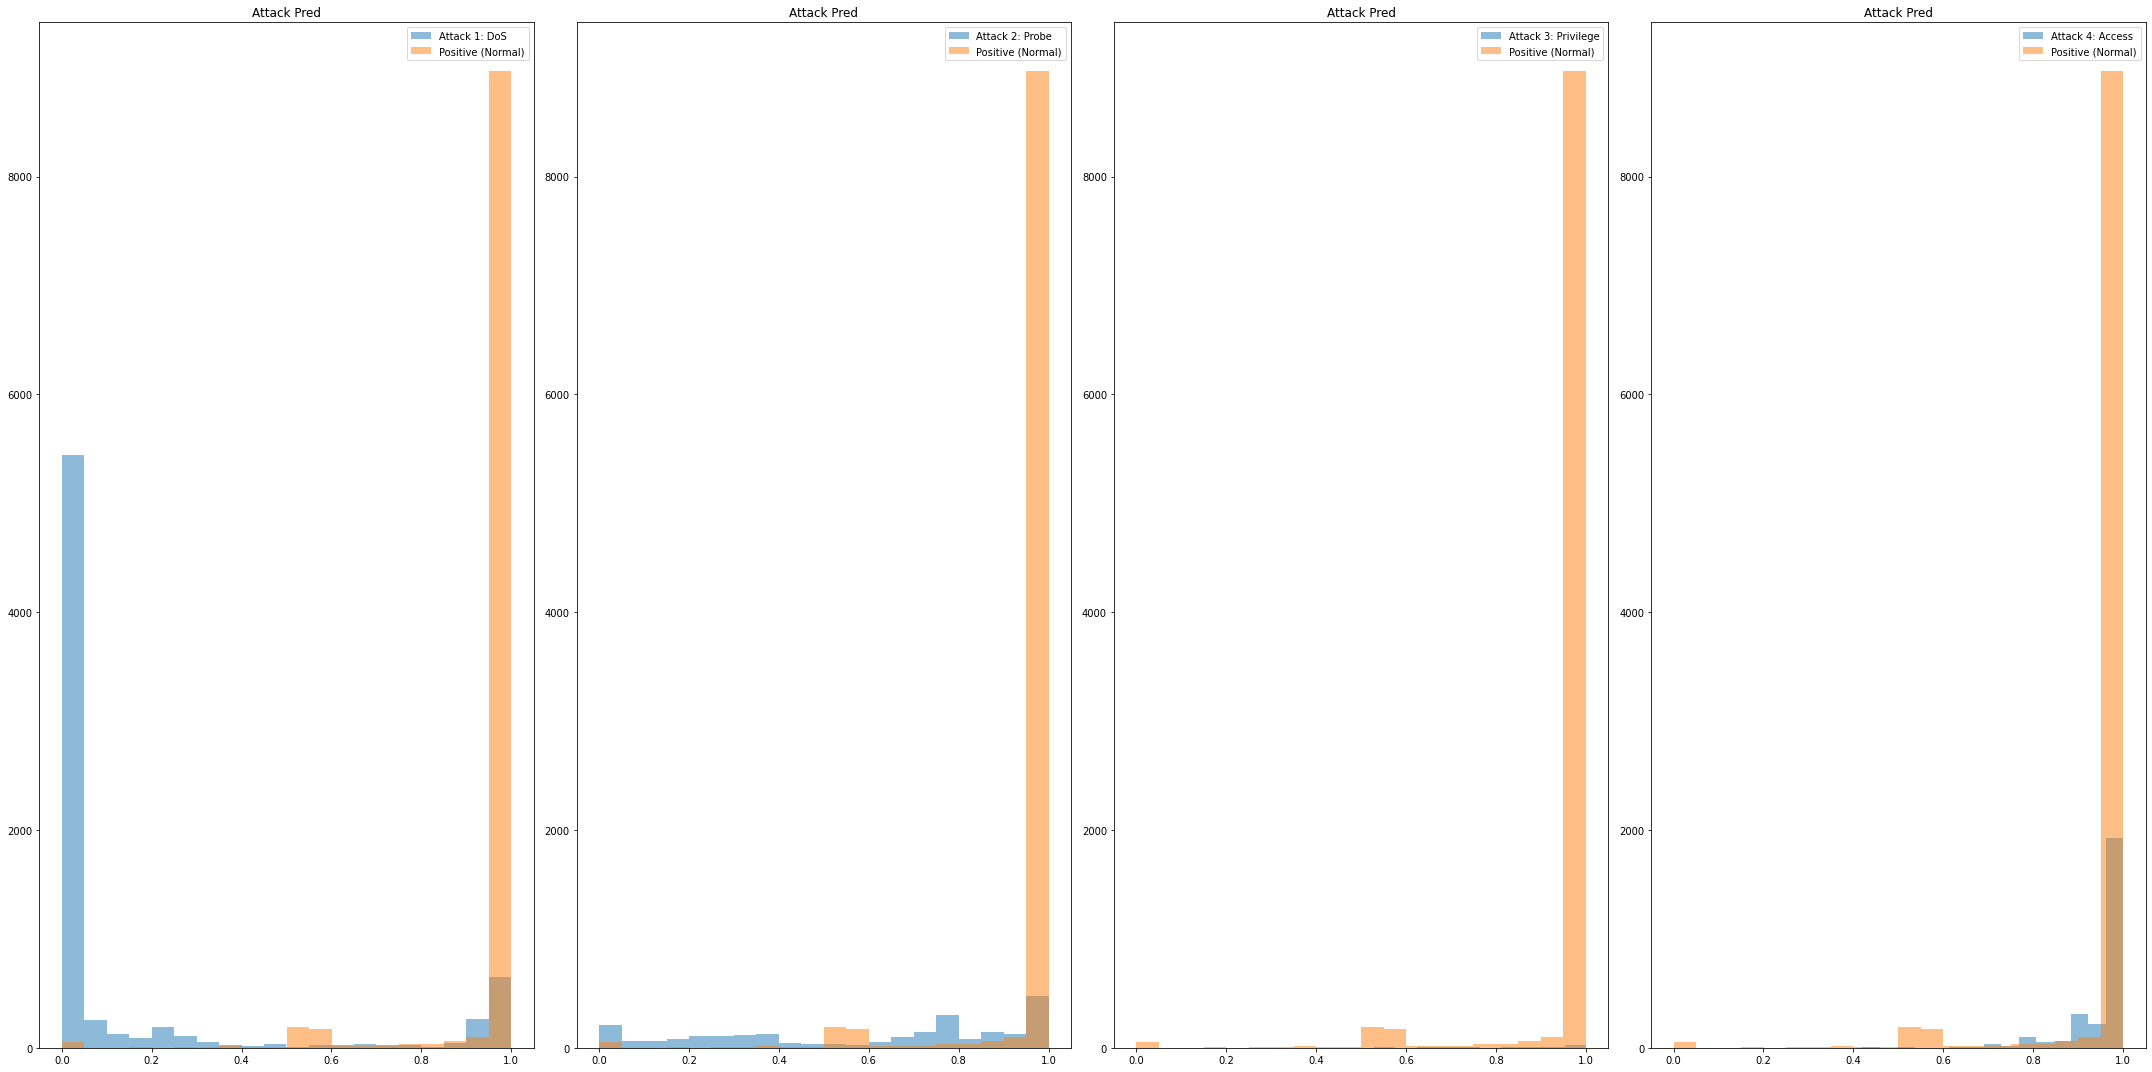

AUPR Train Run 5: 0.9998882030585706
AUPR Test Run 5: 0.9387057119681376
AUPR Indiv Test Run 5: [0.9774790950050554, 0.751197718848873, 0.03281891775264201, 0.3488552127395065]
AUPR (Train): 0.9999279123195361+-2.729738902606443e-05
AUPR (Test): 0.9387914171088972+-0.014347693179546431


,0,1,2,3,4,AUPR Mean,AUPR Std
1,0.962131,0.972966,0.966019,0.969349,0.977479,0.969589,0.00596
2,0.590533,0.705740,0.848698,0.731820,0.751198,0.725598,0.09285
3,0.056643,0.039906,0.070901,0.032787,0.032819,0.046611,0.01671
4,0.353685,0.640092,0.498666,0.386951,0.348855,0.445650,0.12439


([0.9999481674869011,
  0.9999476753927705,
  0.9999017961923586,
  0.9999537194670804,
  0.9998882030585706],
 [0.9128942987710372,
  0.9534310592595423,
  0.9507859979941777,
  0.9381400175515916,
  0.9387057119681376],
 {0: [0.9621309656321153,
   0.590533215900017,
   0.056643403892494726,
   0.3536849422410864],
  1: [0.9729662825772811,
   0.7057396756563628,
   0.039905574659407986,
   0.6400924116727154],
  2: [0.966019472500726,
   0.8486978904117143,
   0.07090102069000423,
   0.4986662112138402],
  3: [0.9693490534018581,
   0.7318195140384127,
   0.032786759776656474,
   0.3869505406639562],
  4: [0.9774790950050554,
   0.751197718848873,
   0.03281891775264201,
   0.3488552127395065]})

In [14]:
# ESb log loss
separation = "ES"
bumped = "b"
sigma = 0.5
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_es = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='binary_crossentropy', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    models_es.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

In [15]:
num_inputs = X.shape[-1]

verbose = 1      # can change this to 0 to suppress verbosity during training
plot = False
shuffle = False
val_split = 0.1
repeats = 5
epochs = 500
batchnorm = True

lr = 3e-4


# lr = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.005,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                                  restore_best_weights=True)
callbacks = [early_stopping]
# callbacks = []

neurons = [60]
# neurons = [40, 20, 10, 5]
# neurons = [150, 150, 80, 50, 30]
# dropout = [0.2, 0.5, 0.3, 0.05]
dropout = [0.0 for n in neurons]

Model: "HS1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 122)]             0         
                                                                 
 dense_48 (Dense)            (None, 60)                7380      
                                                                 
 batch_normalization_29 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 tf.nn.leaky_relu (TFOpLambd  (None, 60)               0         
 a)                                                              
                                                                 
 dense_49 (Dense)            (None, 1)                 61        
                                                                 
 tf.math.sigmoid (TFOpLambda  (None, 1)                0       

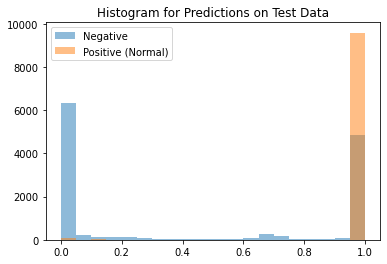

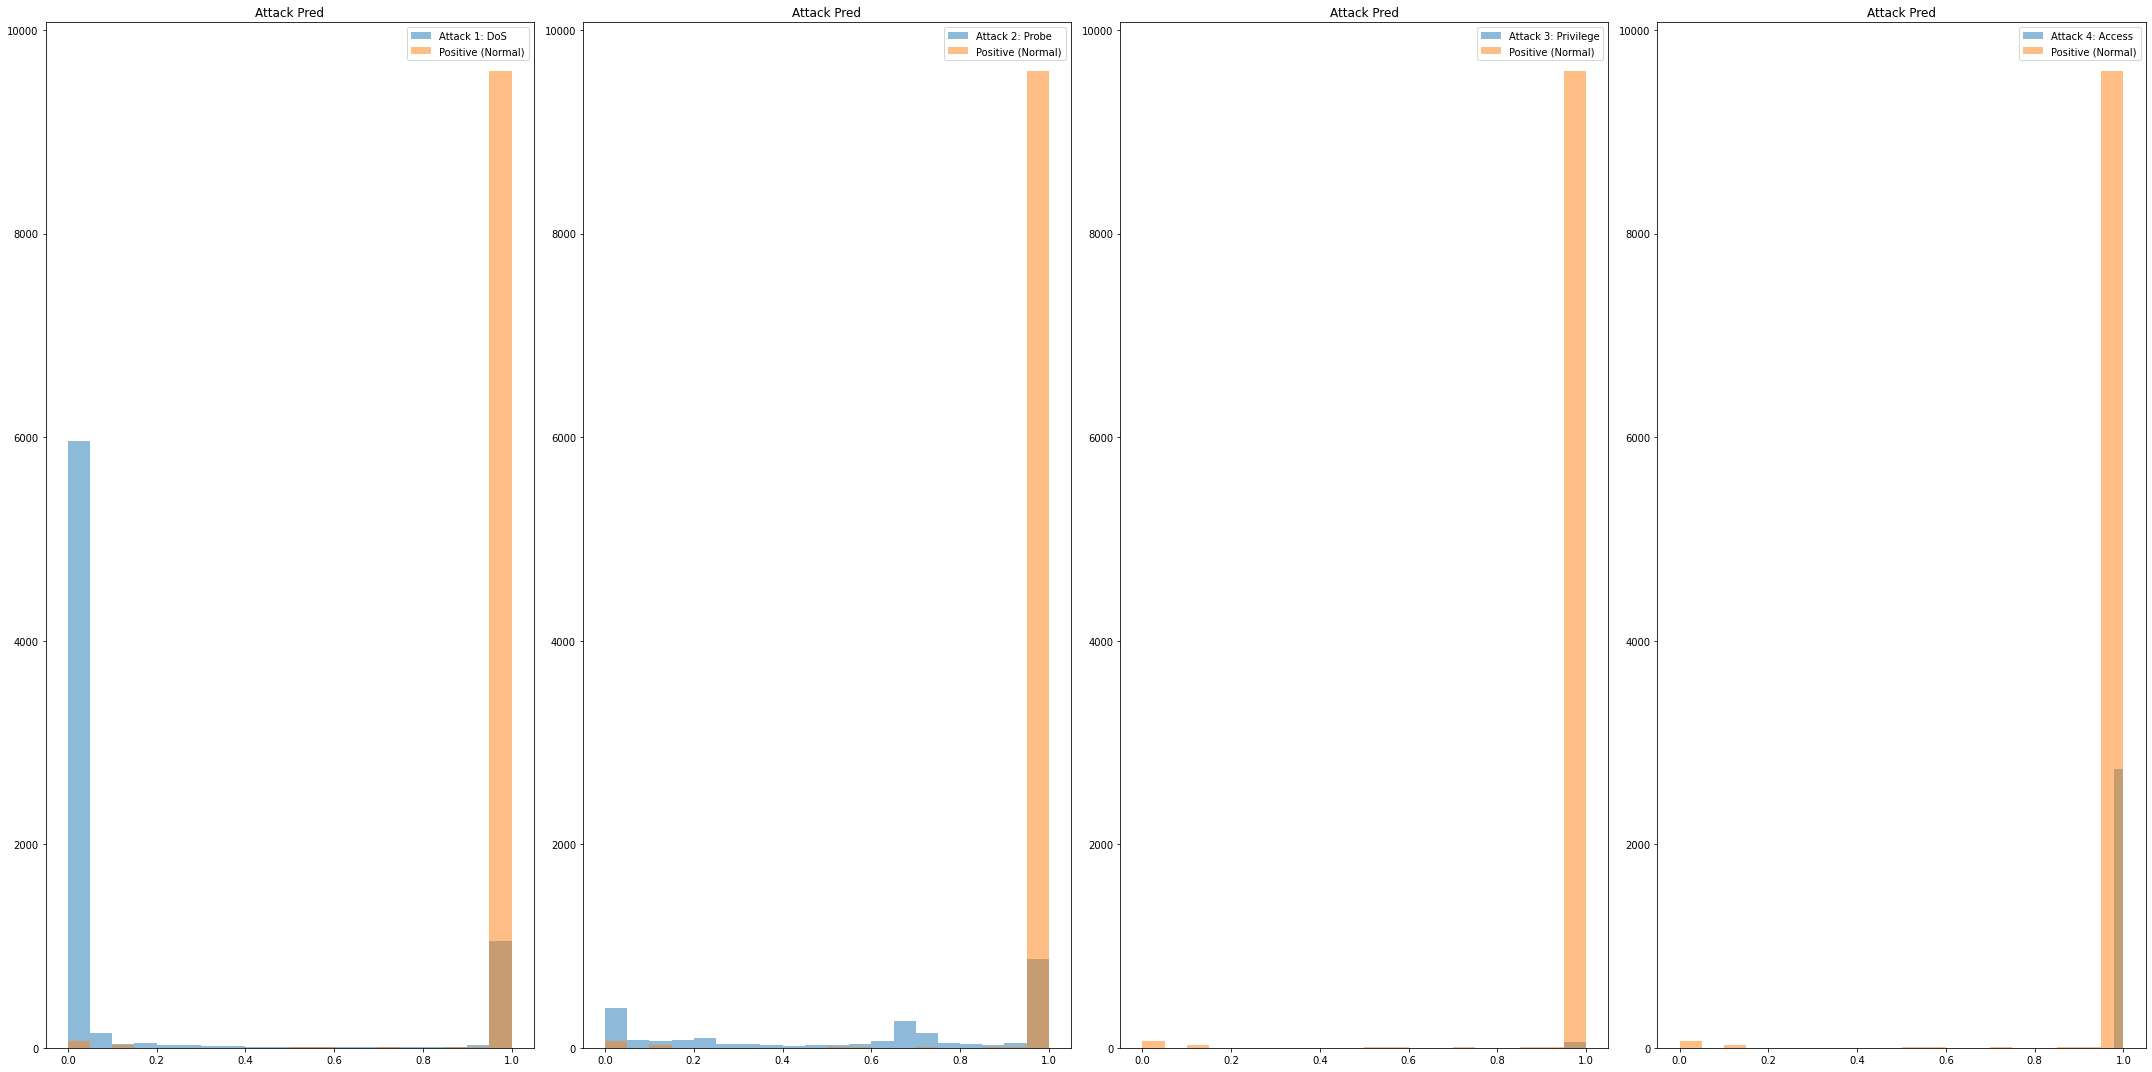

AUPR Train Run 1: 0.9990719556423066
AUPR Test Run 1: 0.8581966483244952
AUPR Indiv Test Run 1: [0.9447046417006675, 0.6919798974412373, 0.009832011697879044, 0.13099298638231513]
Epoch 1/500
3186/3186 [==============================] - 20s 5ms/step - loss: 0.0195 - val_loss: 0.0095
Epoch 2/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0061 - val_loss: 0.0022
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 4/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/500
3186/3186 [==============================] - 15s 5ms/step - loss: 9.3391e-04 - val_loss: 0.0014
Epoch 8/500
3186/3186 [==============================] - 15s 5ms/step - loss: 8.0949e-04

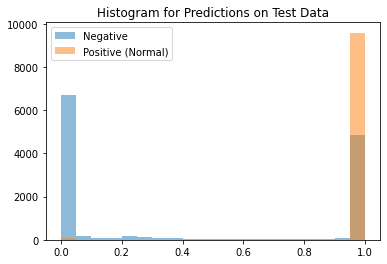

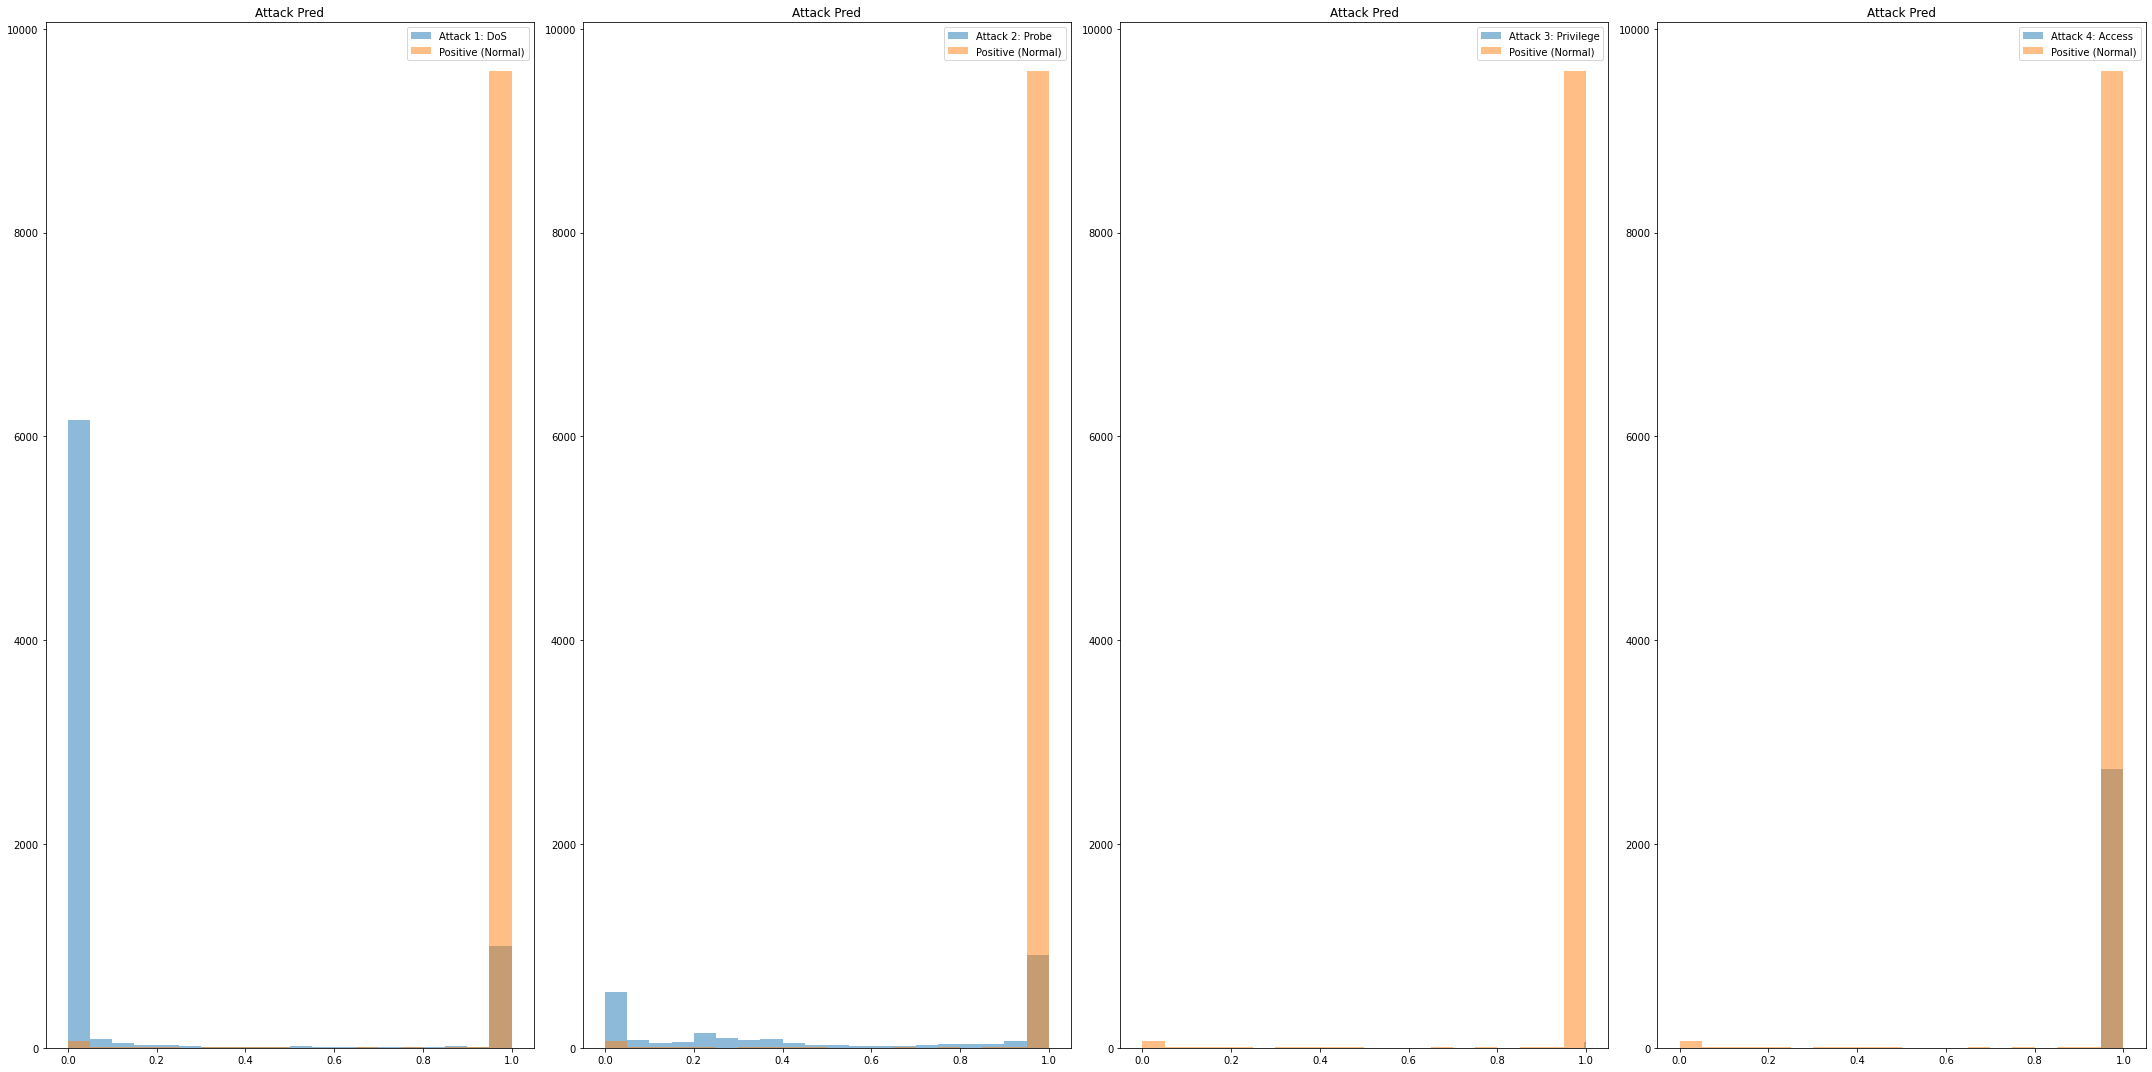

AUPR Train Run 2: 0.9994478437759137
AUPR Test Run 2: 0.841941426643328
AUPR Indiv Test Run 2: [0.906854296134985, 0.6672831189501365, 0.0063121492106053174, 0.147334375587422]
Epoch 1/500
3186/3186 [==============================] - 21s 5ms/step - loss: 0.0204 - val_loss: 0.0098
Epoch 2/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0060 - val_loss: 0.0020
Epoch 3/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 4/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/500
3186/3186 [==============================] - 15s 5ms/step - loss: 8.9011e-04 - val_loss: 0.0013
Epoch 8/500
3186/3186 [==============================] - 15s 5ms/step - loss: 7.4645e-04 - 

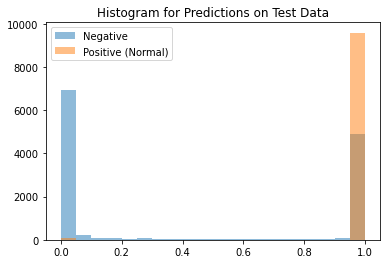

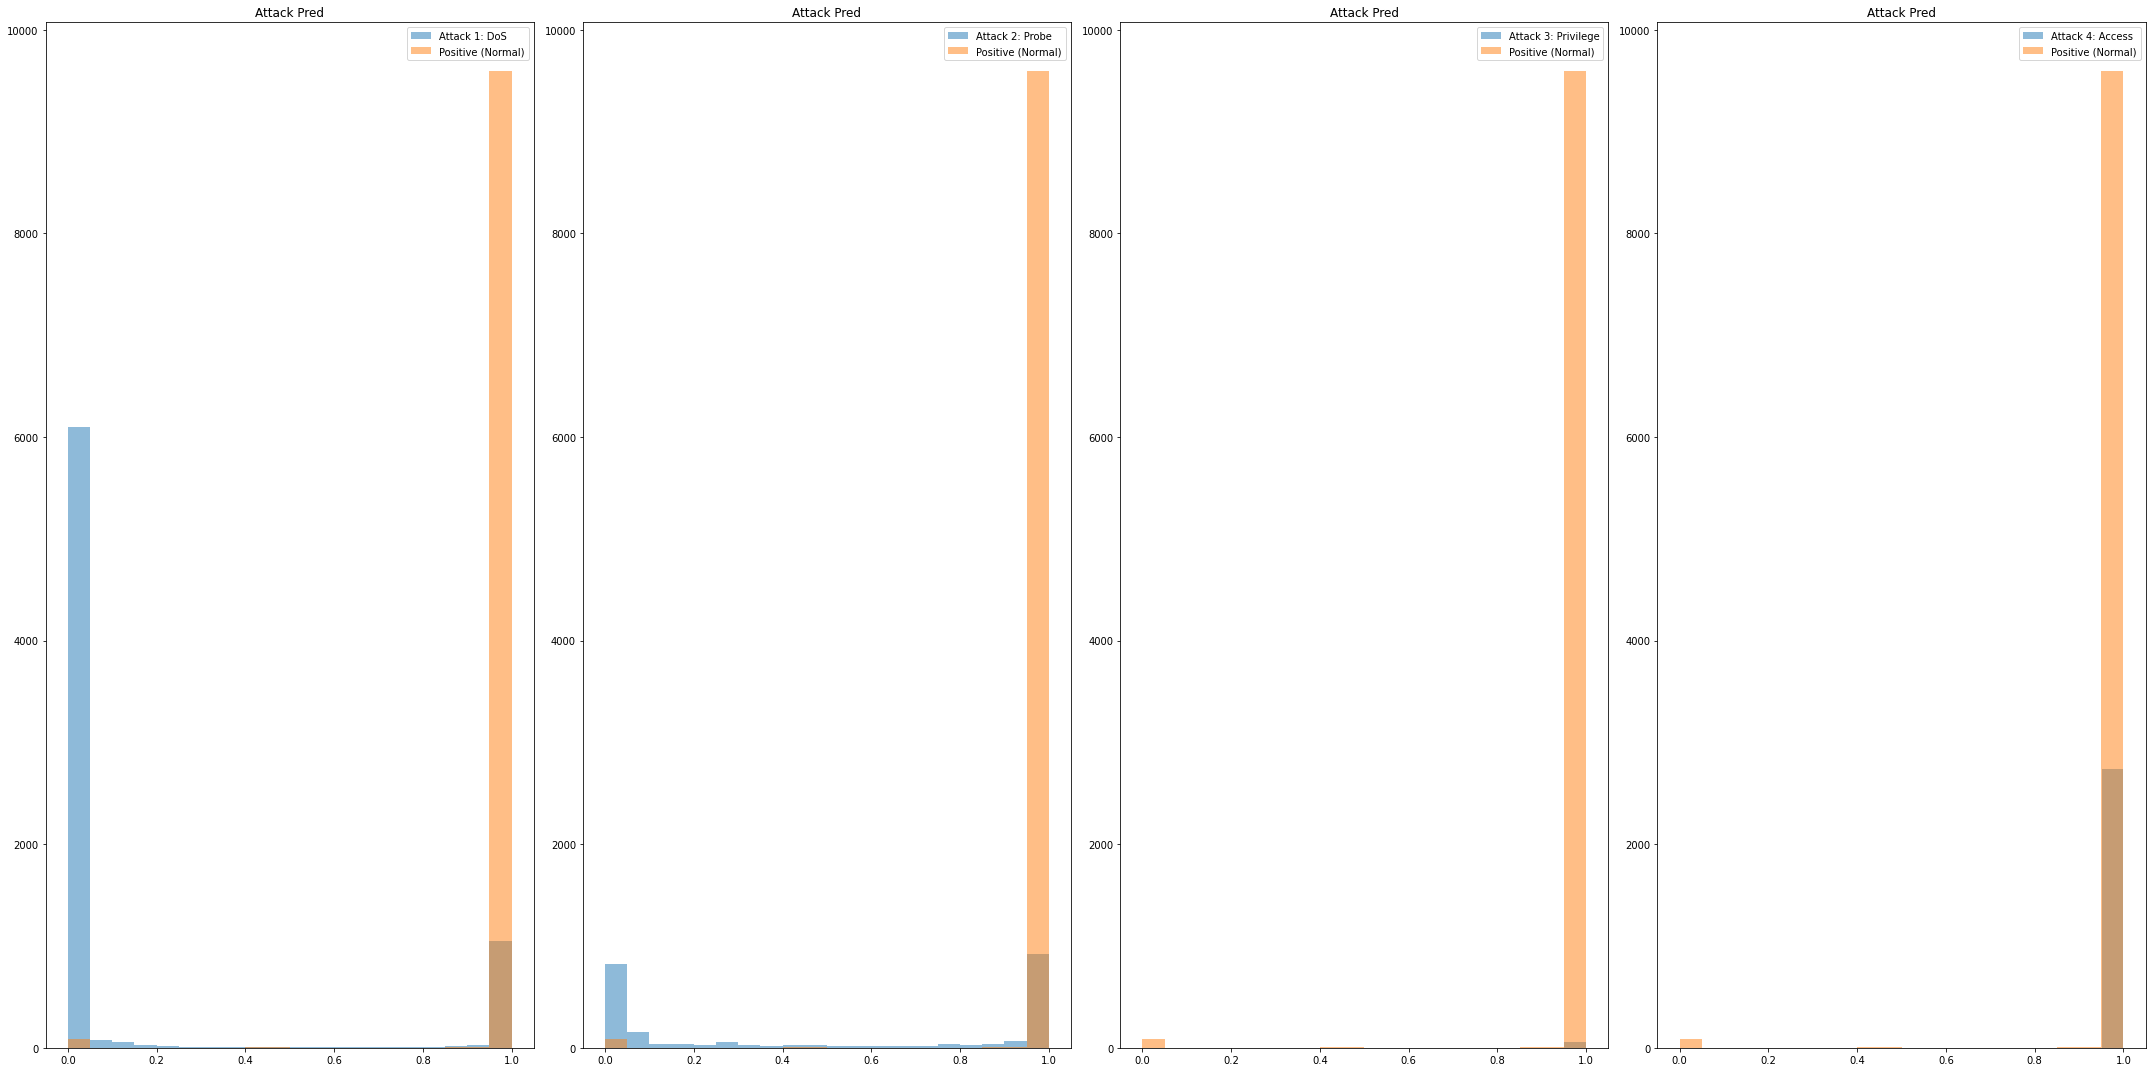

AUPR Train Run 3: 0.9985251347611035
AUPR Test Run 3: 0.842867653715359
AUPR Indiv Test Run 3: [0.917642158362925, 0.6696560737455785, 0.020712868956474628, 0.13365114177429366]
Epoch 1/500
3186/3186 [==============================] - 21s 5ms/step - loss: 0.0197 - val_loss: 0.0088
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 8.5591e-04 - val_loss: 0.0011
Epoch 8/500
3186/3186 [==============================] - 15s 5ms/step - loss: 7.3588e-04 -

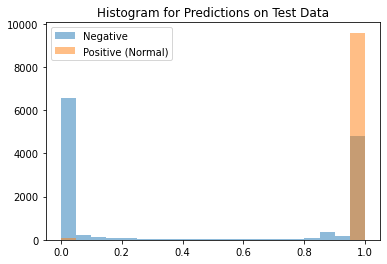

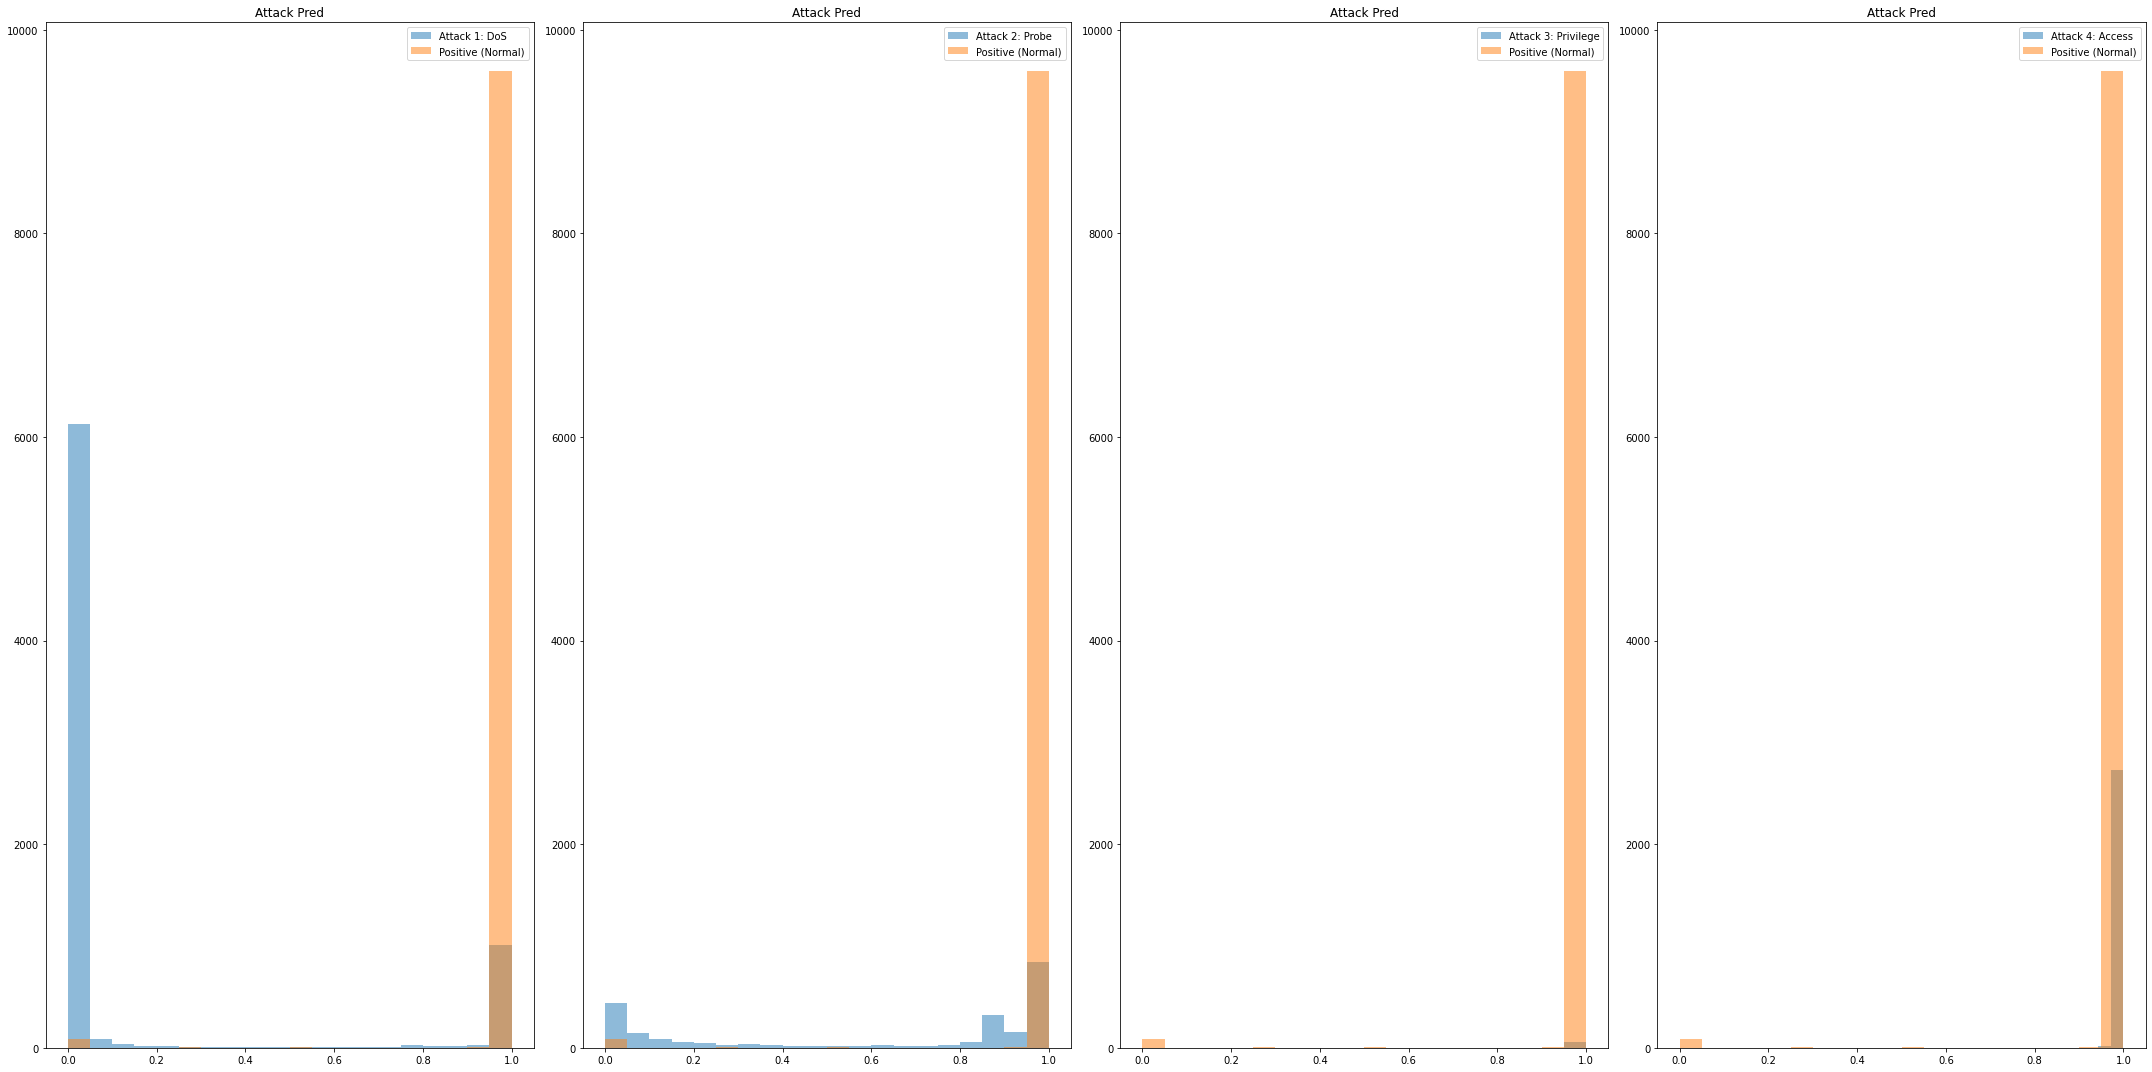

AUPR Train Run 4: 0.9993465755628776
AUPR Test Run 4: 0.8502933155699226
AUPR Indiv Test Run 4: [0.9265990794624568, 0.7078483913232273, 0.006547947612761153, 0.12674892767952117]
Epoch 1/500
3186/3186 [==============================] - 21s 5ms/step - loss: 0.0208 - val_loss: 0.0092
Epoch 2/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 4/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 5/500
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 9.8790e-04 - val_loss: 0.0010
Epoch 8/500
3186/3186 [==============================] - 15s 5ms/step - loss: 8.6011e-04

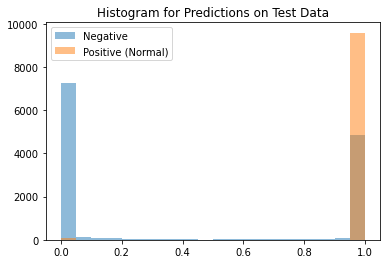

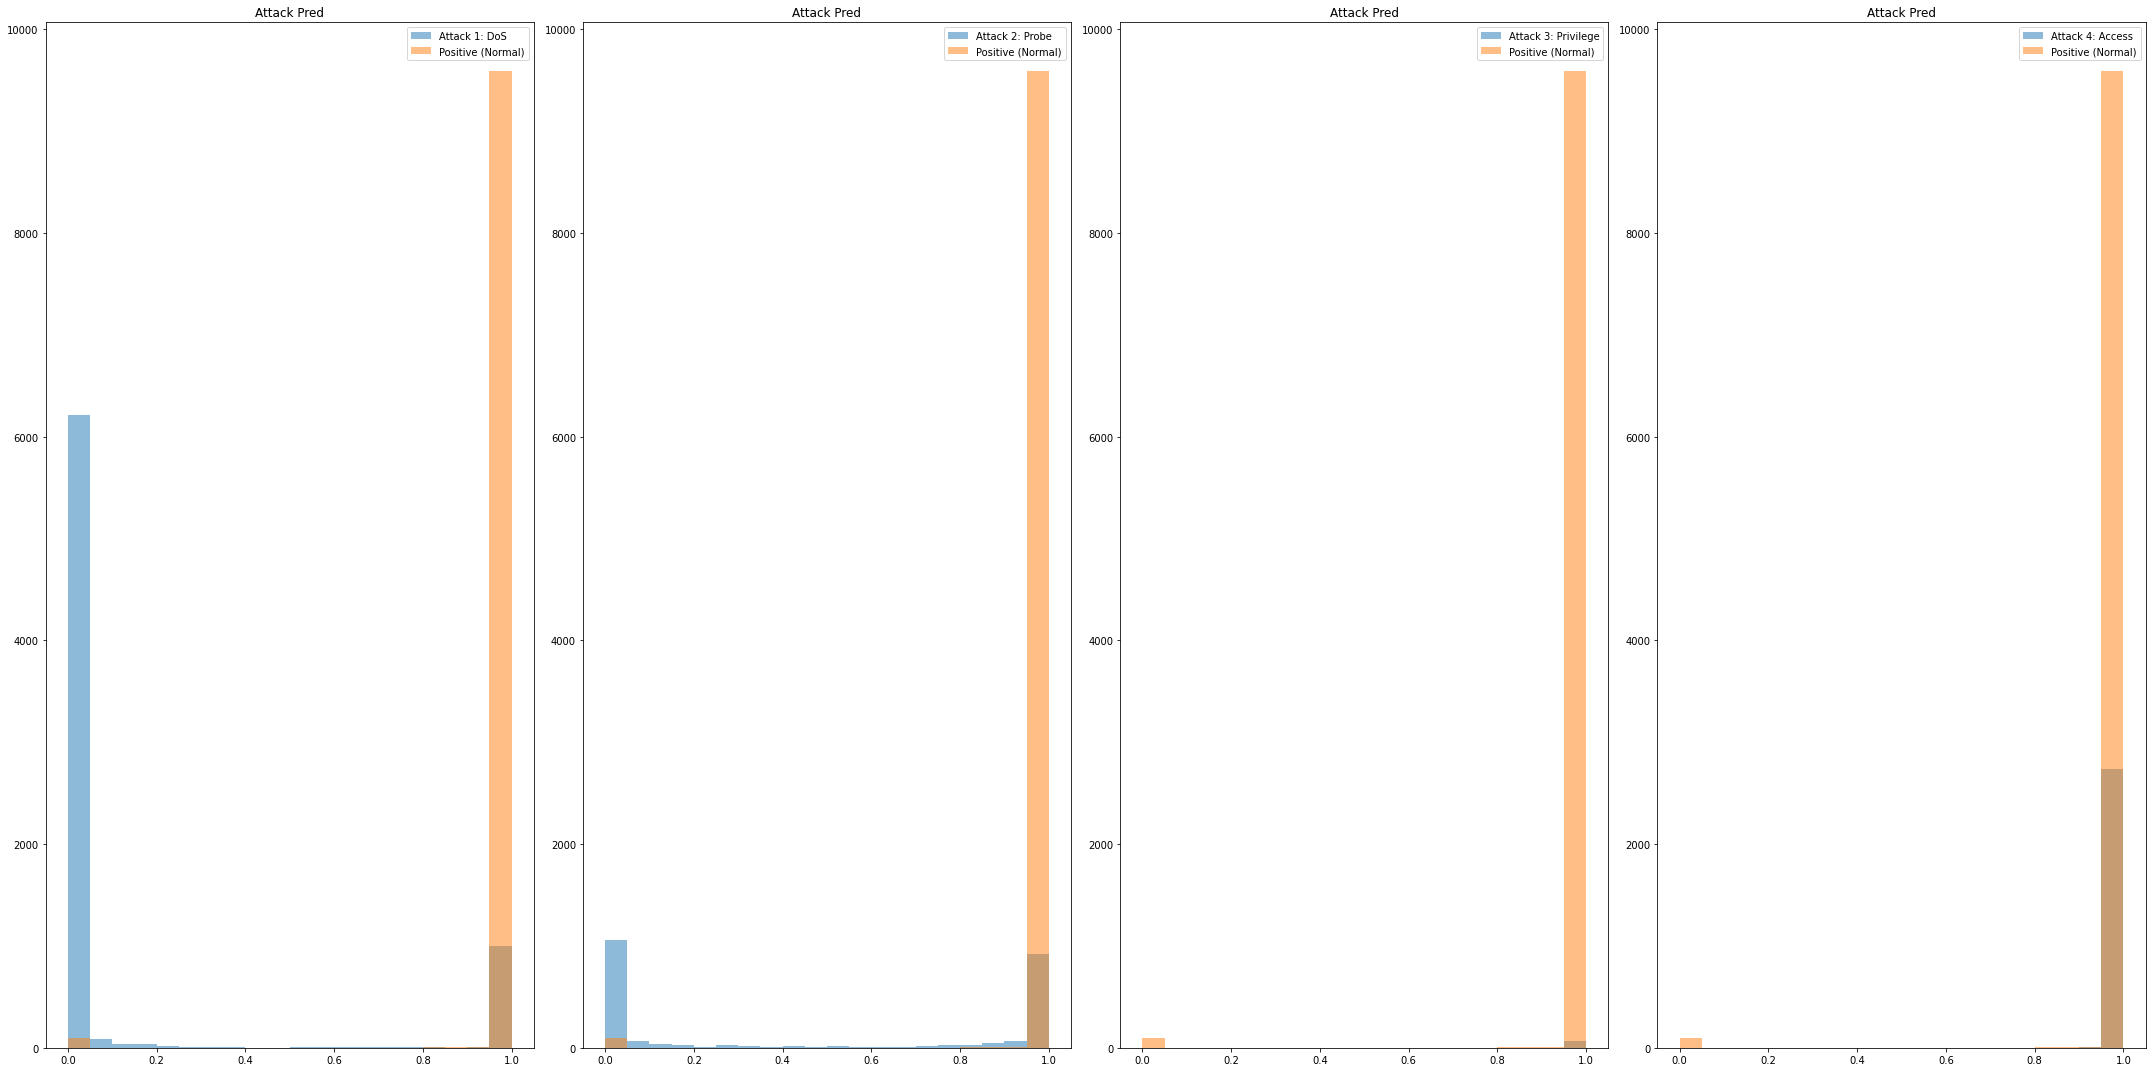

AUPR Train Run 5: 0.9987043664357029
AUPR Test Run 5: 0.8342114472547462
AUPR Indiv Test Run 5: [0.9087847220210389, 0.6743571944526991, 0.007692482788617816, 0.1274965517582148]
AUPR (Train): 0.9990191752355809+-0.0003569072804025266
AUPR (Test): 0.8455020983015702+-0.008138855511604535


,0,1,2,3,4,AUPR Mean,AUPR Std
1,0.944705,0.906854,0.917642,0.926599,0.908785,0.920917,0.015442
2,0.691980,0.667283,0.669656,0.707848,0.674357,0.682225,0.017283
3,0.009832,0.006312,0.020713,0.006548,0.007692,0.010219,0.006029
4,0.130993,0.147334,0.133651,0.126749,0.127497,0.133245,0.008352


([0.9990719556423066,
  0.9994478437759137,
  0.9985251347611035,
  0.9993465755628776,
  0.9987043664357029],
 [0.8581966483244952,
  0.841941426643328,
  0.842867653715359,
  0.8502933155699226,
  0.8342114472547462],
 {0: [0.9447046417006675,
   0.6919798974412373,
   0.009832011697879044,
   0.13099298638231513],
  1: [0.906854296134985,
   0.6672831189501365,
   0.0063121492106053174,
   0.147334375587422],
  2: [0.917642158362925,
   0.6696560737455785,
   0.020712868956474628,
   0.13365114177429366],
  3: [0.9265990794624568,
   0.7078483913232273,
   0.006547947612761153,
   0.12674892767952117],
  4: [0.9087847220210389,
   0.6743571944526991,
   0.007692482788617816,
   0.1274965517582148]})

In [16]:
# HS1 mse
separation = "HS"
bumped = ""
sigma = 0.5
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_hs = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='mse', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    models_hs.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "HS1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 122)]             0         
                                                                 
 dense_113 (Dense)           (None, 60)                7380      
                                                                 
 batch_normalization_69 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 tf.nn.leaky_relu_15 (TFOpLa  (None, 60)               0         
 mbda)                                                           
                                                                 
 dense_114 (Dense)           (None, 1)                 61        
                                                                 
 tf.math.sigmoid_15 (TFOpLam  (None, 1)                0       

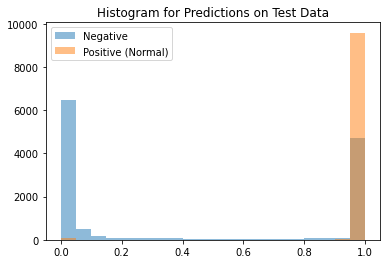

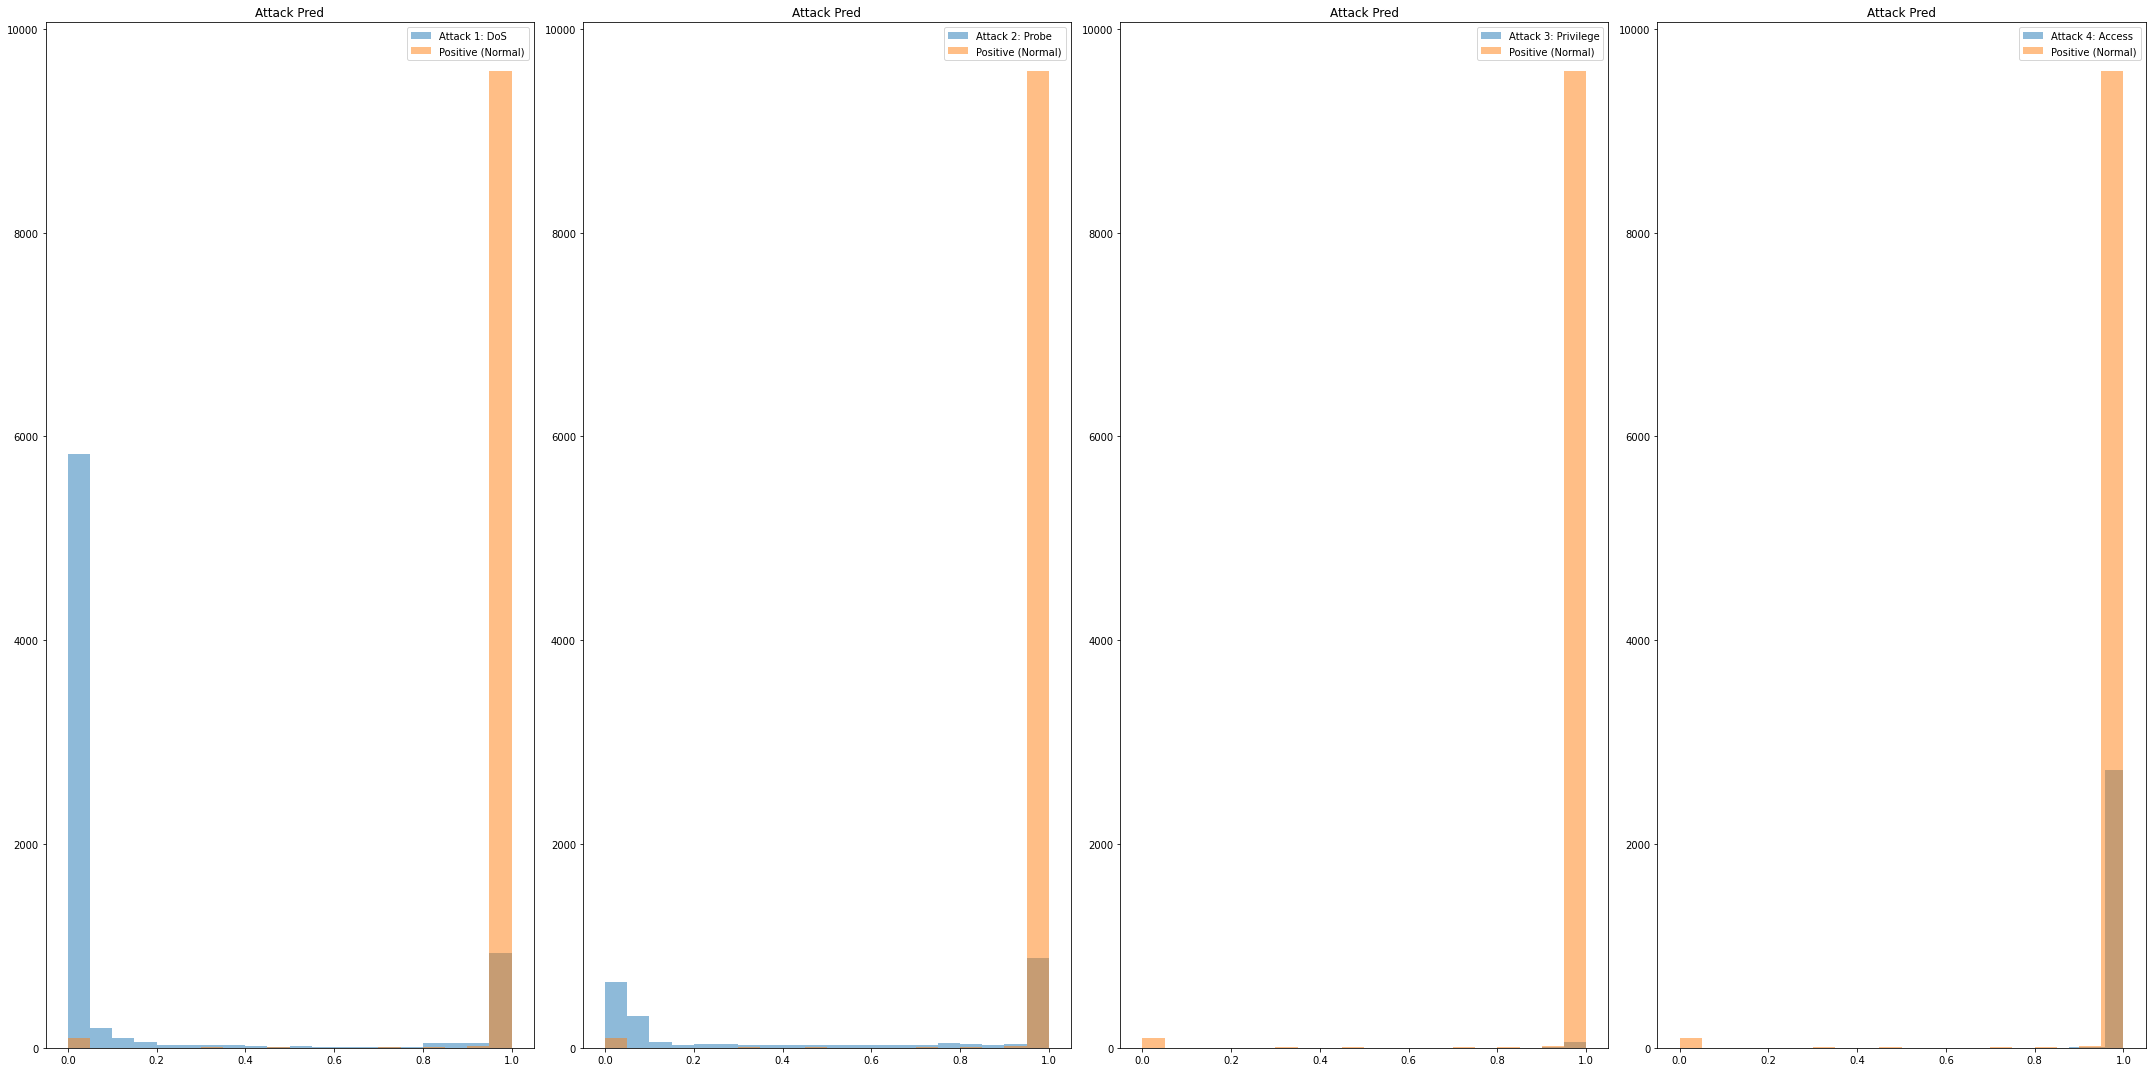

AUPR Train Run 1: 0.9997121382903306
AUPR Test Run 1: 0.8963182773462444
AUPR Indiv Test Run 1: [0.9634860874939039, 0.7069236597528057, 0.025293405187884085, 0.23861195429232068]
Epoch 1/500
3186/3186 [==============================] - 22s 6ms/step - loss: 0.0717 - val_loss: 0.0209
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0177 - val_loss: 0.0093
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0098 - val_loss: 0.0073
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0057 - val_loss: 0.0085
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0047 - val_loss: 0.0089
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0040 - val_loss: 0.0102
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0033 - val_l

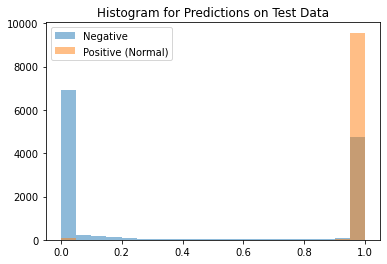

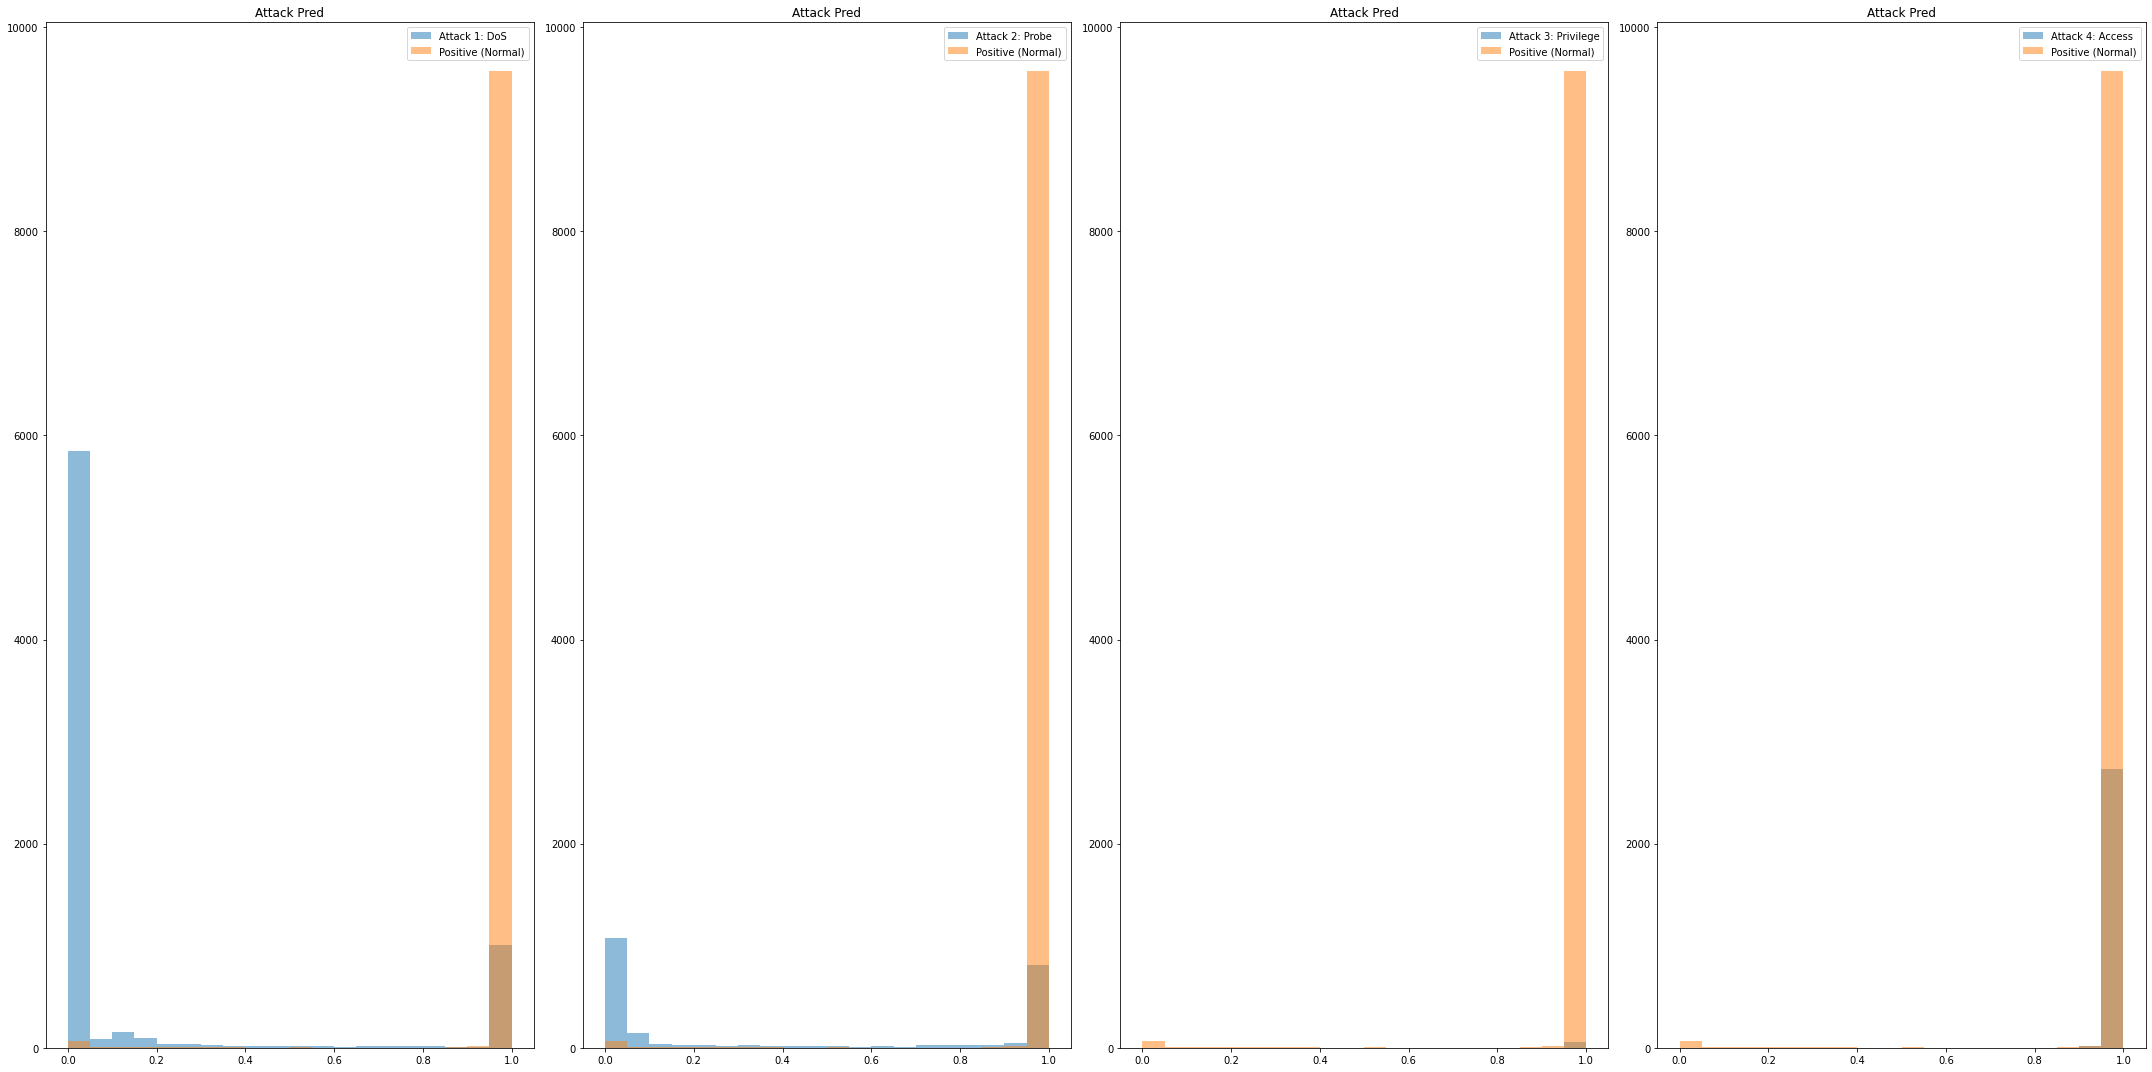

AUPR Train Run 2: 0.9993402014634751
AUPR Test Run 2: 0.8696735302824916
AUPR Indiv Test Run 2: [0.9289222940018681, 0.7512174437065136, 0.013988593823876485, 0.17113907468909498]
Epoch 1/500
3186/3186 [==============================] - 22s 6ms/step - loss: 0.0741 - val_loss: 0.0194
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0166 - val_loss: 0.0085
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0093 - val_loss: 0.0063
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0068 - val_loss: 0.0056
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0053 - val_loss: 0.0057
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0043 - val_loss: 0.0058
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0035 - val_loss: 0.0063
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0029 - val_l

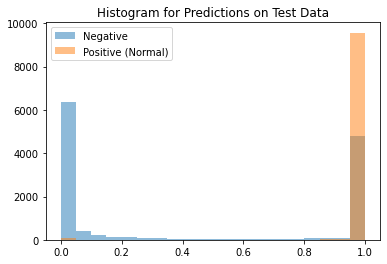

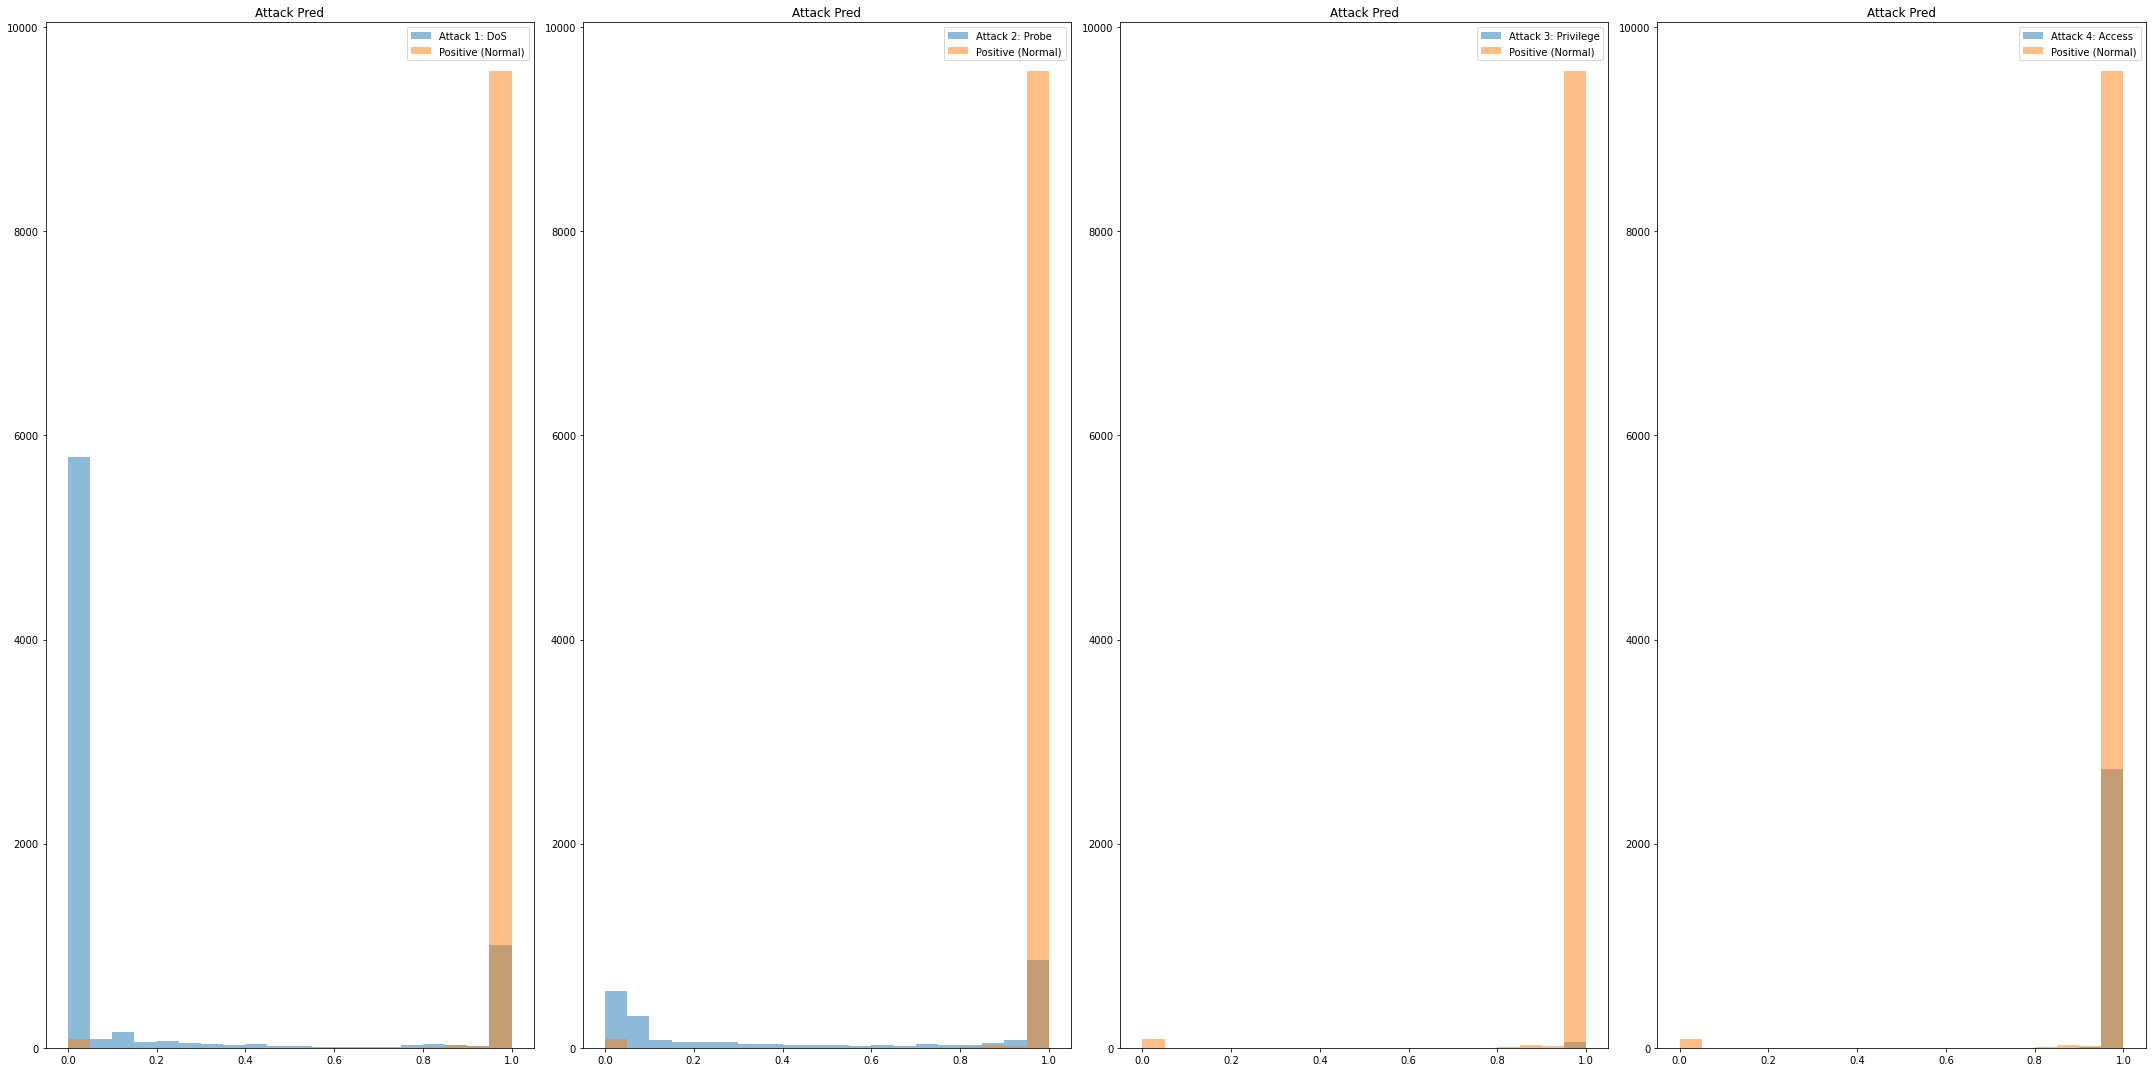

AUPR Train Run 3: 0.999222851886156
AUPR Test Run 3: 0.8706031927706255
AUPR Indiv Test Run 3: [0.9405008025516655, 0.7443843100798837, 0.016525961746663494, 0.15982468722269907]
Epoch 1/500
3186/3186 [==============================] - 22s 5ms/step - loss: 0.0740 - val_loss: 0.0190
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0165 - val_loss: 0.0084
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0094 - val_loss: 0.0064
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0069 - val_loss: 0.0055
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0044 - val_loss: 0.0054
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0037 - val_loss: 0.0047
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0030 - val_lo

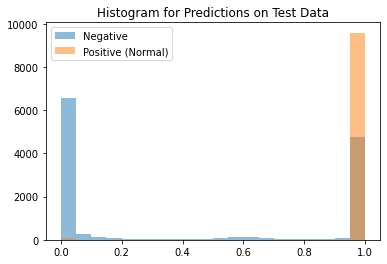

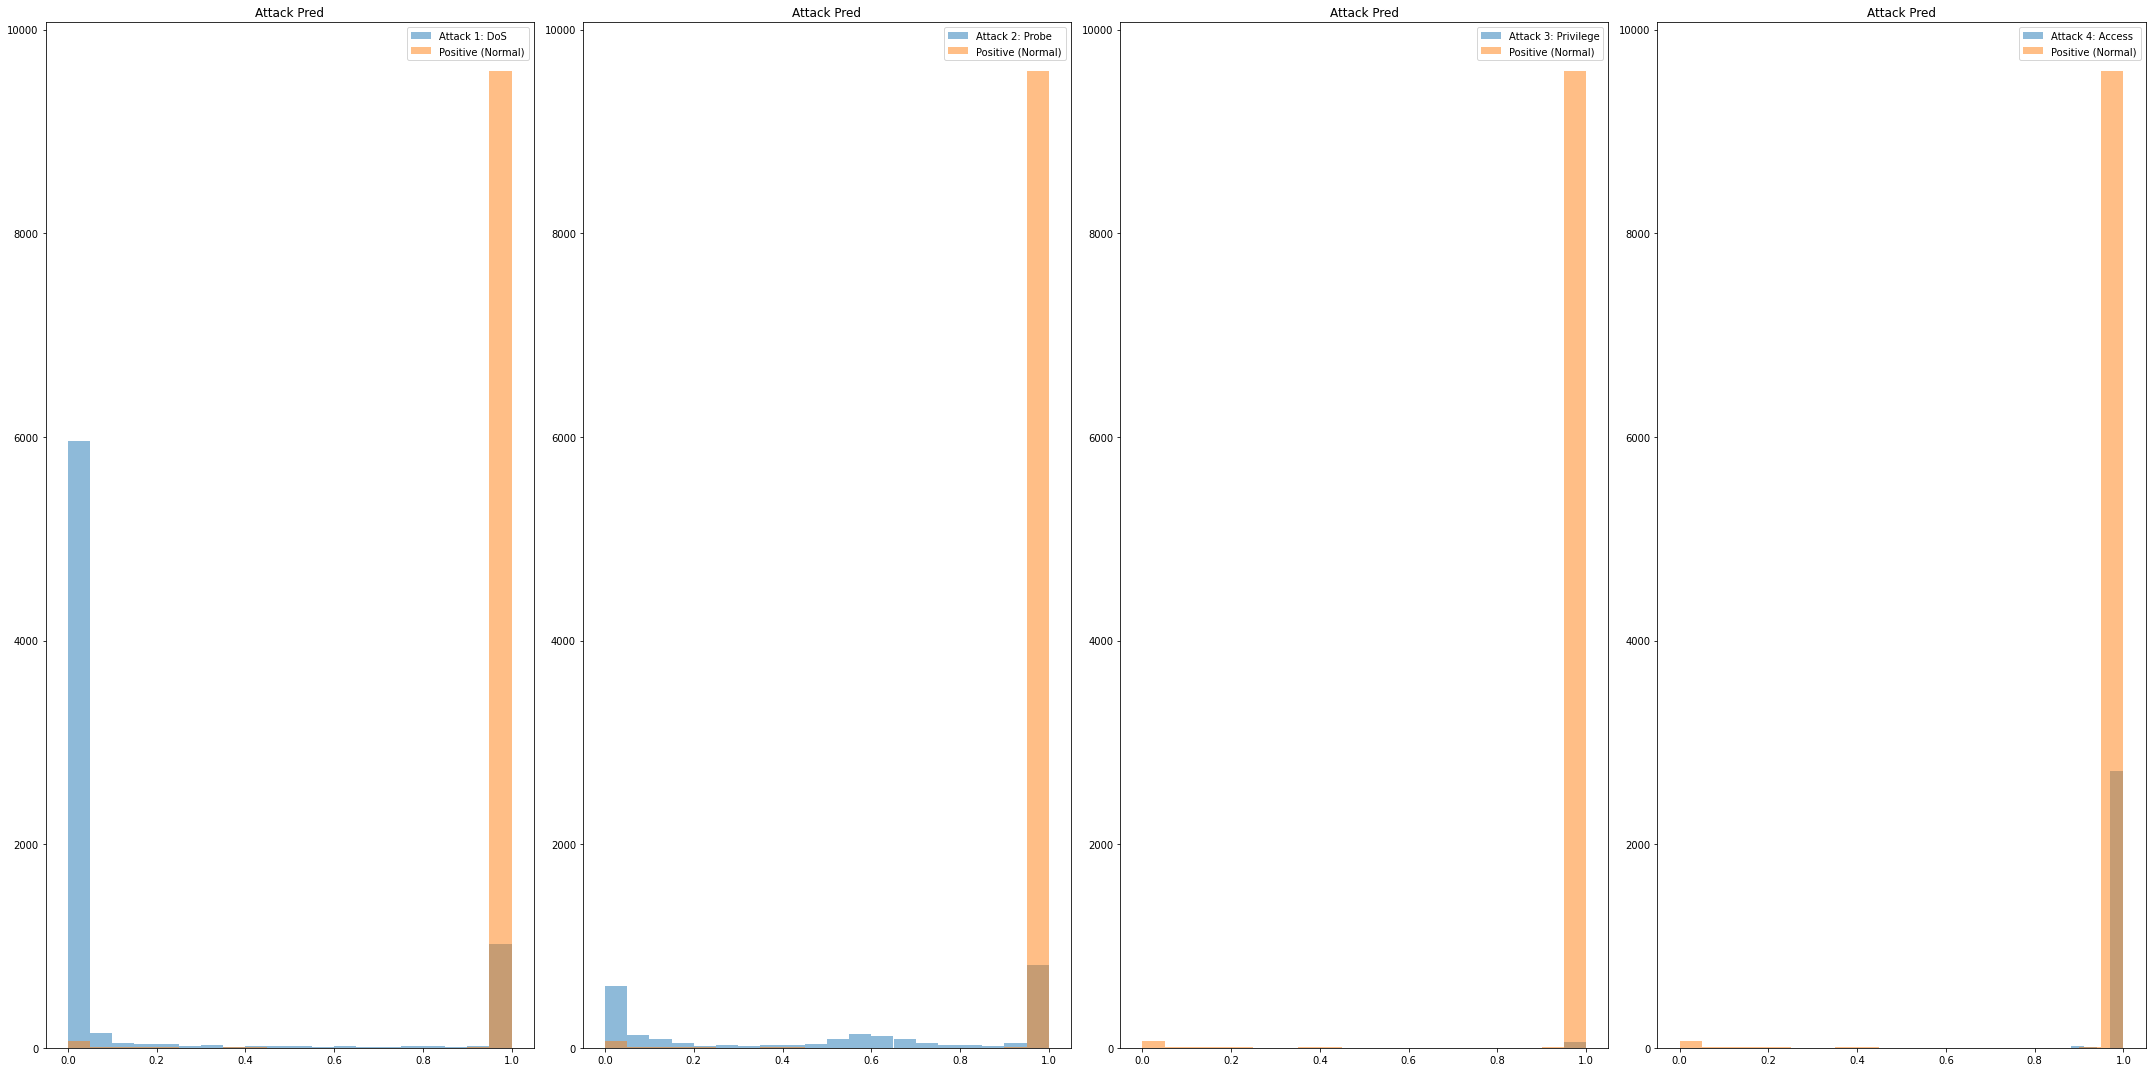

AUPR Train Run 4: 0.9995467293372331
AUPR Test Run 4: 0.8777288223540738
AUPR Indiv Test Run 4: [0.9574477141345441, 0.7425820957561349, 0.010705747801189614, 0.1657818465738014]
Epoch 1/500
3186/3186 [==============================] - 22s 5ms/step - loss: 0.0752 - val_loss: 0.0214
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0174 - val_loss: 0.0103
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0100 - val_loss: 0.0082
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0056 - val_loss: 0.0065
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0046 - val_loss: 0.0062
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0038 - val_loss: 0.0060
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.0032 - val_lo

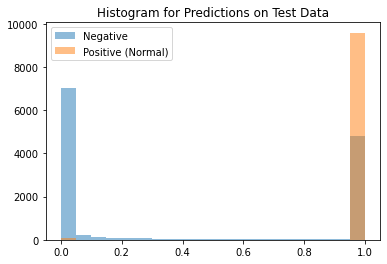

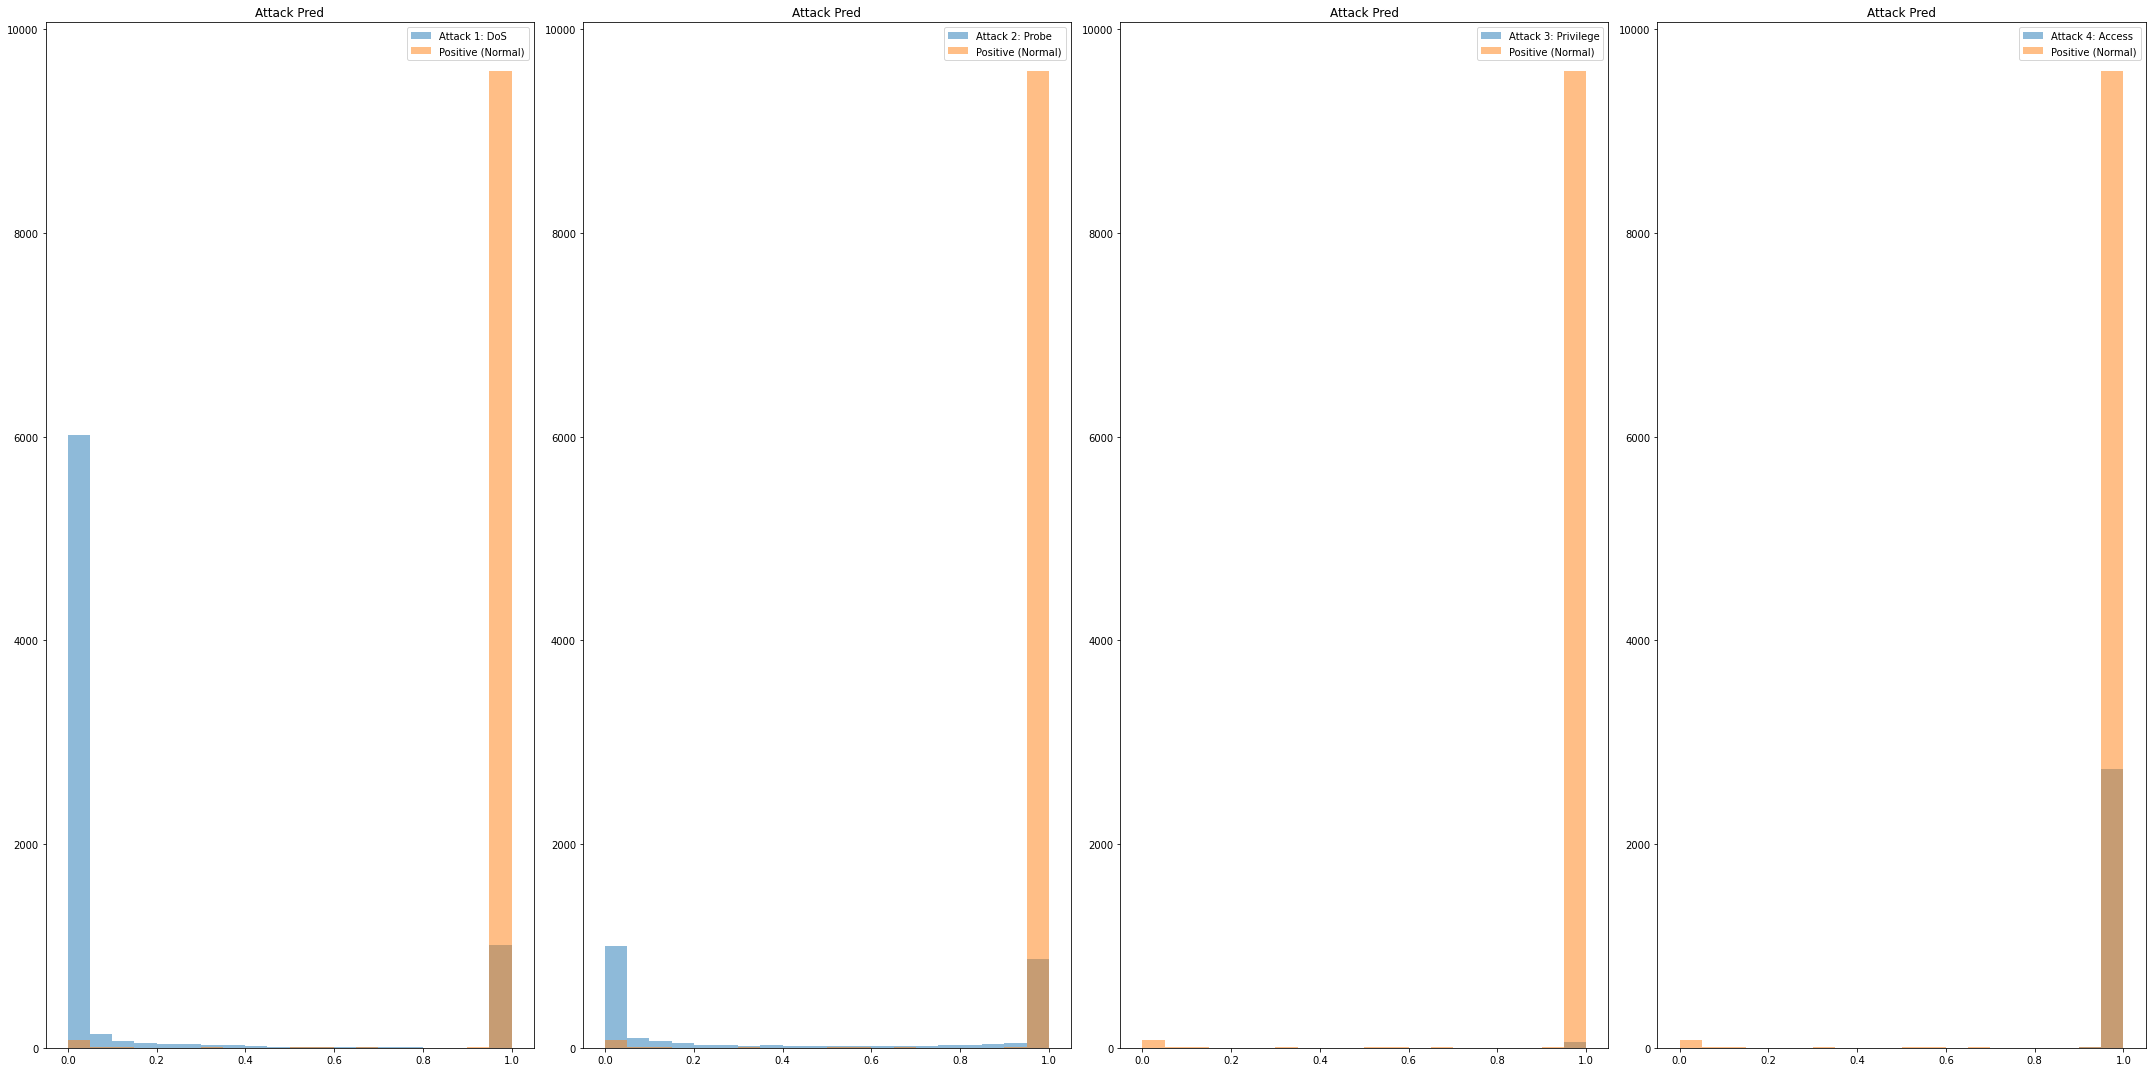

AUPR Train Run 5: 0.9996592158155185
AUPR Test Run 5: 0.8702634513375915
AUPR Indiv Test Run 5: [0.9289217837125802, 0.7477379695843667, 0.011756010821577997, 0.1654962231546412]
AUPR (Train): 0.9994962273585427+-0.0001869820559619542
AUPR (Test): 0.8769174548182054+-0.010135781590458342


,0,1,2,3,4,AUPR Mean,AUPR Std
1,0.963486,0.928922,0.940501,0.957448,0.928922,0.943856,0.016026
2,0.706924,0.751217,0.744384,0.742582,0.747738,0.738569,0.017996
3,0.025293,0.013989,0.016526,0.010706,0.011756,0.015654,0.005834
4,0.238612,0.171139,0.159825,0.165782,0.165496,0.180171,0.032914


([0.9997121382903306,
  0.9993402014634751,
  0.999222851886156,
  0.9995467293372331,
  0.9996592158155185],
 [0.8963182773462444,
  0.8696735302824916,
  0.8706031927706255,
  0.8777288223540738,
  0.8702634513375915],
 {0: [0.9634860874939039,
   0.7069236597528057,
   0.025293405187884085,
   0.23861195429232068],
  1: [0.9289222940018681,
   0.7512174437065136,
   0.013988593823876485,
   0.17113907468909498],
  2: [0.9405008025516655,
   0.7443843100798837,
   0.016525961746663494,
   0.15982468722269907],
  3: [0.9574477141345441,
   0.7425820957561349,
   0.010705747801189614,
   0.1657818465738014],
  4: [0.9289217837125802,
   0.7477379695843667,
   0.011756010821577997,
   0.1654962231546412]})

In [17]:
# HS1
separation = "HS"
bumped = ""
sigma = 0.5
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_hs = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='binary_crossentropy', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    models_hs.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "RBF1r"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 122)]             0         
                                                                 
 rbf_layer (RBFLayer)        (None, 60)                7320      
                                                                 
 batch_normalization_34 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 rbf_layer_1 (RBFLayer)      (None, 1)                 60        
                                                                 
Total params: 7,620
Trainable params: 7,500
Non-trainable params: 120
_________________________________________________________________
Epoch 1/500
3186/3186 [==============================] - 21s 5ms/step - loss: 0.2184 - val_loss: 0.2008
Epoch 2/500
3186/31

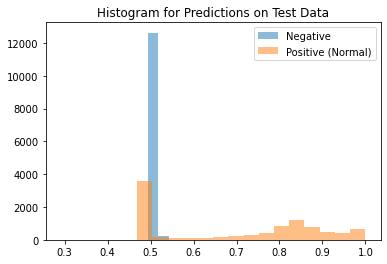

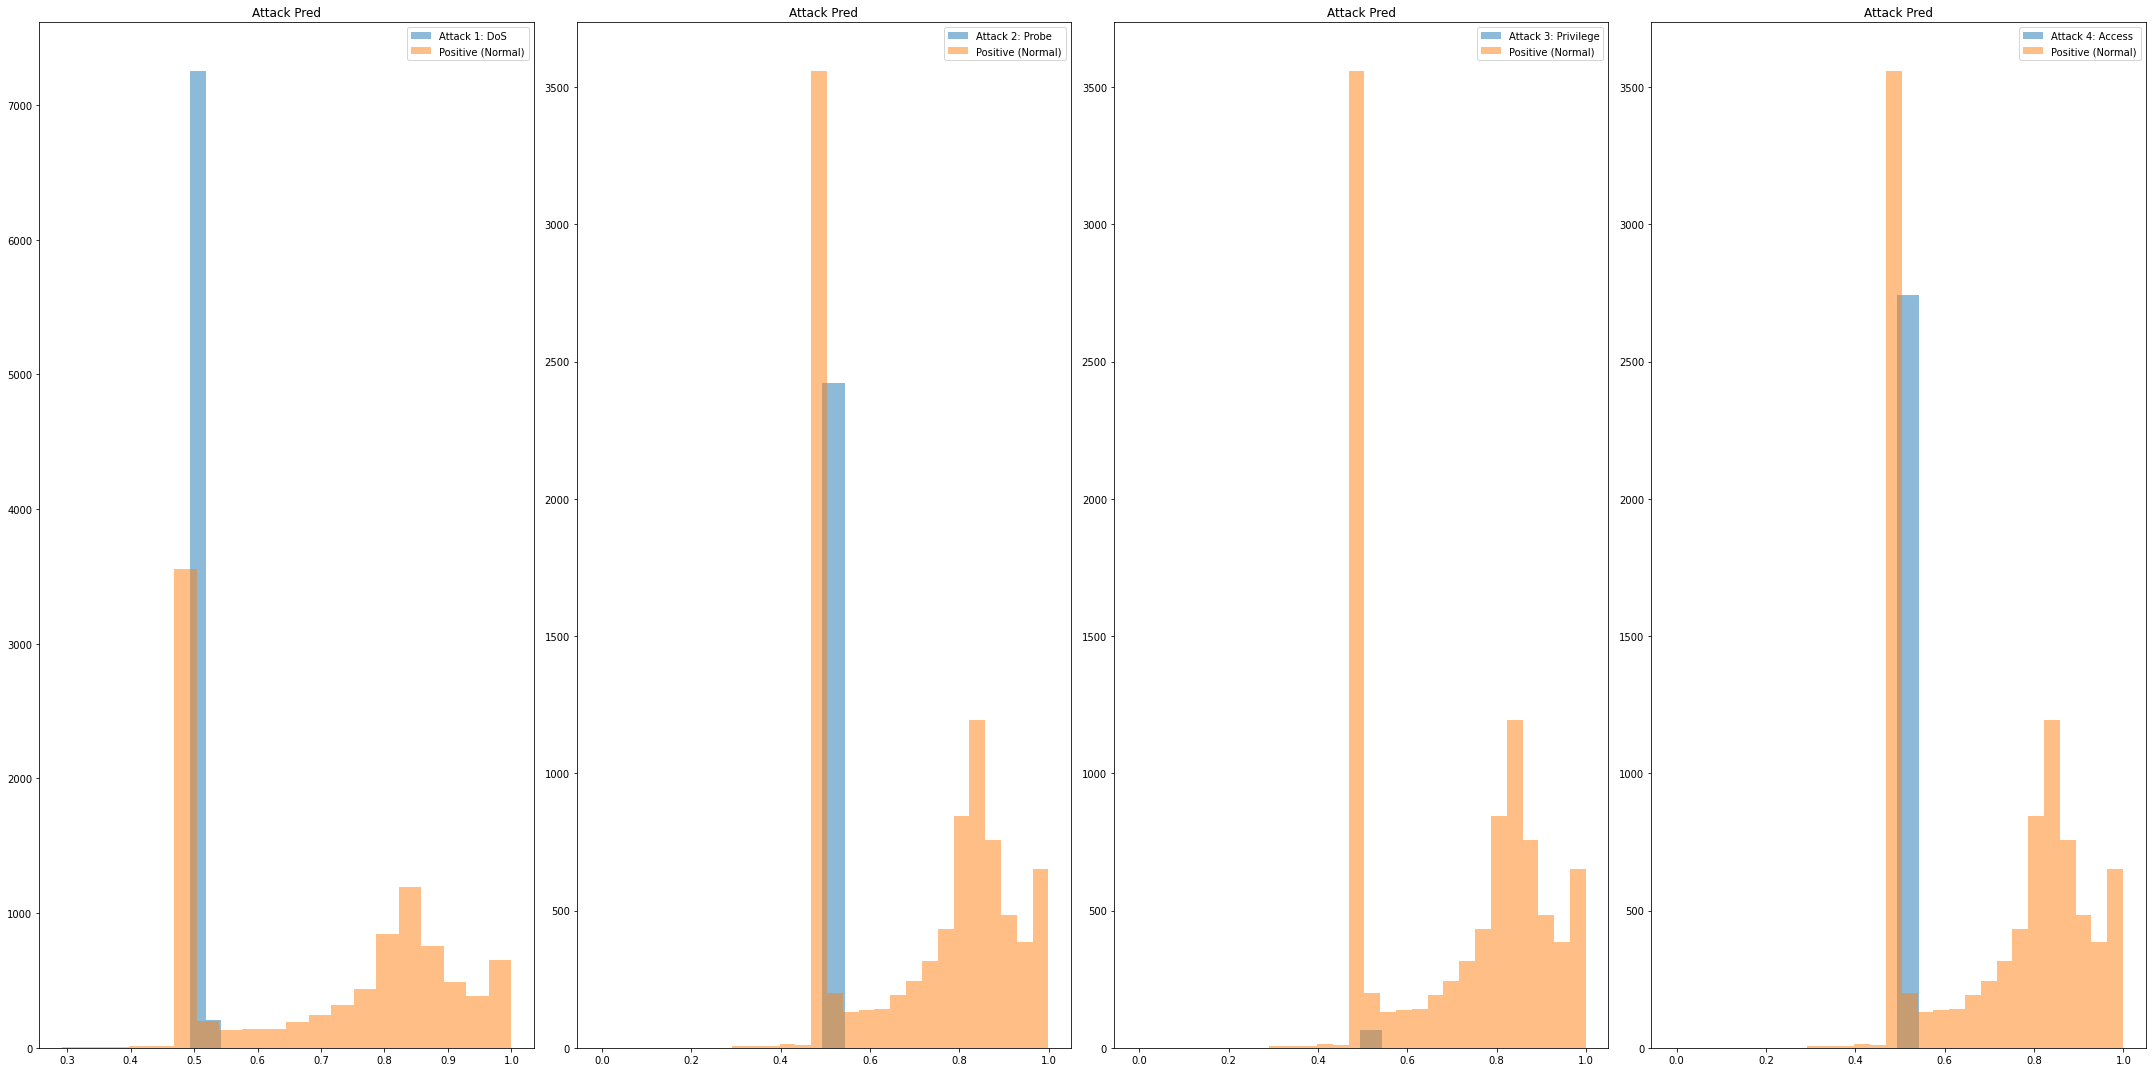

AUPR Train Run 1: 0.2926922892969218
AUPR Test Run 1: 0.407102244881804
AUPR Indiv Test Run 1: [0.3583340091362167, 0.2152, 0.009941878250229429, 0.23062048091474693]
Epoch 1/500
3186/3186 [==============================] - 22s 6ms/step - loss: 0.2194 - val_loss: 0.2009
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2031 - val_loss: 0.1991
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2018 - val_loss: 0.1981
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2009 - val_loss: 0.1973
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2003 - val_loss: 0.1967
Epoch 6/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.1998 - val_loss: 0.1961
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1994 - val_loss: 0.1956
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1990 - val_loss: 0.1952
E

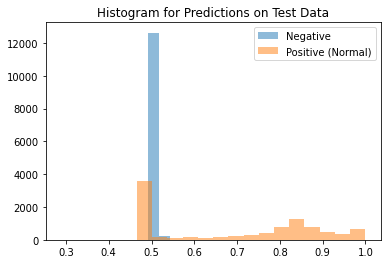

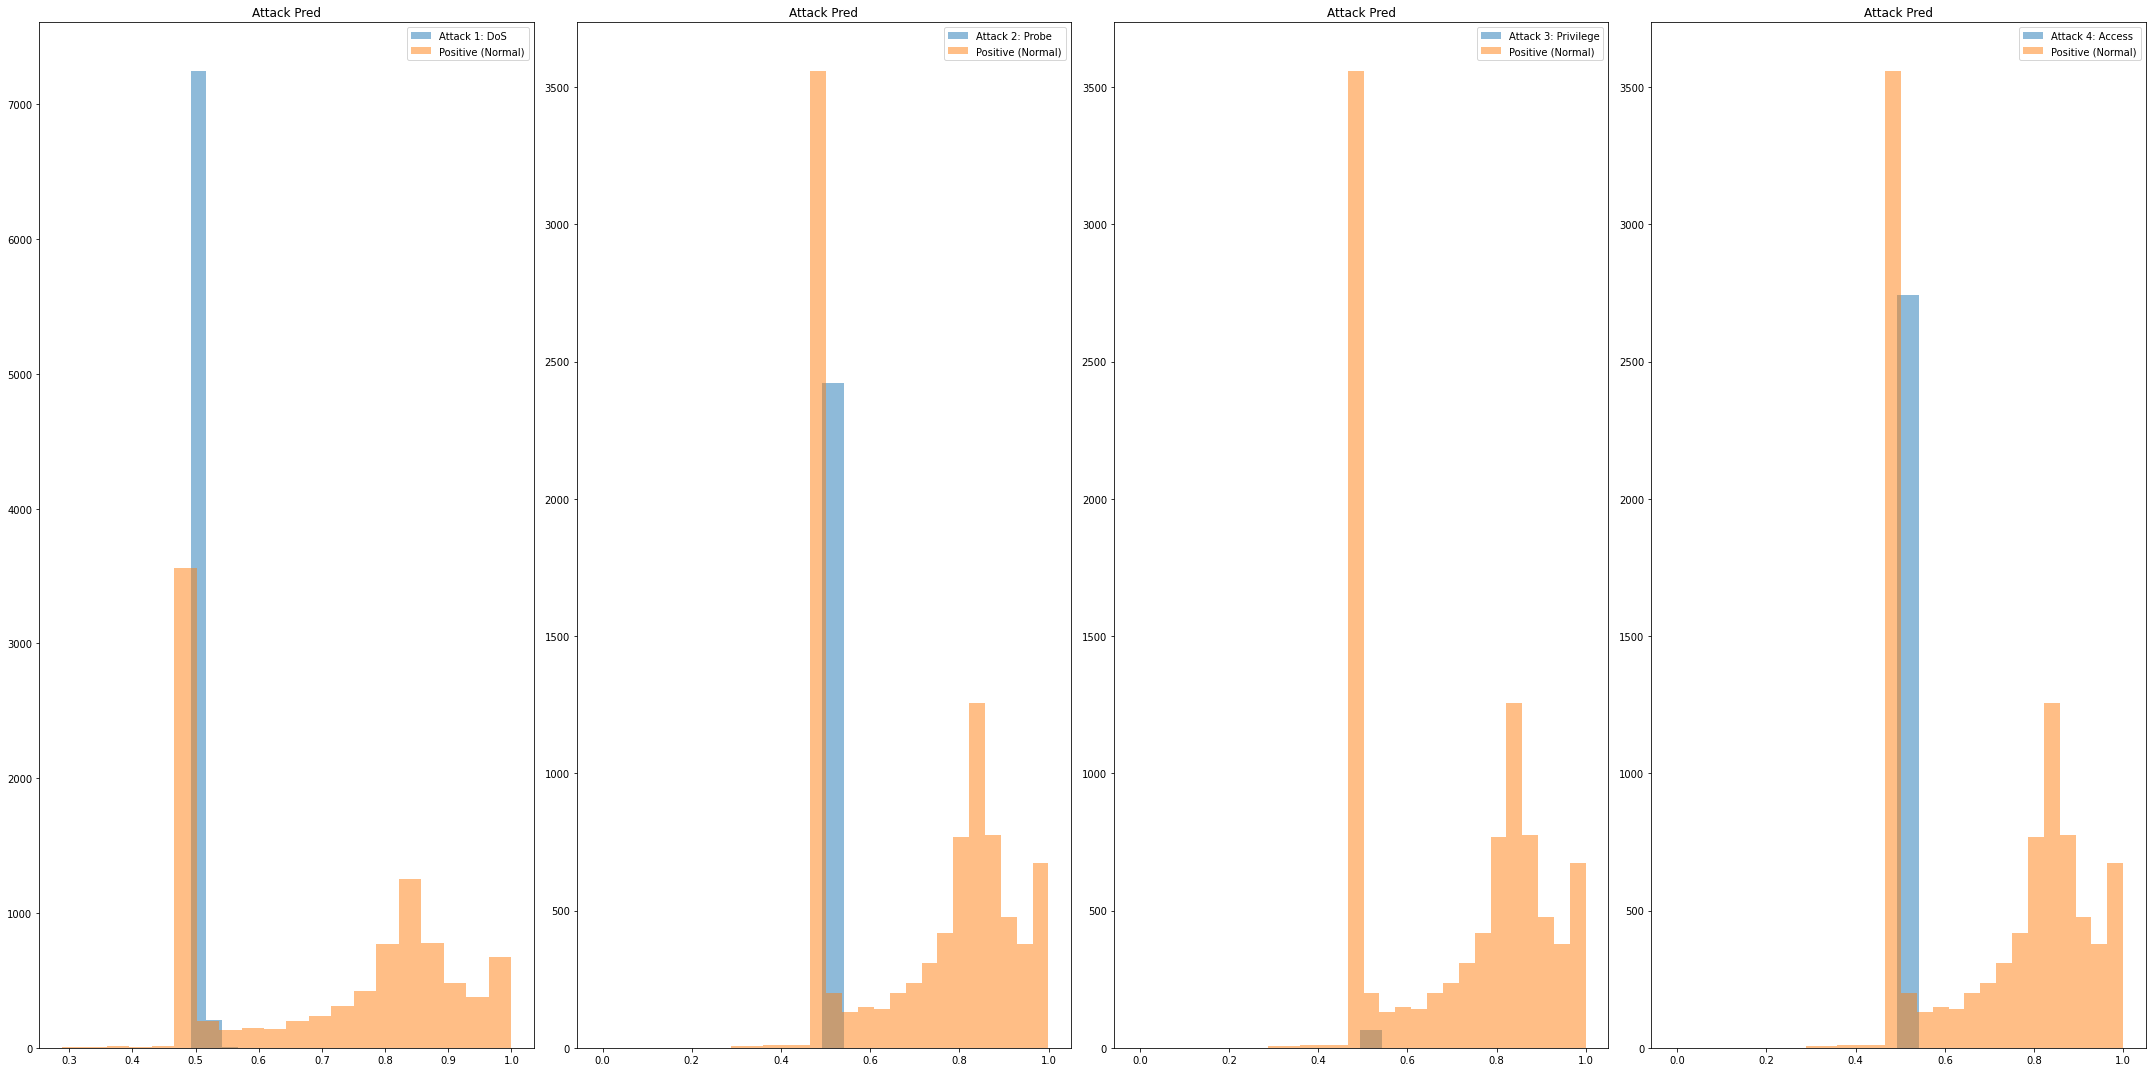

AUPR Train Run 2: 0.29314277738734484
AUPR Test Run 2: 0.4072806508944609
AUPR Indiv Test Run 2: [0.35854735706332624, 0.21516174902239601, 0.009938837920489297, 0.23058170813718898]
Epoch 1/500
3186/3186 [==============================] - 22s 6ms/step - loss: 0.2193 - val_loss: 0.2008
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2029 - val_loss: 0.1990
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2017 - val_loss: 0.1980
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2009 - val_loss: 0.1973
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2003 - val_loss: 0.1966
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1998 - val_loss: 0.1960
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1993 - val_loss: 0.1955
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1989 - va

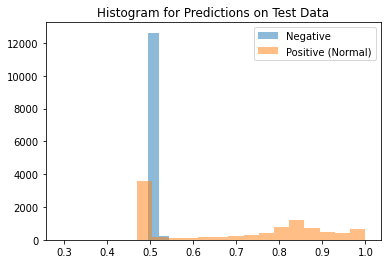

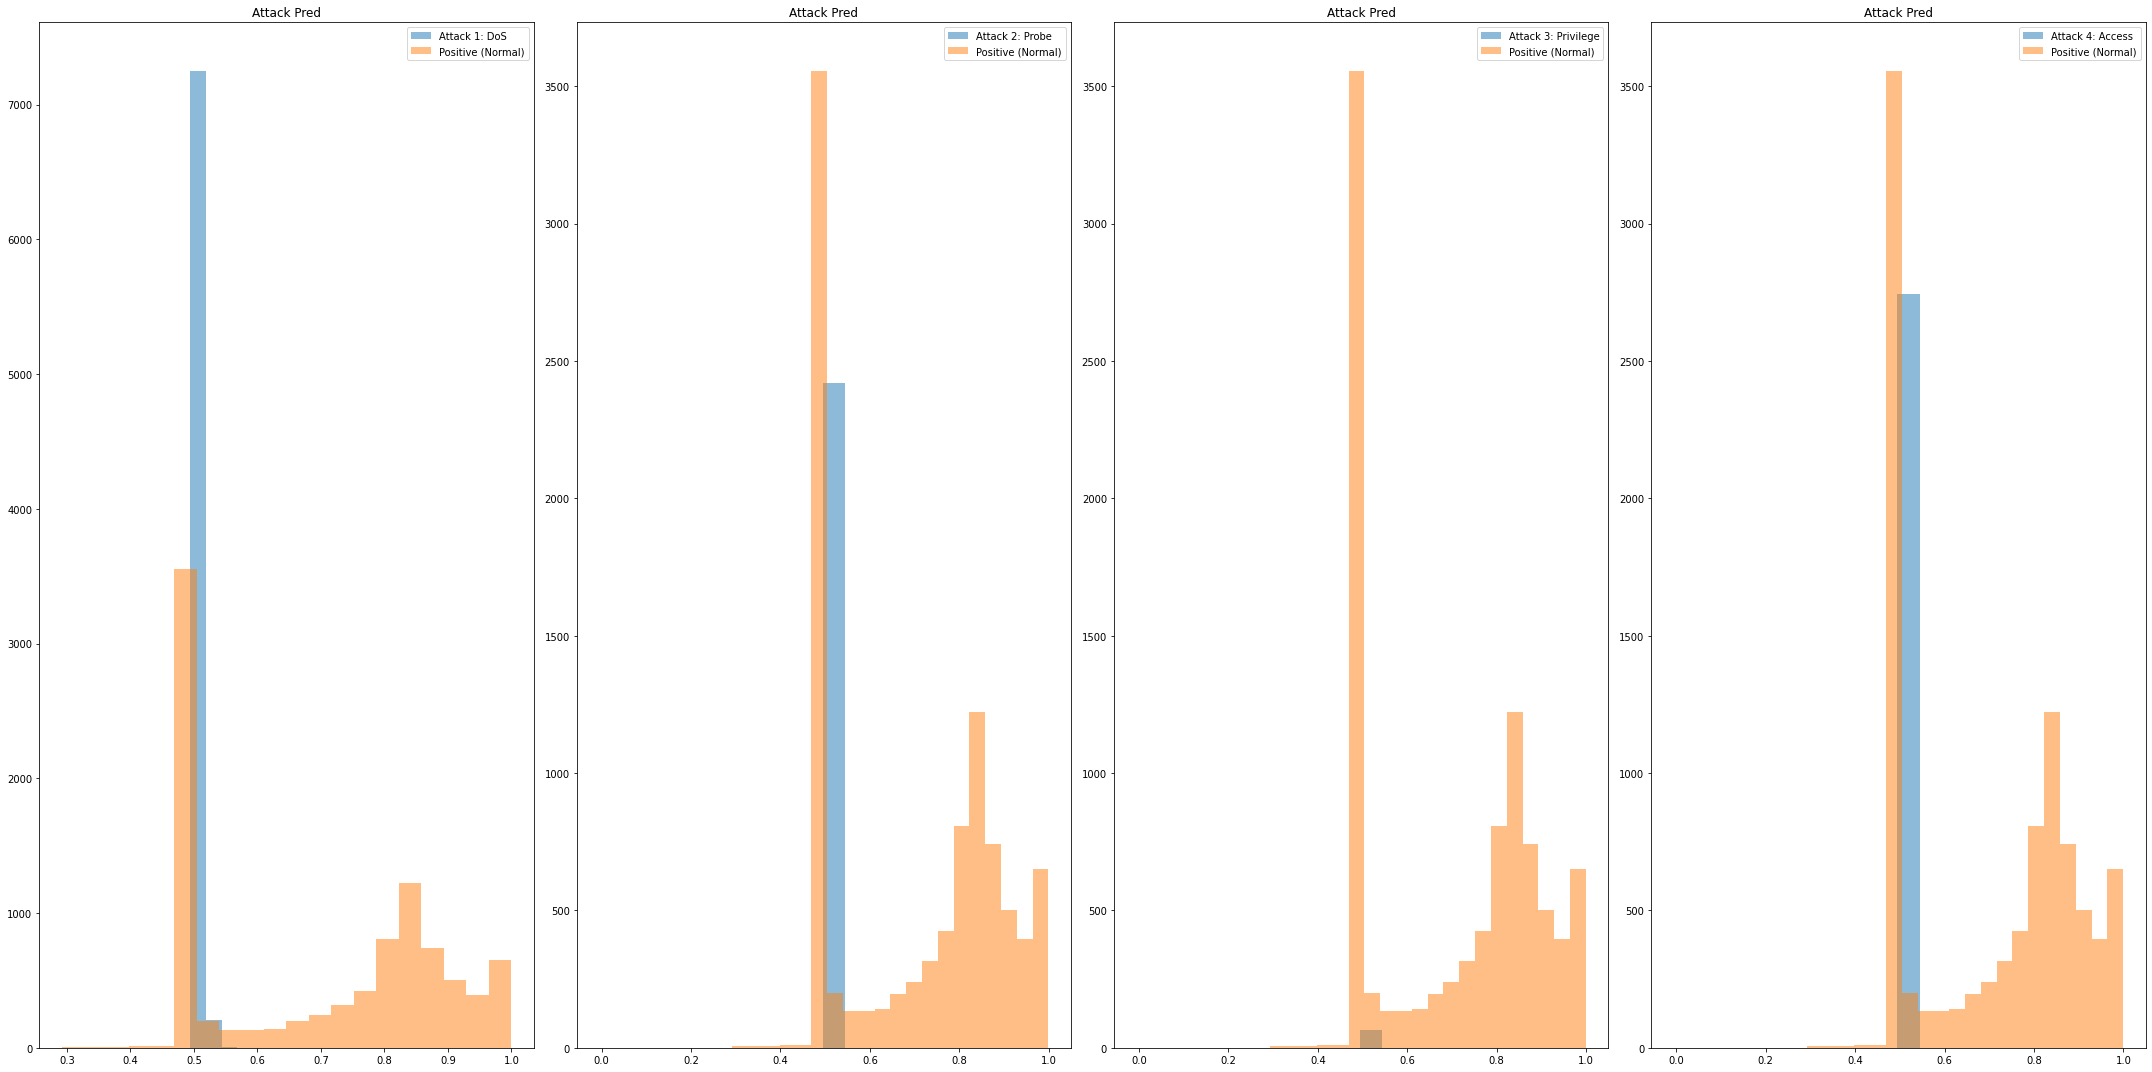

AUPR Train Run 3: 0.29281223307642357
AUPR Test Run 3: 0.40711786669896227
AUPR Indiv Test Run 3: [0.35834621022171015, 0.21523826458036985, 0.009944920440636475, 0.23065926673393877]
Epoch 1/500
3186/3186 [==============================] - 21s 5ms/step - loss: 0.2147 - val_loss: 0.2007
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2029 - val_loss: 0.1989
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2016 - val_loss: 0.1980
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2009 - val_loss: 0.1972
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2002 - val_loss: 0.1965
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1997 - val_loss: 0.1960
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1993 - val_loss: 0.1955
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1989 - v

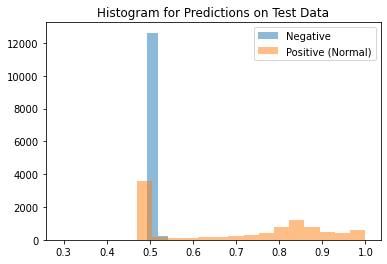

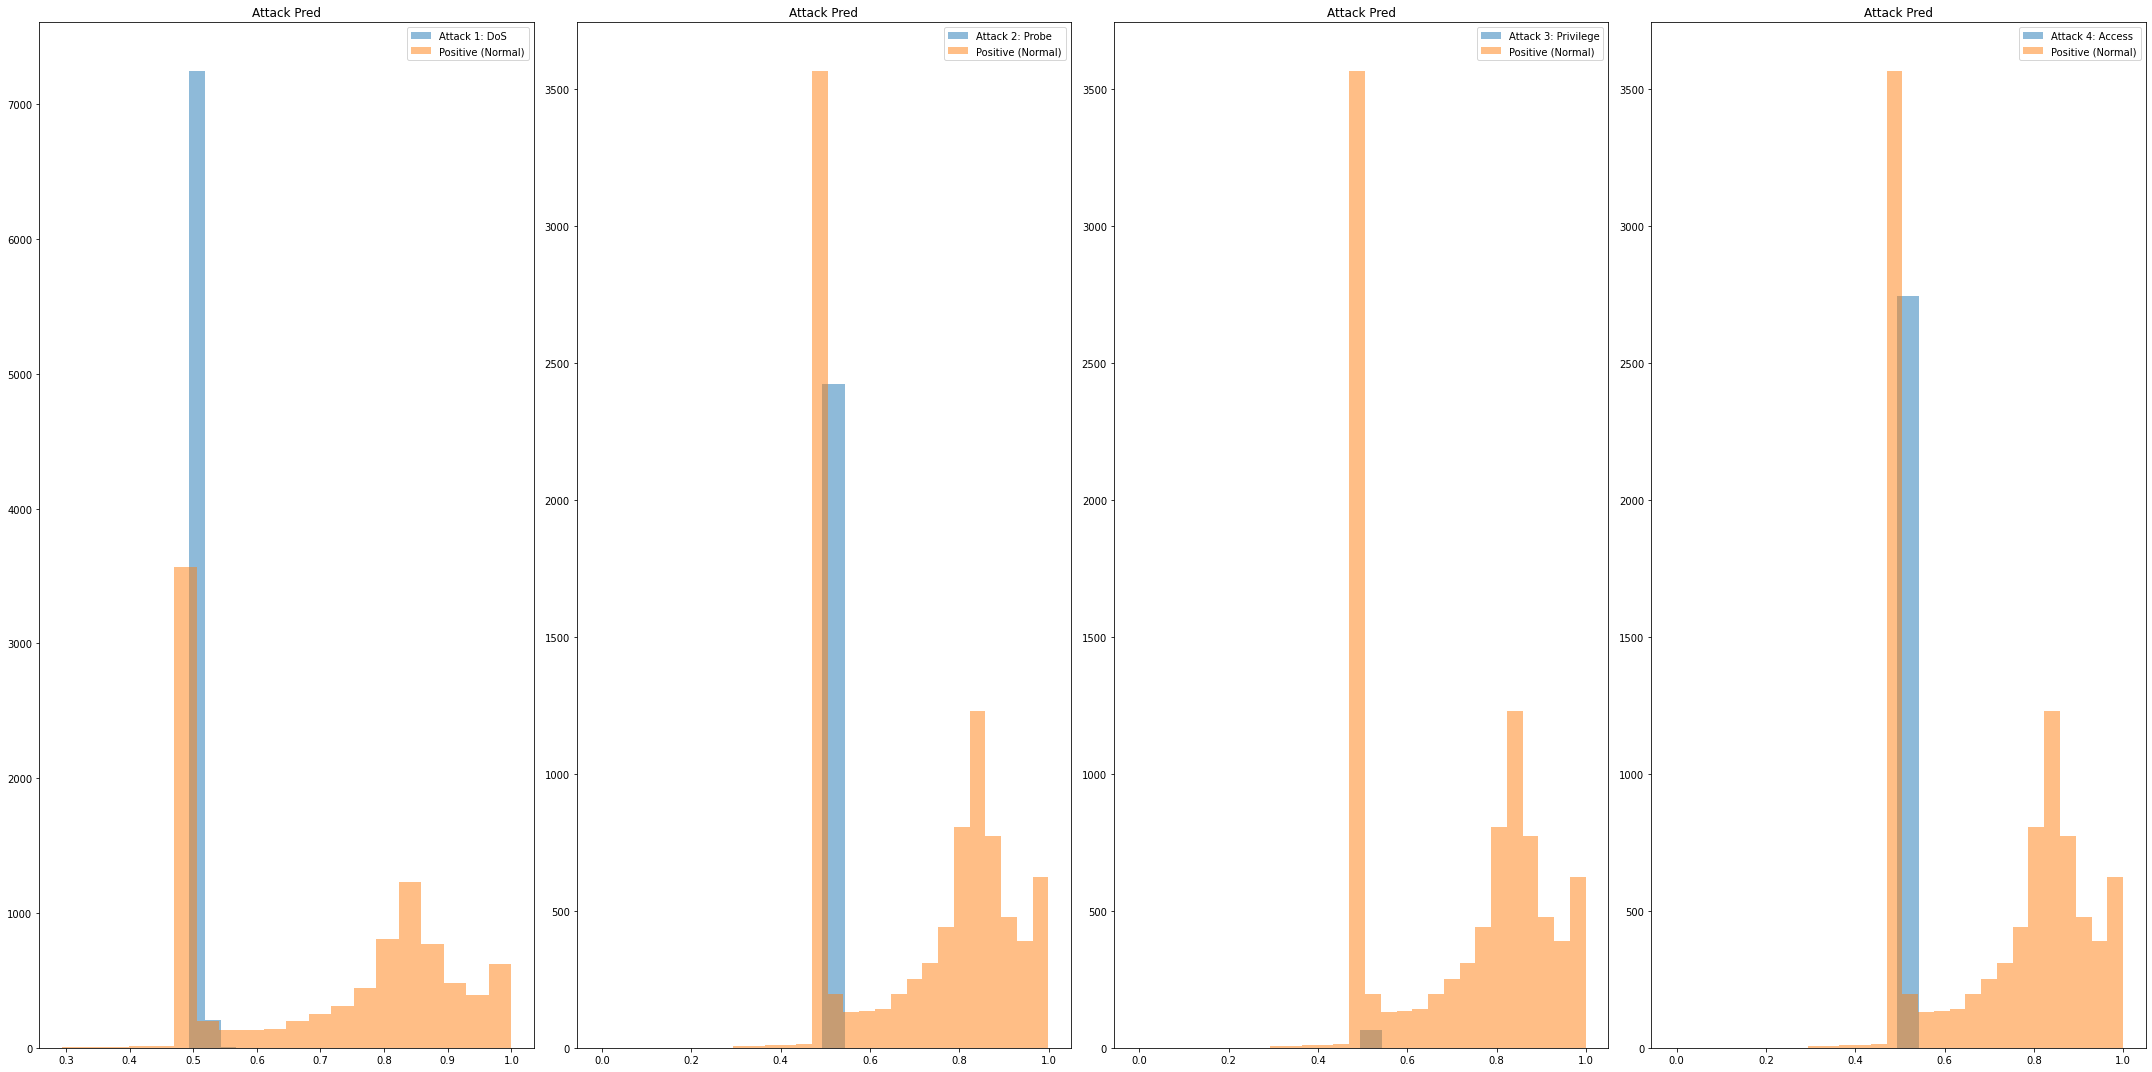

AUPR Train Run 4: 0.29261305915728236
AUPR Test Run 4: 0.40711444877532843
AUPR Indiv Test Run 4: [0.35833851688860213, 0.21523826458036985, 0.009944920440636475, 0.23065926673393877]
Epoch 1/500
3186/3186 [==============================] - 21s 5ms/step - loss: 0.2179 - val_loss: 0.2008
Epoch 2/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2030 - val_loss: 0.1990
Epoch 3/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2017 - val_loss: 0.1980
Epoch 4/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2009 - val_loss: 0.1973
Epoch 5/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.2003 - val_loss: 0.1966
Epoch 6/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1998 - val_loss: 0.1961
Epoch 7/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1994 - val_loss: 0.1956
Epoch 8/500
3186/3186 [==============================] - 16s 5ms/step - loss: 0.1990 - v

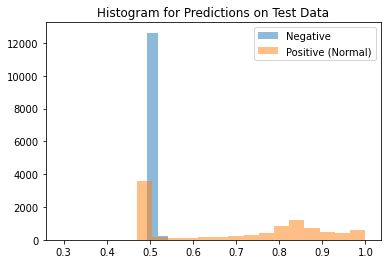

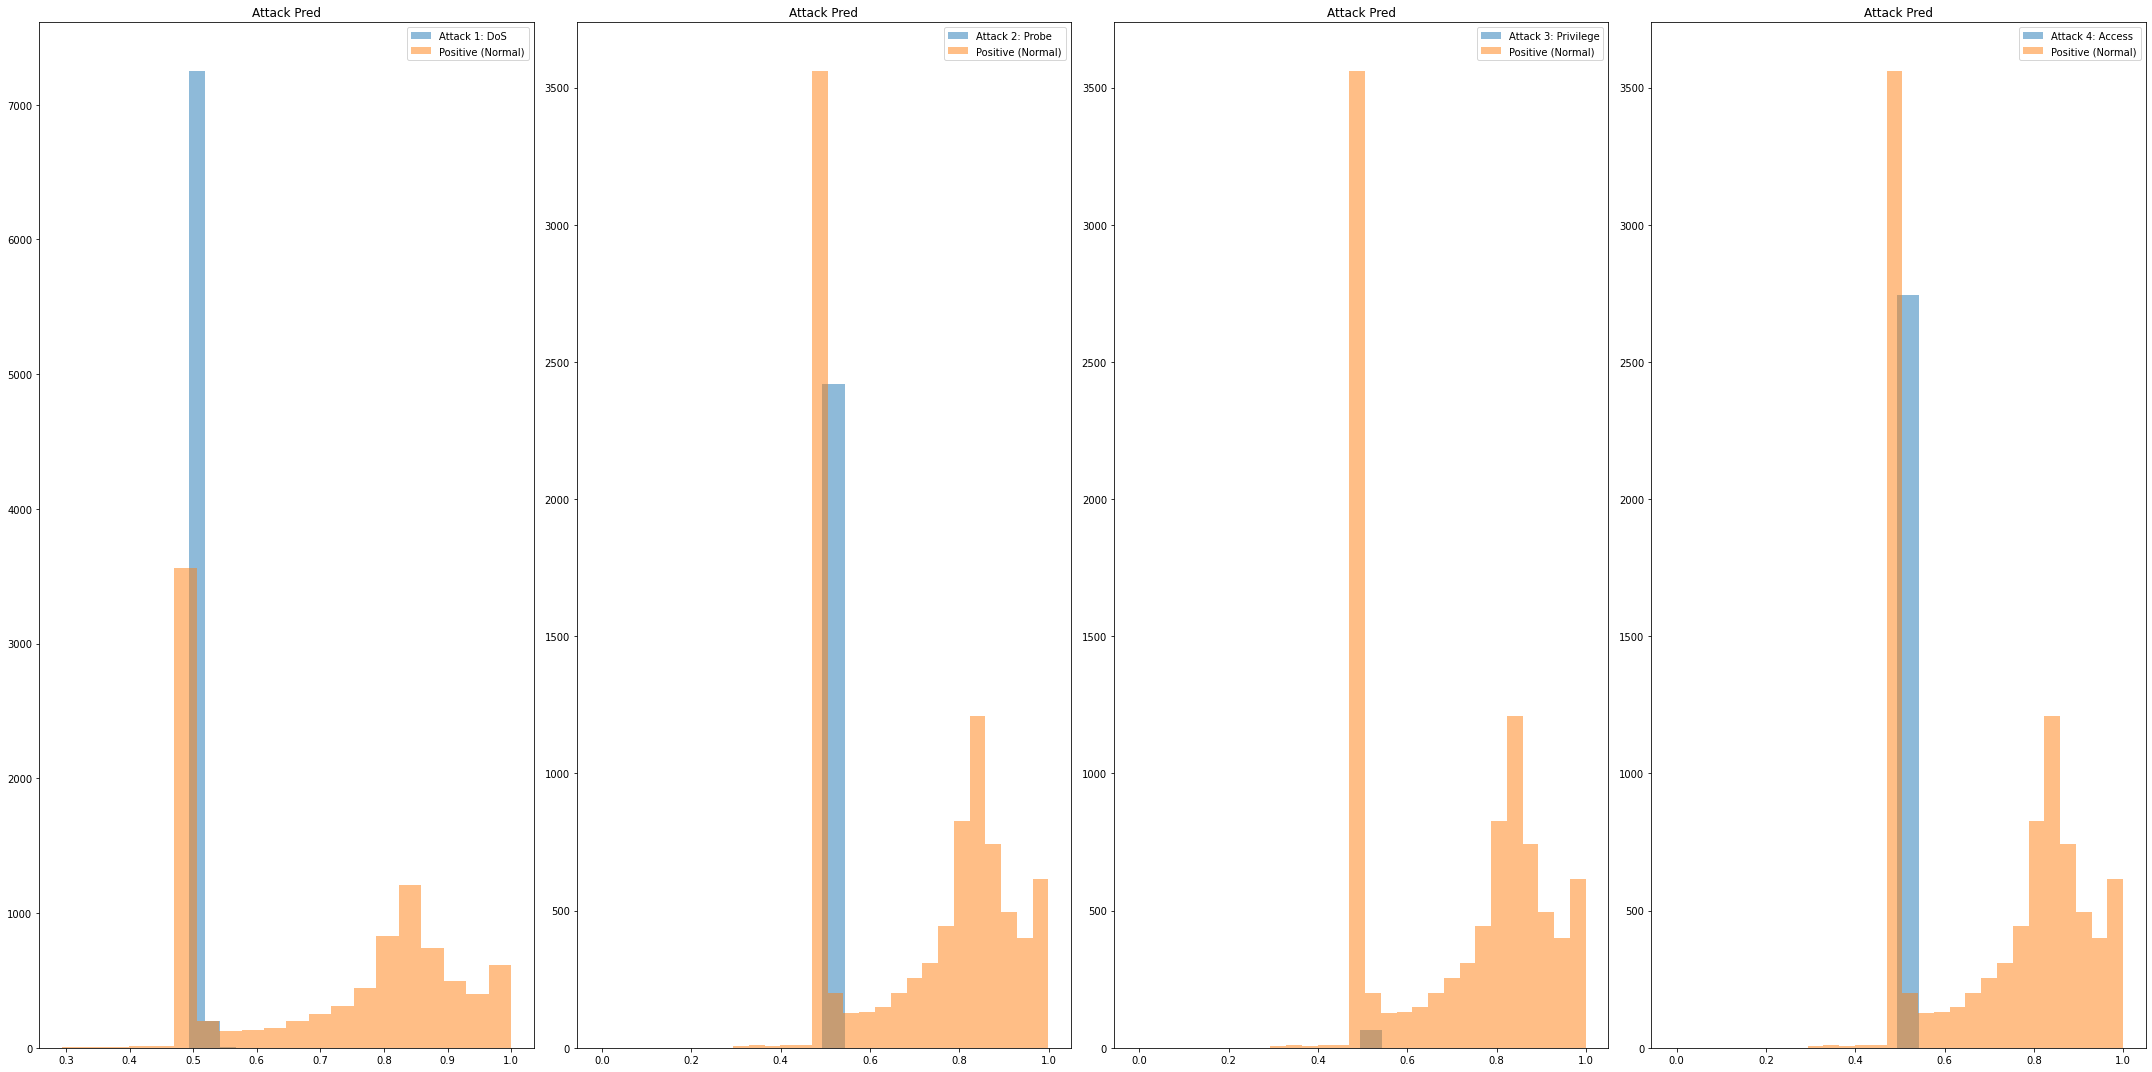

AUPR Train Run 5: 0.29280730457553444
AUPR Test Run 5: 0.40712922738791235
AUPR Indiv Test Run 5: [0.3583709692937367, 0.21523826458036985, 0.009944920440636475, 0.23065926673393877]
AUPR (Train): 0.2928135326987014+-0.0001807385663439558
AUPR (Test): 0.4071488877276936+-6.644089375242489e-05


,0,1,2,3,4,AUPR Mean,AUPR Std
1,0.358334,0.358547,0.358346,0.358339,0.358371,0.358387,0.000091
2,0.215200,0.215162,0.215238,0.215238,0.215238,0.215215,0.000034
3,0.009942,0.009939,0.009945,0.009945,0.009945,0.009943,0.000003
4,0.230620,0.230582,0.230659,0.230659,0.230659,0.230636,0.000035


([0.2926922892969218,
  0.29314277738734484,
  0.29281223307642357,
  0.29261305915728236,
  0.29280730457553444],
 [0.407102244881804,
  0.4072806508944609,
  0.40711786669896227,
  0.40711444877532843,
  0.40712922738791235],
 {0: [0.3583340091362167, 0.2152, 0.009941878250229429, 0.23062048091474693],
  1: [0.35854735706332624,
   0.21516174902239601,
   0.009938837920489297,
   0.23058170813718898],
  2: [0.35834621022171015,
   0.21523826458036985,
   0.009944920440636475,
   0.23065926673393877],
  3: [0.35833851688860213,
   0.21523826458036985,
   0.009944920440636475,
   0.23065926673393877],
  4: [0.3583709692937367,
   0.21523826458036985,
   0.009944920440636475,
   0.23065926673393877]})

In [18]:
# RS1
separation = "RBF"
bumped = "r"
sigma = 0.5
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_rs = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='mse', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    models_rs.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "RBF1r"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_60 (InputLayer)       [(None, 122)]             0         
                                                                 
 rbf_layer_10 (RBFLayer)     (None, 60)                7320      
                                                                 
 batch_normalization_74 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 rbf_layer_11 (RBFLayer)     (None, 1)                 60        
                                                                 
Total params: 7,620
Trainable params: 7,500
Non-trainable params: 120
_________________________________________________________________
Epoch 1/500
3186/3186 [==============================] - 23s 6ms/step - loss: 0.6204 - val_loss: 0.5778
Epoch 2/500
3186/31

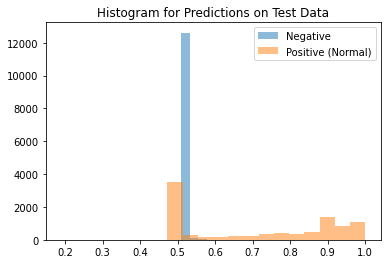

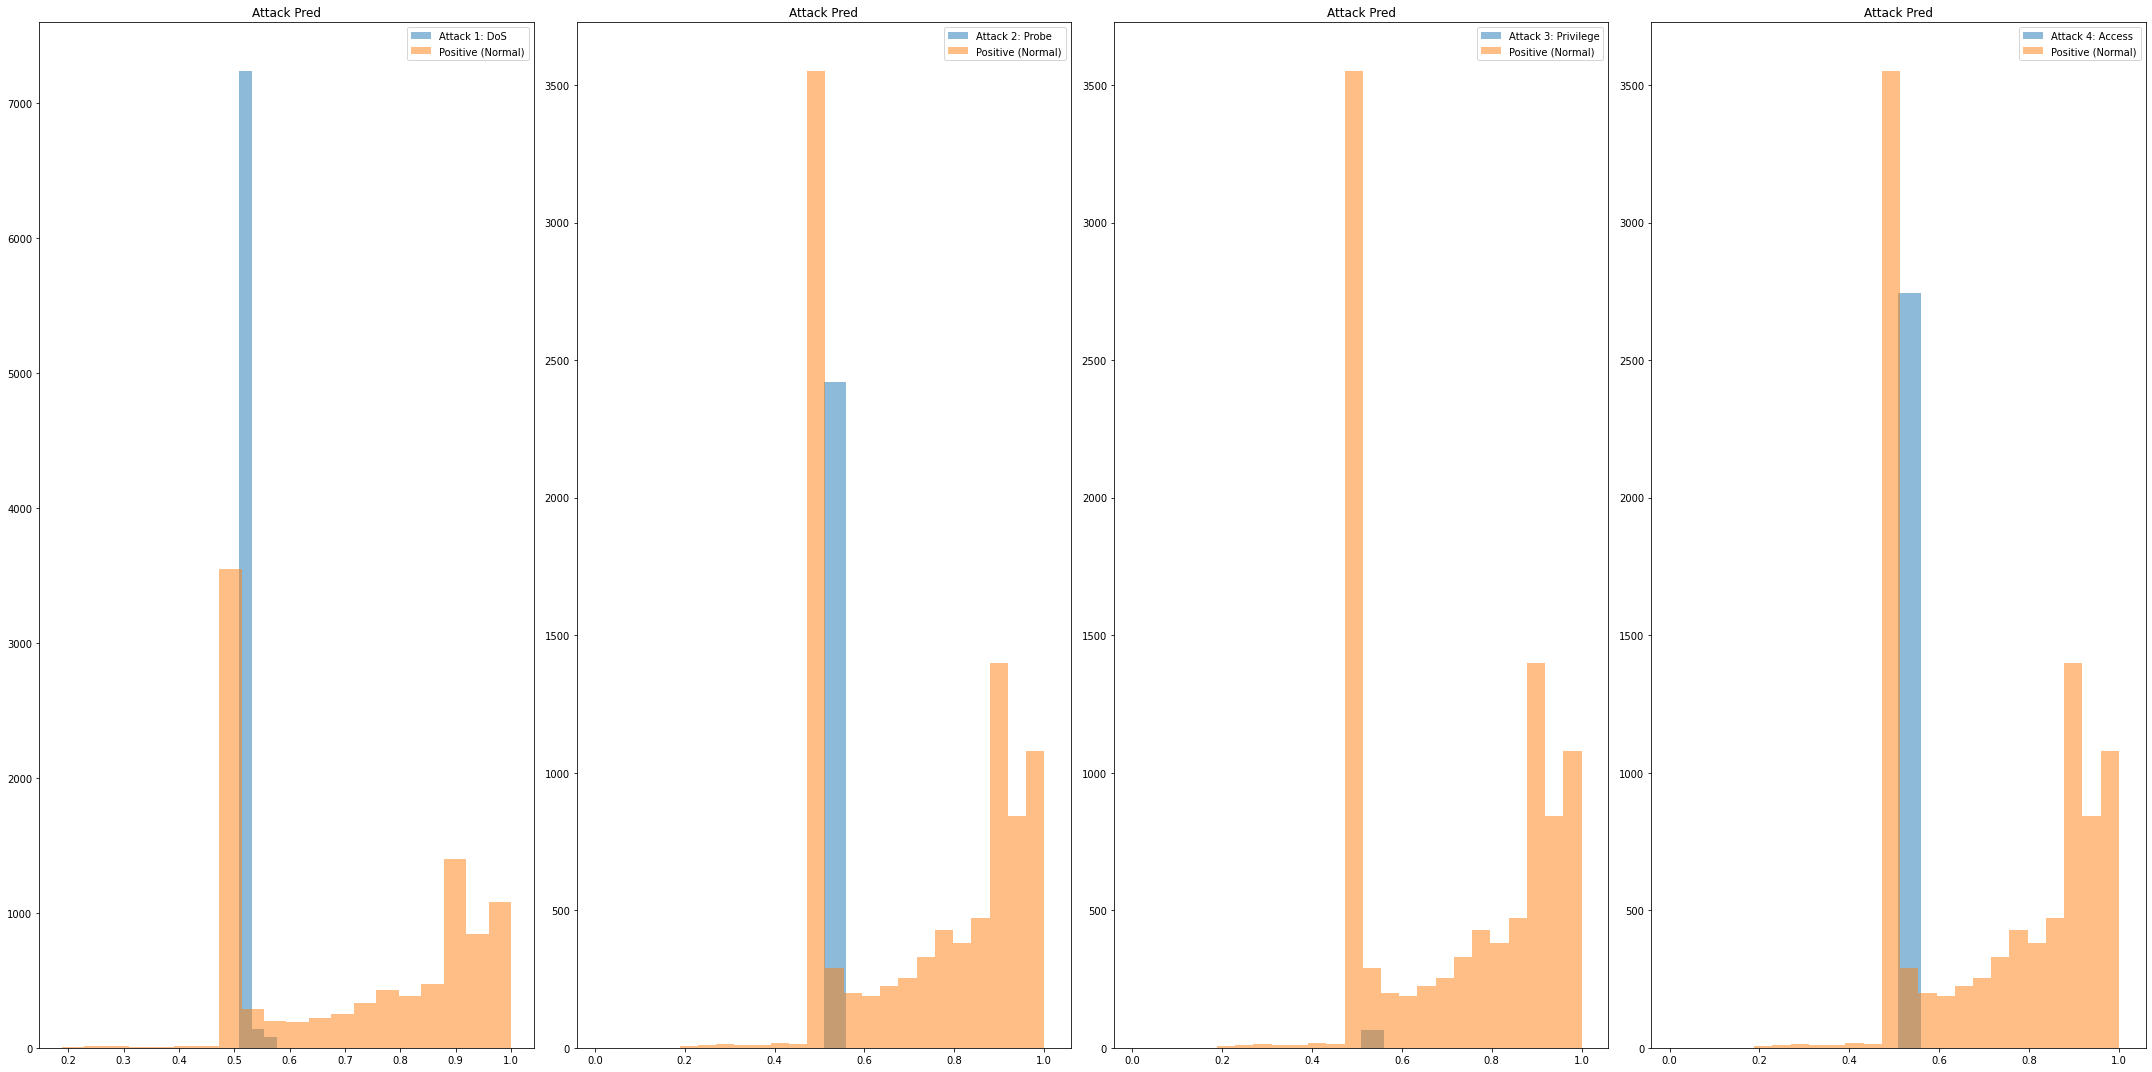

AUPR Train Run 1: 0.29145830614608803
AUPR Test Run 1: 0.40550078852129734
AUPR Indiv Test Run 1: [0.3561335191975725, 0.2129662209711471, 0.009765625, 0.22835497835497837]
Epoch 1/500
3186/3186 [==============================] - 23s 6ms/step - loss: 0.6239 - val_loss: 0.5779
Epoch 2/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5828 - val_loss: 0.5750
Epoch 3/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5807 - val_loss: 0.5733
Epoch 4/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5794 - val_loss: 0.5722
Epoch 5/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5785 - val_loss: 0.5712
Epoch 6/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5776 - val_loss: 0.5704
Epoch 7/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5769 - val_loss: 0.5696
Epoch 8/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5761 - val_loss: 0.

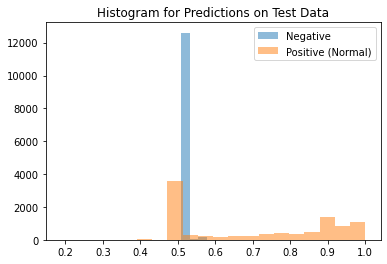

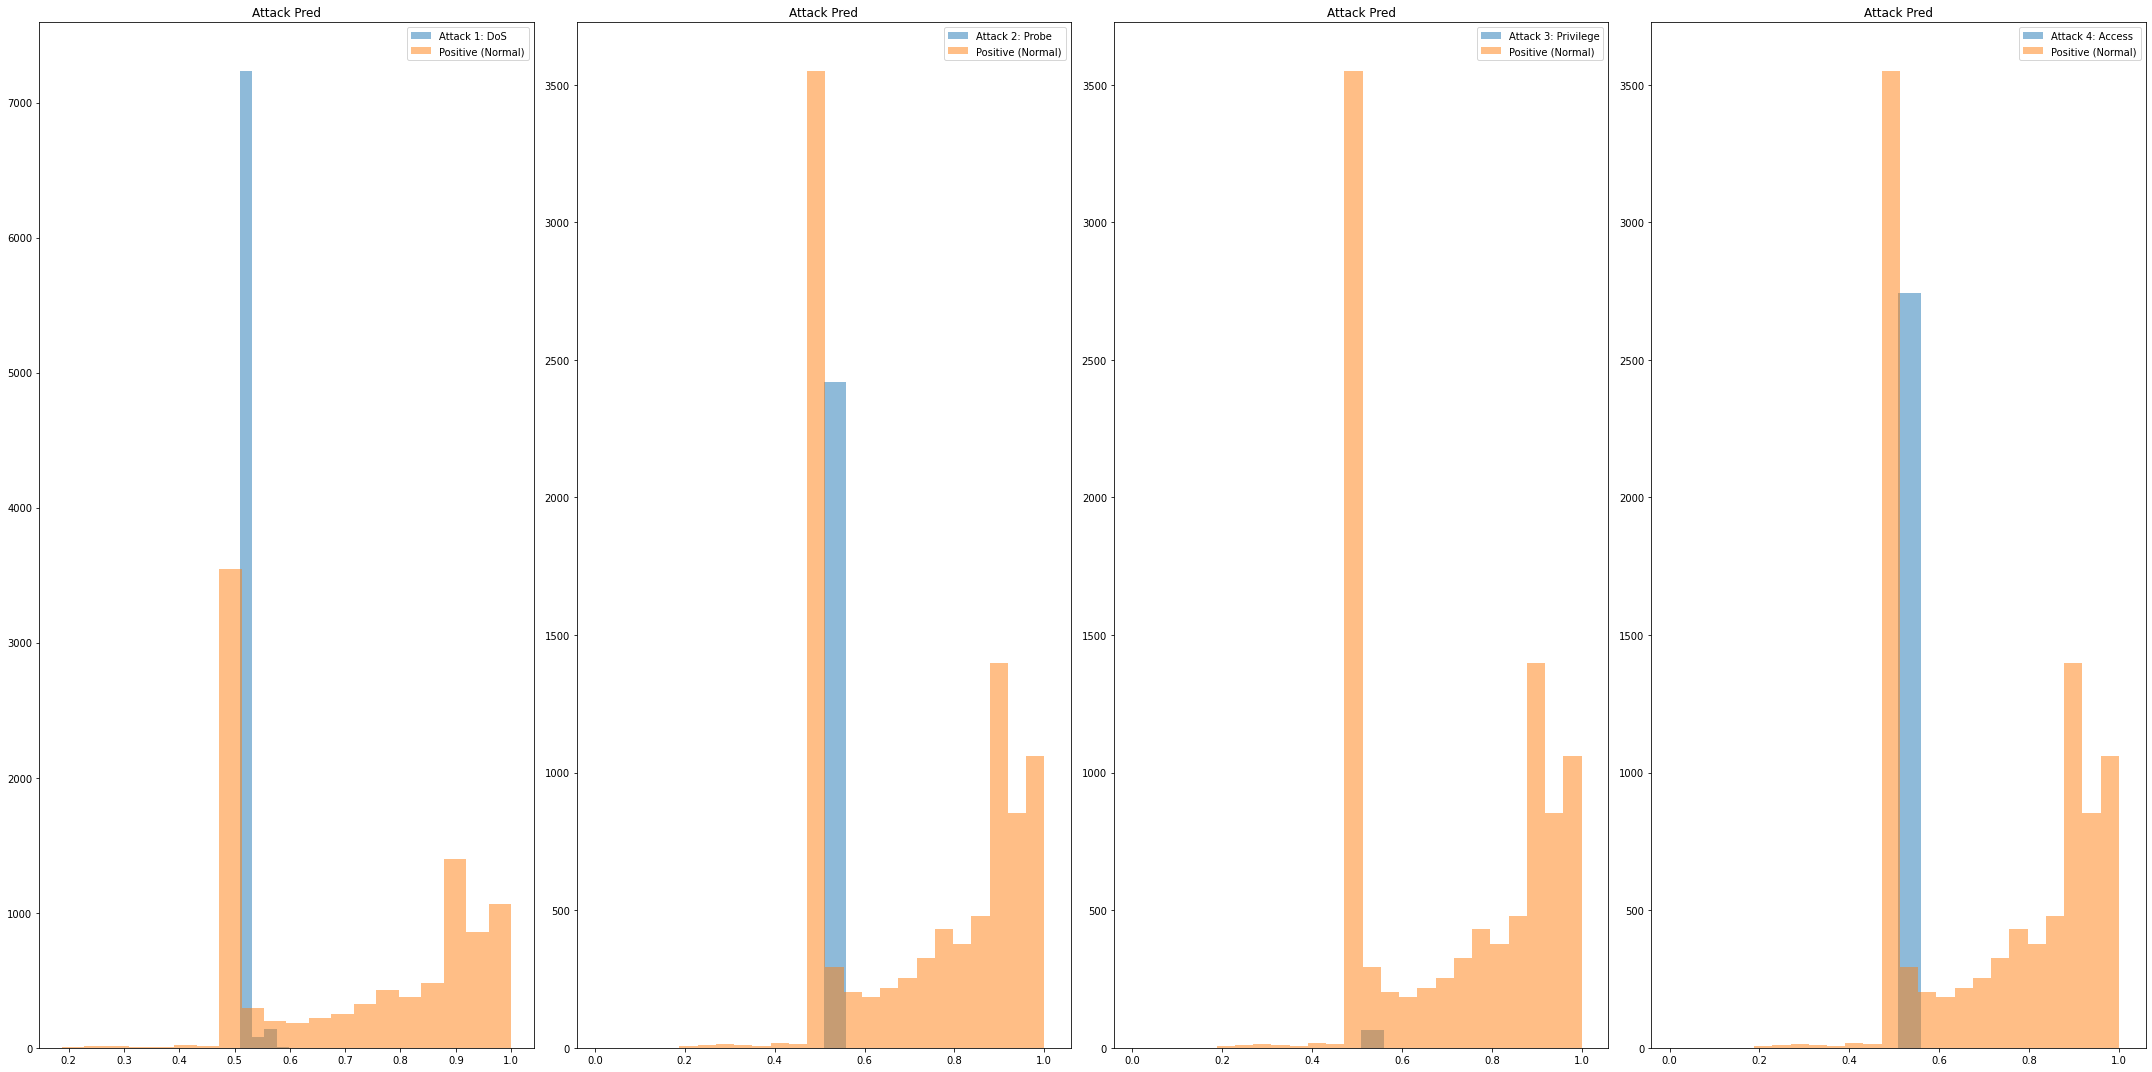

AUPR Train Run 2: 0.29135648409853354
AUPR Test Run 2: 0.4053519477869615
AUPR Indiv Test Run 2: [0.3559184863962375, 0.21277904728423272, 0.00975097509750975, 0.228165030776909]
Epoch 1/500
3186/3186 [==============================] - 23s 6ms/step - loss: 0.6230 - val_loss: 0.5781
Epoch 2/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5830 - val_loss: 0.5752
Epoch 3/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5809 - val_loss: 0.5735
Epoch 4/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5796 - val_loss: 0.5724
Epoch 5/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5787 - val_loss: 0.5715
Epoch 6/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5778 - val_loss: 0.5707
Epoch 7/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5771 - val_loss: 0.5699
Epoch 8/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5764 - val_lo

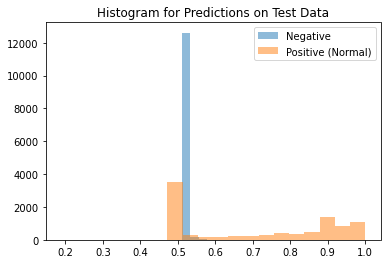

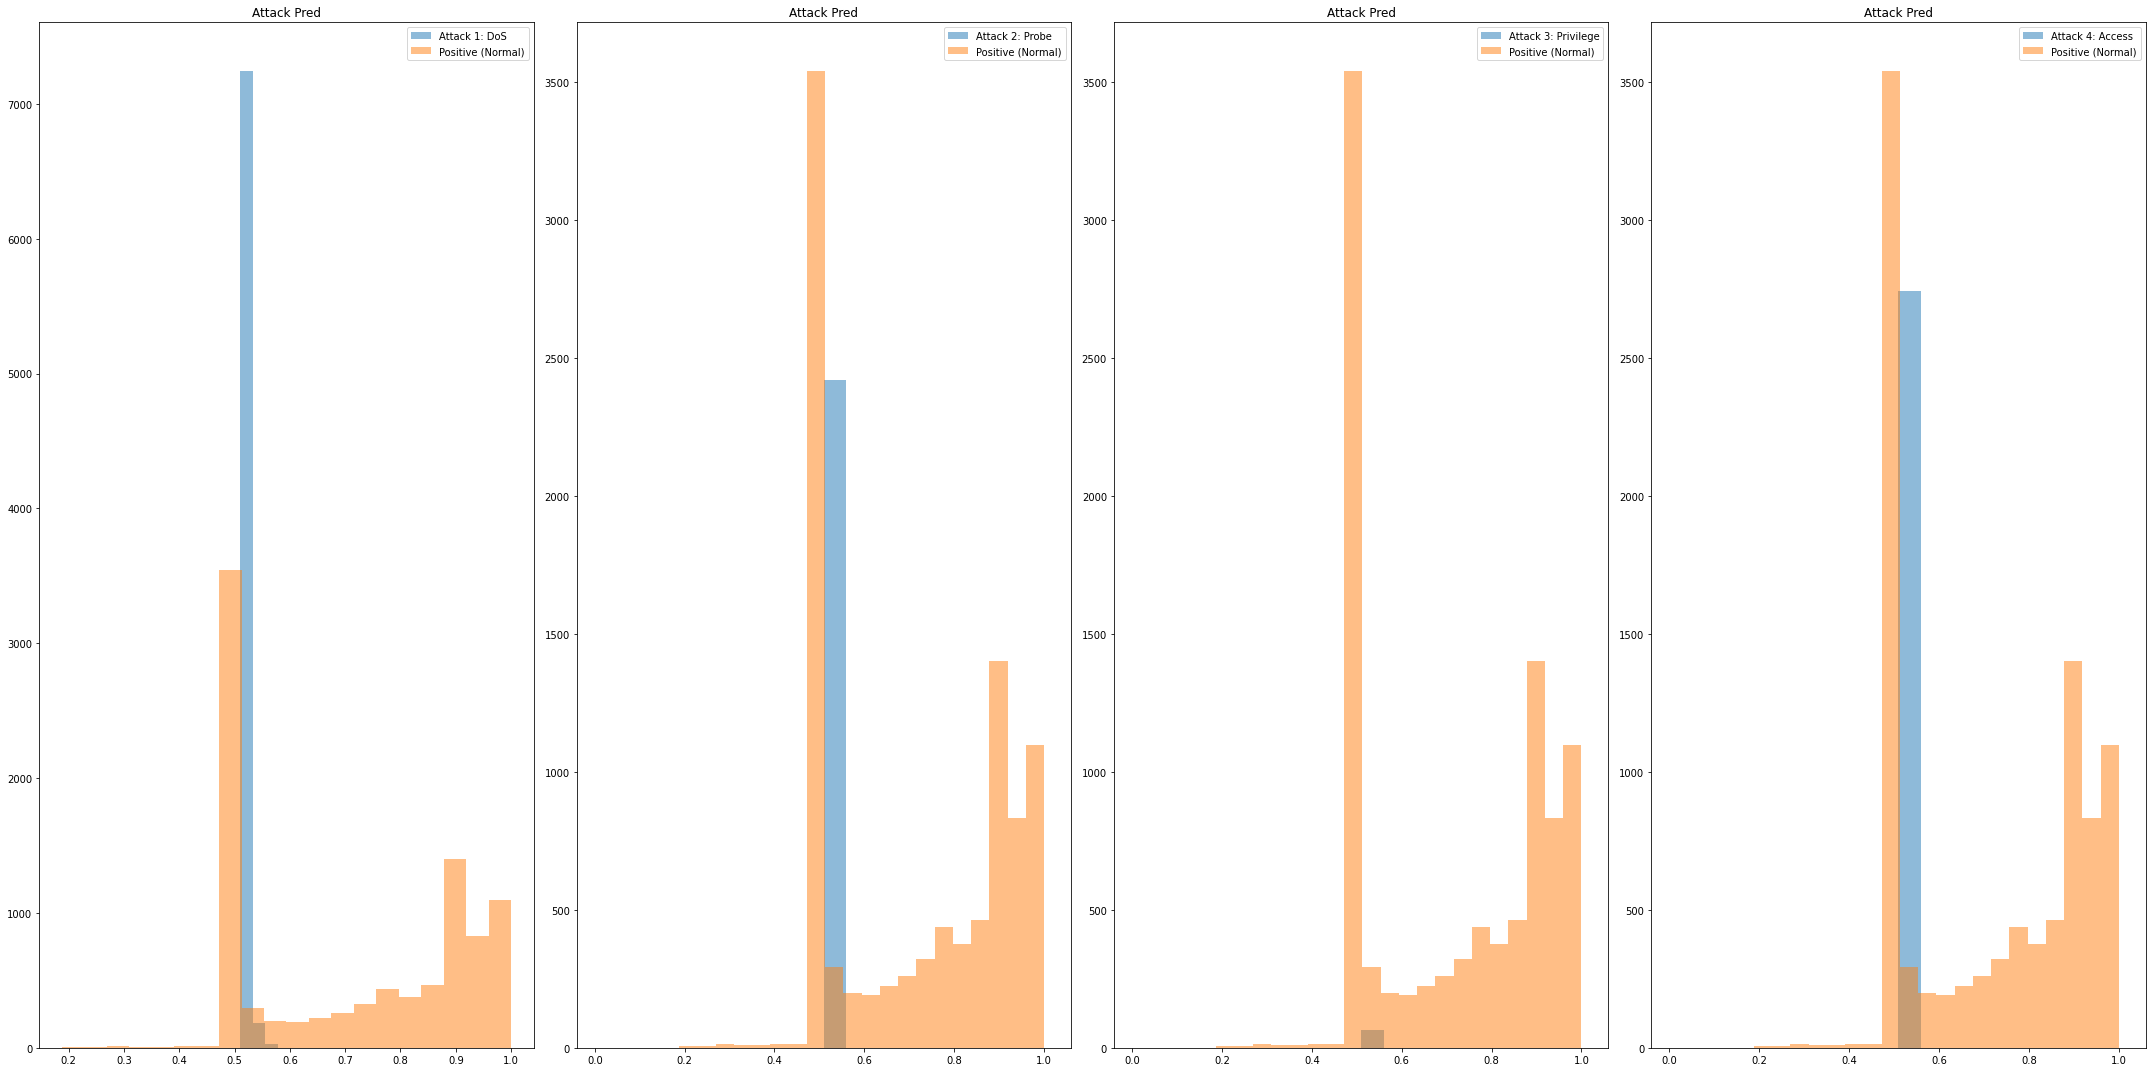

AUPR Train Run 3: 0.2913885113723156
AUPR Test Run 3: 0.4055421429316635
AUPR Indiv Test Run 3: [0.35620185518152614, 0.21300369523139187, 0.009768560264502554, 0.22839300582847627]
Epoch 1/500
3186/3186 [==============================] - 23s 6ms/step - loss: 0.6083 - val_loss: 0.5782
Epoch 2/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5830 - val_loss: 0.5751
Epoch 3/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5808 - val_loss: 0.5734
Epoch 4/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5795 - val_loss: 0.5722
Epoch 5/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5786 - val_loss: 0.5713
Epoch 6/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5778 - val_loss: 0.5705
Epoch 7/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5770 - val_loss: 0.5697
Epoch 8/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5763 - val

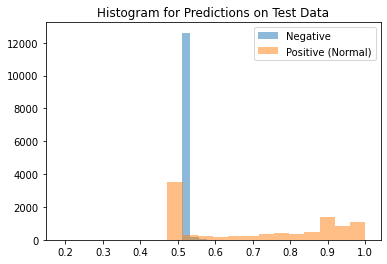

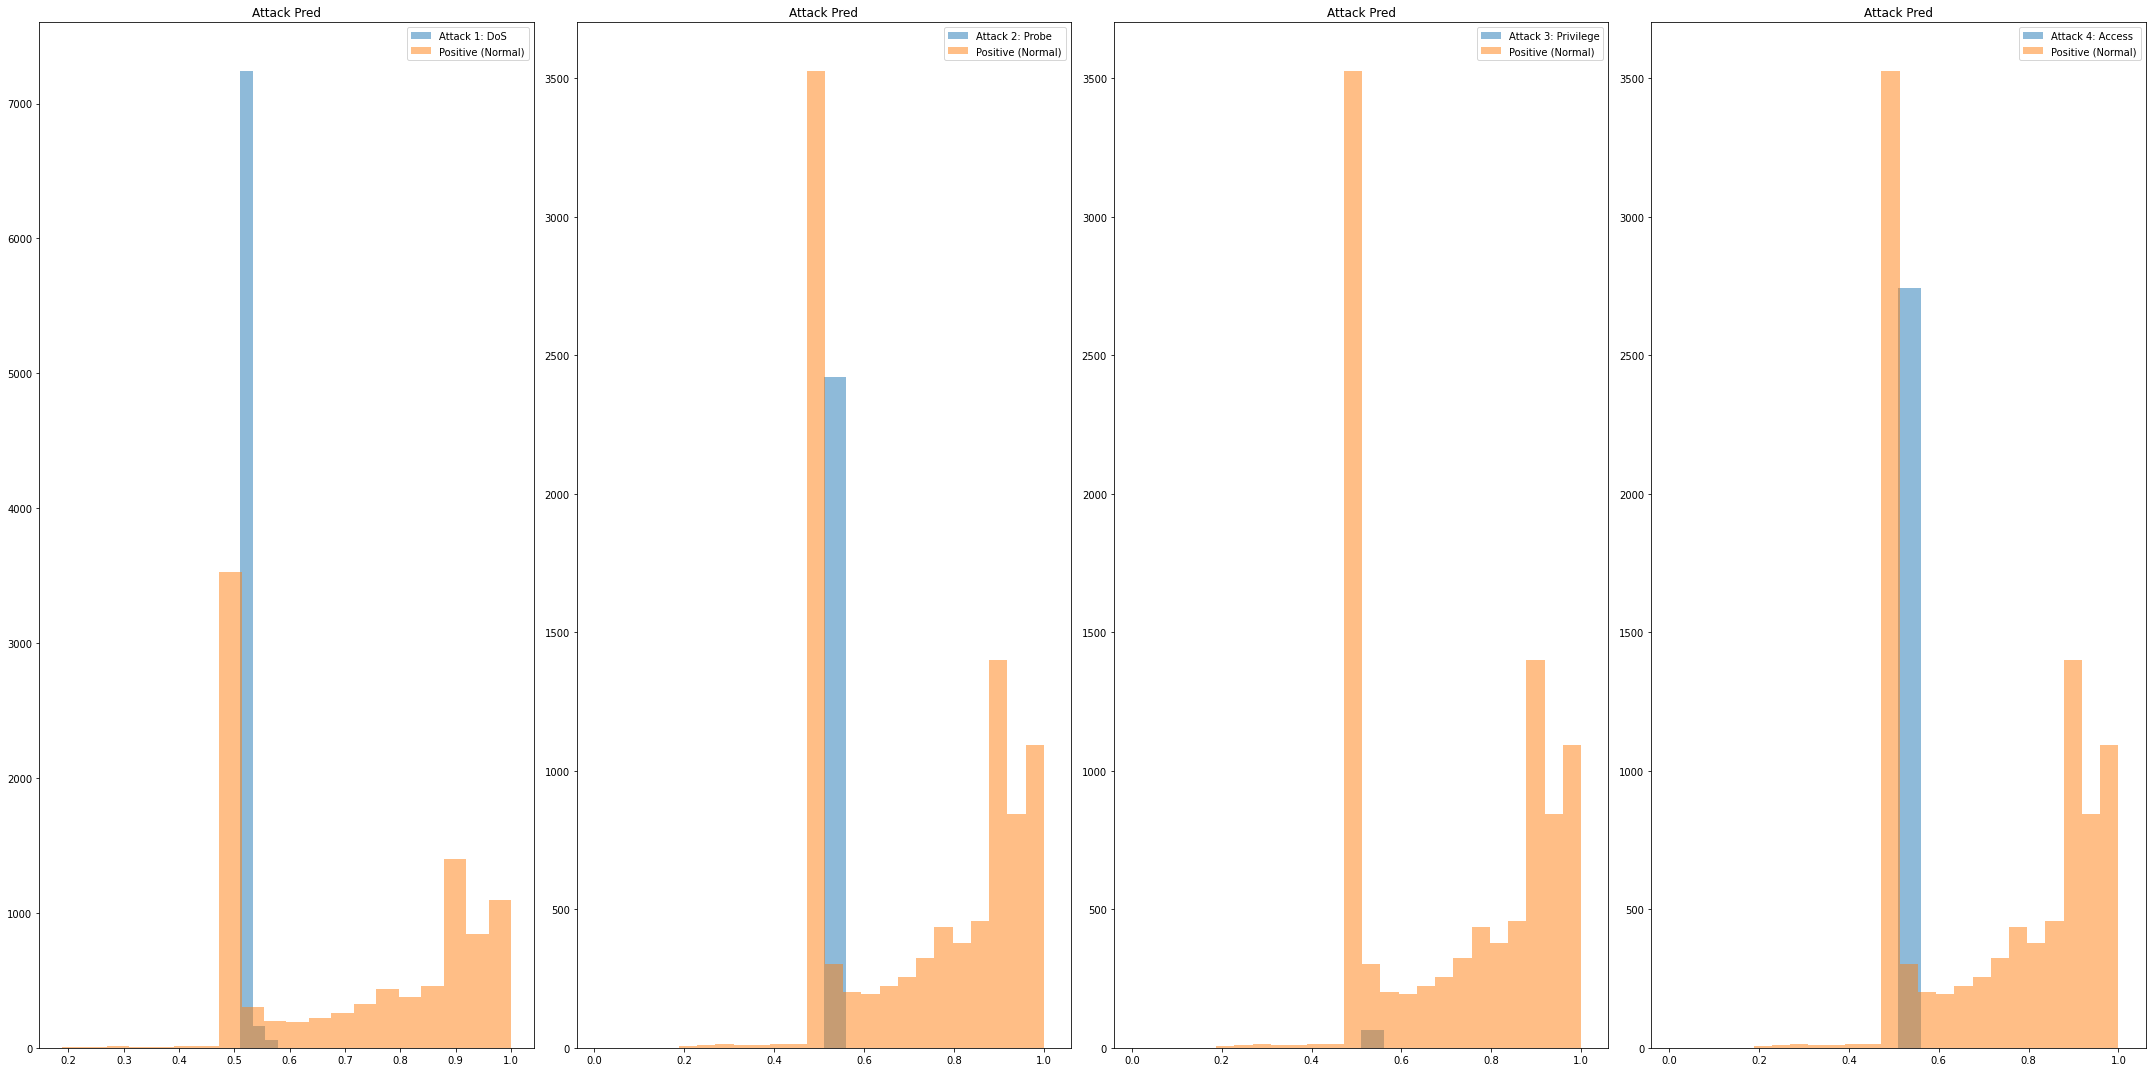

AUPR Train Run 4: 0.29026577196115233
AUPR Test Run 4: 0.4036054692507384
AUPR Indiv Test Run 4: [0.3537038041114438, 0.2100833044081916, 0.009541984732824428, 0.22542735042735043]
Epoch 1/500
3186/3186 [==============================] - 22s 6ms/step - loss: 0.6183 - val_loss: 0.5780
Epoch 2/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5828 - val_loss: 0.5749
Epoch 3/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5807 - val_loss: 0.5733
Epoch 4/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5794 - val_loss: 0.5721
Epoch 5/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5785 - val_loss: 0.5712
Epoch 6/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5777 - val_loss: 0.5704
Epoch 7/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5769 - val_loss: 0.5696
Epoch 8/500
3186/3186 [==============================] - 17s 5ms/step - loss: 0.5761 - val_

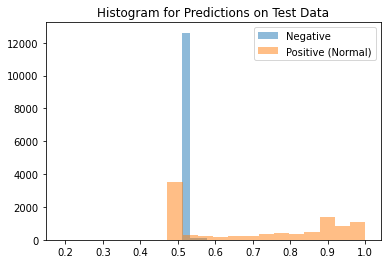

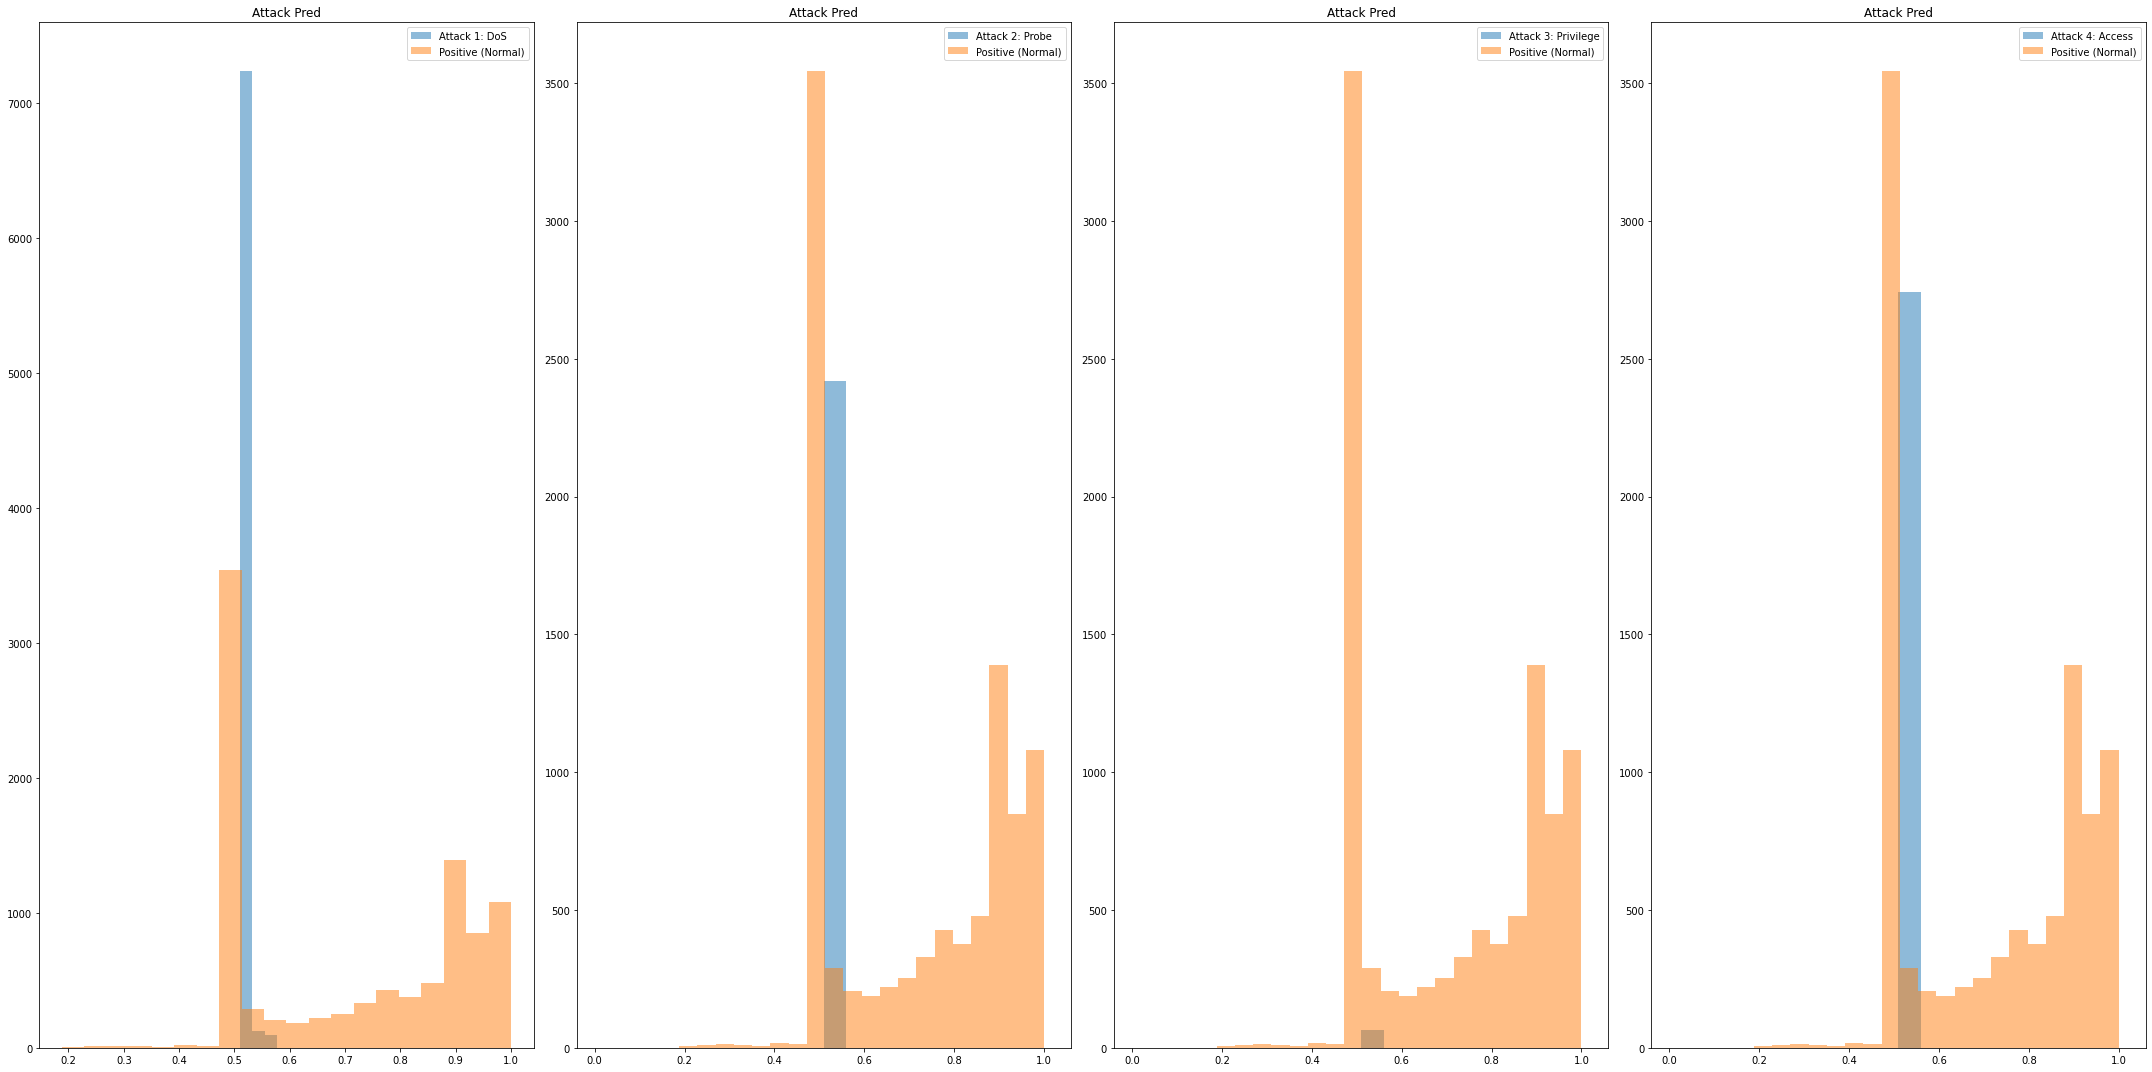

AUPR Train Run 5: 0.2943414230381561
AUPR Test Run 5: 0.407562550404036
AUPR Indiv Test Run 5: [0.3587904241616266, 0.21612212104981254, 0.010015408320493066, 0.2315549552591592]
AUPR (Train): 0.2917620993232491+-0.0013629591602784287
AUPR (Test): 0.4055125797789394+-0.001254293887502964


,0,1,2,3,4,AUPR Mean,AUPR Std
1,0.356134,0.355918,0.356202,0.353704,0.358790,0.356150,0.001804
2,0.212966,0.212779,0.213004,0.210083,0.216122,0.212991,0.002139
3,0.009766,0.009751,0.009769,0.009542,0.010015,0.009769,0.000168
4,0.228355,0.228165,0.228393,0.225427,0.231555,0.228379,0.002171


([0.29145830614608803,
  0.29135648409853354,
  0.2913885113723156,
  0.29026577196115233,
  0.2943414230381561],
 [0.40550078852129734,
  0.4053519477869615,
  0.4055421429316635,
  0.4036054692507384,
  0.407562550404036],
 {0: [0.3561335191975725,
   0.2129662209711471,
   0.009765625,
   0.22835497835497837],
  1: [0.3559184863962375,
   0.21277904728423272,
   0.00975097509750975,
   0.228165030776909],
  2: [0.35620185518152614,
   0.21300369523139187,
   0.009768560264502554,
   0.22839300582847627],
  3: [0.3537038041114438,
   0.2100833044081916,
   0.009541984732824428,
   0.22542735042735043],
  4: [0.3587904241616266,
   0.21612212104981254,
   0.010015408320493066,
   0.2315549552591592]})

In [19]:
# RS1
separation = "RBF"
bumped = "r"
sigma = 0.5
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_rs = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='binary_crossentropy', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    models_rs.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks